In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None) # Used to display the all features

In [2]:
current_data=pd.read_csv('EDA_current_application.csv',index_col=0)
previous_data=pd.read_csv('EDA_previous_application.csv',index_col=0)
columns_data = pd.read_csv('columns_description.csv', index_col=0,  encoding='cp1252')

In [3]:
current_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special               Married   
4          Working  Secondary / secondary special  Single / not married   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       25.92           1.75               9.99   
1                    0.003541       45.93           3.25               3.25   
2                    0.010032       52.18           0.62              11.67   
3                    0.008019       52.07           8.33              26.94   
4                    0.028663       54.61           8.32              11.81   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             5.81           1               1                0   
1             0.80           1               1                0   
2             6.93           1               1                1   
3             6.68           1               1                0   
4             9.47           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0

In [4]:
current_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250598 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   250598 non-null  int64  
 1   TARGET                       250598 non-null  int64  
 2   NAME_CONTRACT_TYPE           250598 non-null  object 
 3   CODE_GENDER                  250598 non-null  object 
 4   FLAG_OWN_CAR                 250598 non-null  object 
 5   FLAG_OWN_REALTY              250598 non-null  object 
 6   CNT_CHILDREN                 250598 non-null  int64  
 7   AMT_INCOME_TOTAL             250598 non-null  float64
 8   AMT_CREDIT                   250598 non-null  float64
 9   AMT_ANNUITY                  250598 non-null  float64
 10  NAME_INCOME_TYPE             250598 non-null  object 
 11  NAME_EDUCATION_TYPE          250598 non-null  object 
 12  NAME_FAMILY_STATUS           250598 non-null  object 
 13 

In [5]:
previous_data.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans            17.14       17.14   
1     2802425      108129         Cash loans           607.50      679.67   
2     2523466      122040         Cash loans           112.50      136.44   
3     2819243      176158         Cash loans           450.00      470.79   
4     1784265      202054         Cash loans           337.50      404.06   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
0                   SATURDAY                       15                       1   
1                   THURSDAY                       11                       1   
2                    TUESDAY                       11                       1   
3                     MONDAY                        7                       1   
4                   THURSDAY                        9                       1   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE  \
0             Approved             73  Cash through the bank         Repeater   
1             Approved            164                    XNA         Repeater   
2             Approved            301  Cash through the bank         Repeater   
3             Approved            512  Cash through the bank         Repeater   
4              Refused            781  Cash through the bank         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO             CHANNEL_TYPE  \
0              Mobile            POS             Country-wide   
1                 XNA           Cash           Contact center   
2                 XNA           Cash  Credit and cash offices   
3                 XNA           Cash  Credit and cash offices   
4                 XNA           Cash  Credit and cash offices   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  
0         Connectivity           middle  
1                  XNA              low  
2                  XNA             high  
3                  XNA           middle  
4                  XNA             high

In [6]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621741 entries, 0 to 1670213
Data columns (total 17 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  1621741 non-null  int64  
 1   SK_ID_CURR                  1621741 non-null  int64  
 2   NAME_CONTRACT_TYPE          1621741 non-null  object 
 3   AMT_APPLICATION             1621741 non-null  float64
 4   AMT_CREDIT                  1621741 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START  1621741 non-null  object 
 6   HOUR_APPR_PROCESS_START     1621741 non-null  int64  
 7   NFLAG_LAST_APPL_IN_DAY      1621741 non-null  int64  
 8   NAME_CONTRACT_STATUS        1621741 non-null  object 
 9   DAYS_DECISION               1621741 non-null  int64  
 10  NAME_PAYMENT_TYPE           1621741 non-null  object 
 11  NAME_CLIENT_TYPE            1621741 non-null  object 
 12  NAME_GOODS_CATEGORY         1621741 non-null  object 
 1

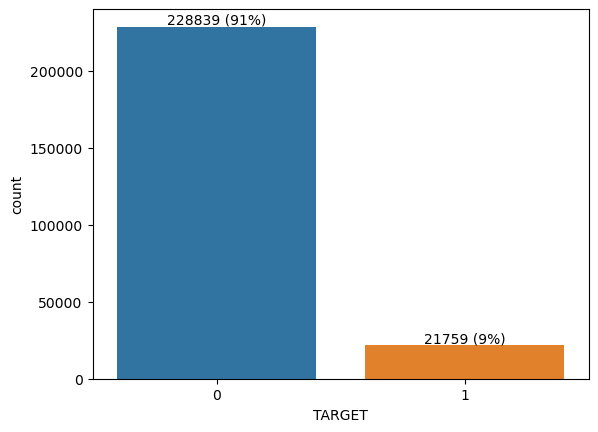

In [7]:
ax = sns.countplot(x=current_data['TARGET'],
                   order=current_data['TARGET'].value_counts(ascending=False).index);
        
abs_values = current_data['TARGET'].value_counts(ascending=False)
rel_values = current_data['TARGET'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

[Text(0, 0, '84181'), Text(0, 0, '144658')]

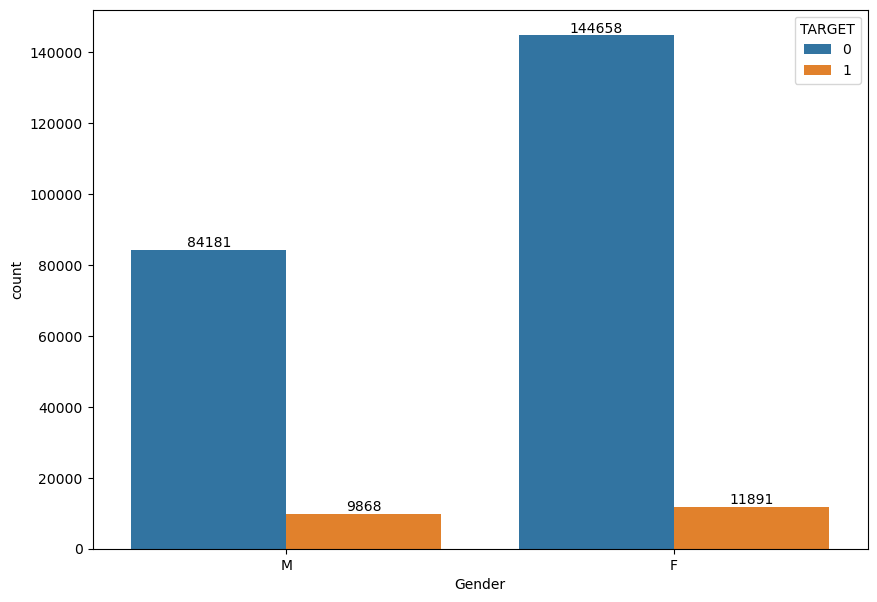

In [8]:
plt.figure(figsize=(10,7))
ax =sns.countplot(x='CODE_GENDER',data=current_data, hue = 'TARGET')
plt.xlabel('Gender',fontsize=10)
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])

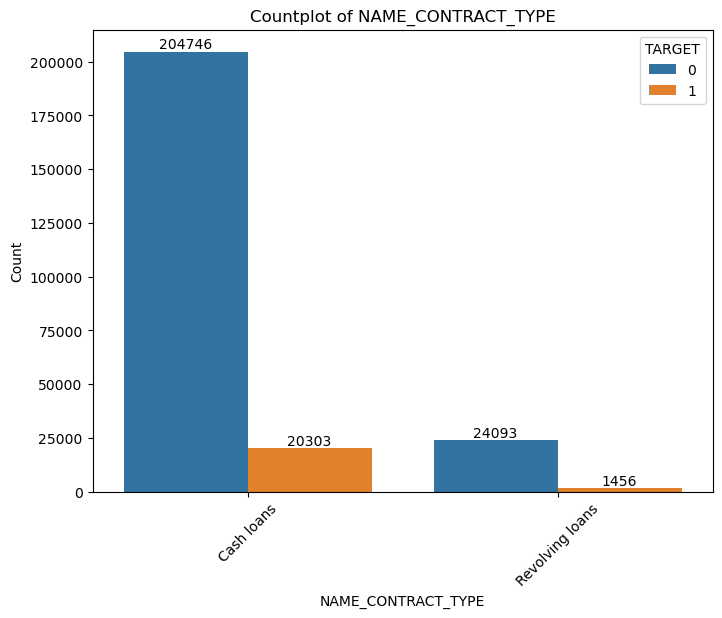

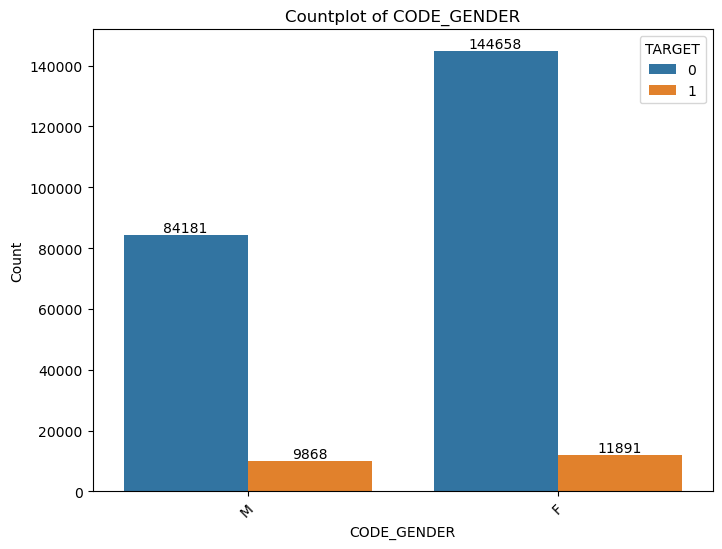

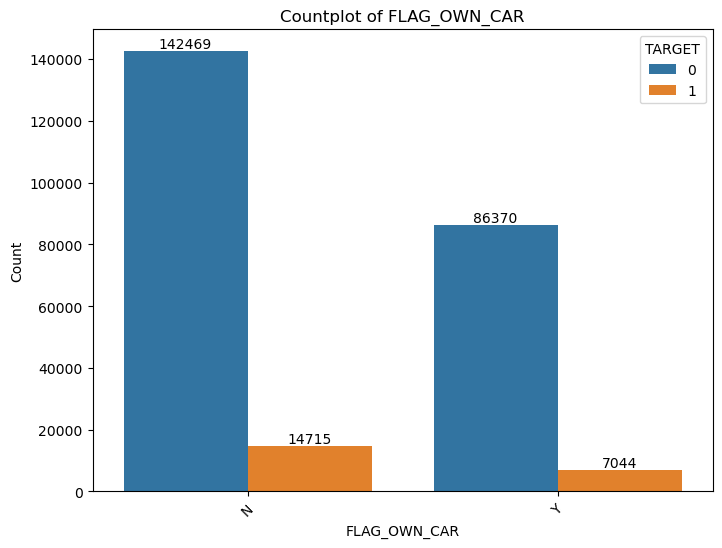

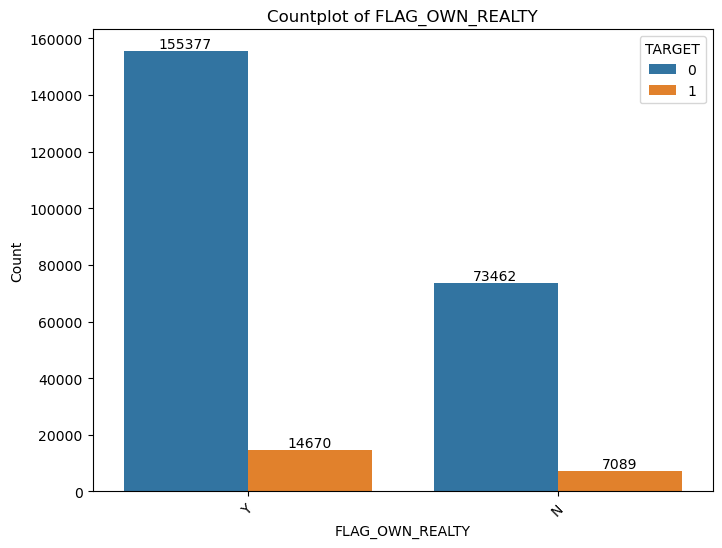

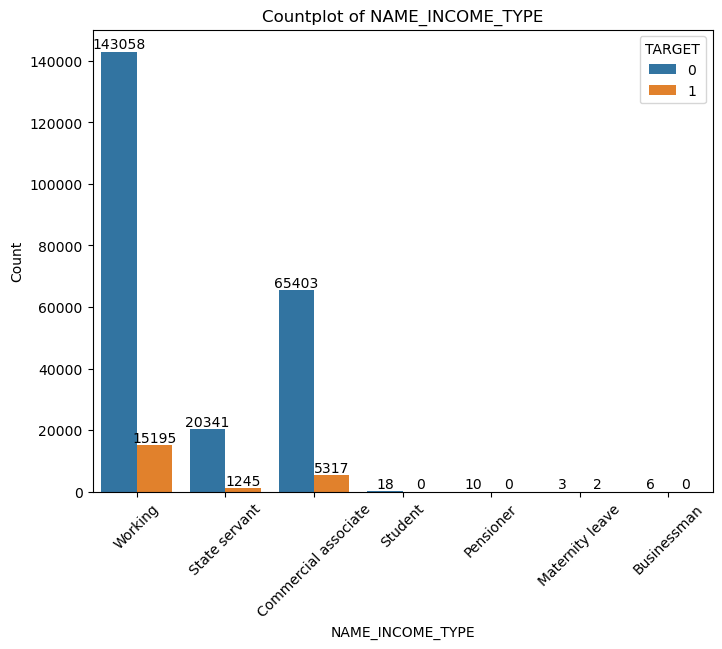

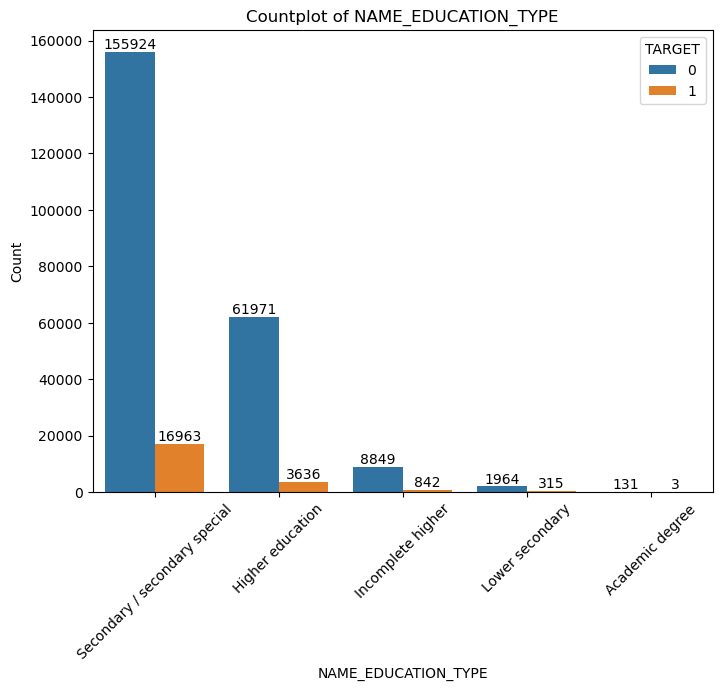

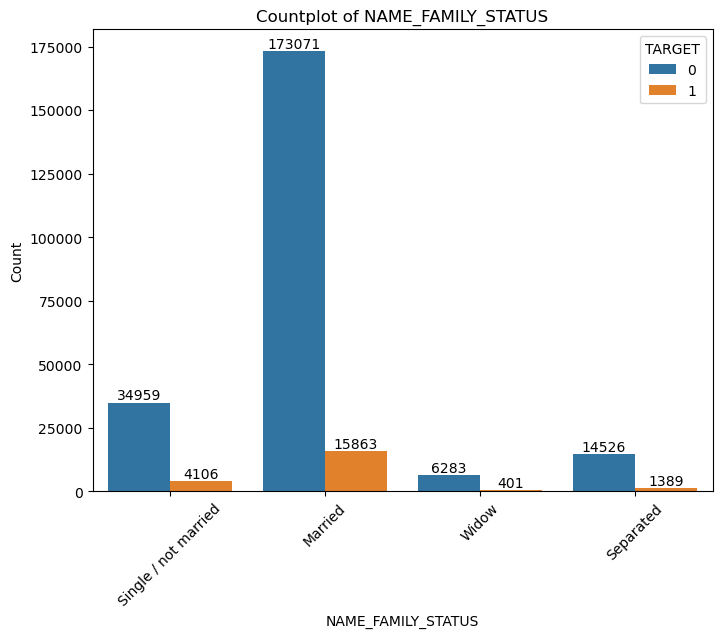

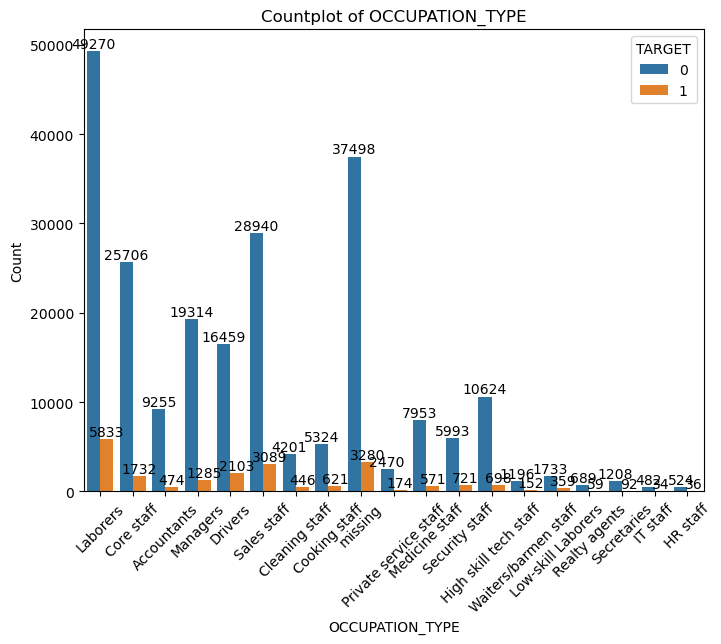

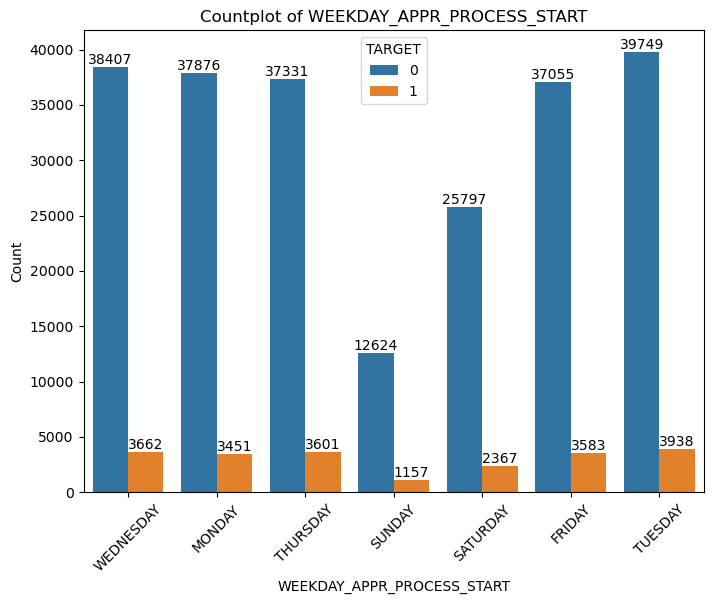

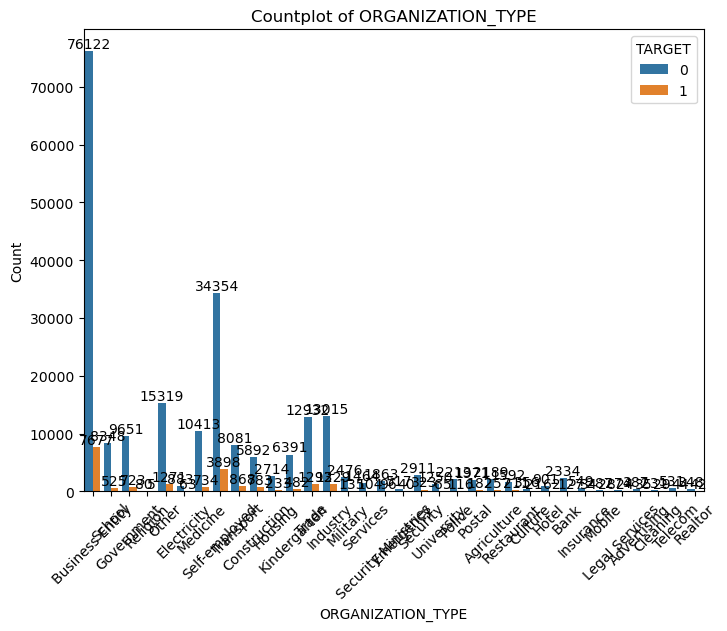

In [9]:

def create_countplots(dataframe):
    object_columns = dataframe.select_dtypes(include='object').columns
    
    for column in object_columns:
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(data=dataframe, x=column, hue='TARGET')
        plt.title(f'Countplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])

# Assuming you have a dataframe called 'df'
create_countplots(current_data)

In [10]:
# Seperating Numeric and Object columns names
def separate_columns(dataframe):
    data_numeric_cols = dataframe.select_dtypes(include='number').columns
    data_obj_cols = dataframe.select_dtypes(include='object').columns

    return data_numeric_cols, data_obj_cols

# Assuming you have a dataframe called 'df'
data_numeric_cols, data_obj_cols = separate_columns(current_data)

print("Numeric Columns:")
print(len(data_numeric_cols))

print("\nObject Columns:")
print(len(data_obj_cols))

Numeric Columns:
60

Object Columns:
10


In [11]:
#Creating list of flag columns and removing from numeric columns
data_numeric_cols = list(data_numeric_cols)
data_flag_cols = [val for val in data_numeric_cols if 'FLAG_' in val]

# remove flags from numeric cols
for val in data_flag_cols:
    data_numeric_cols.remove(val)

In [12]:
data_area_cols = [val for val in data_numeric_cols if ('REGION_' in val or 'CITY_' in val )]

# remove area columns from numeric cols
for val in data_area_cols:
    data_numeric_cols.remove(val)

In [13]:
#Creating list of Flag columns and removing from numeric columns
data_days_cols = [val for val in data_numeric_cols if ('DAYS_' in val or 'HOUR_' in val )]

# remove flags from numeric cols
for val in data_days_cols:
    data_numeric_cols.remove(val)

In [14]:
#Creating list of Flag columns and removing from numeric columns
data_amt_cols = [val for val in data_numeric_cols if 'AMT_' in val]

# remove flags from numeric cols
for val in data_amt_cols:
    data_numeric_cols.remove(val)

In [15]:
print('Numeric cols',len(data_numeric_cols))
print('Area cols',len(data_area_cols))
print('Flag cols',len(data_flag_cols))
print('Days cols',len(data_days_cols))
print('Amount cols',len(data_amt_cols))

Numeric cols 10
Area cols 9
Flag cols 26
Days cols 6
Amount cols 9


In [16]:
# let's remove target and client id from numeric
data_numeric_cols.remove('SK_ID_CURR')
data_numeric_cols.remove('TARGET')

In [17]:
# We have verified the distribution during the data cleaning stage. We'll create a function now to visualize the distribution of numeric values

def numericDistributionGraph(col):
    print("\033[1m\033[1;3mDistribution Based on "+str(col)+"\033[0m")
    print('Description : ',columns_data[(columns_data.Table == 'application_data') & (columns_data.Row == col)].Description.values[0],'\n')
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(221)
    sns.distplot(current_data[col], kde=True, vertical=False, rug=False, bins=15, color='#222831')
    plt.title('Distribution of '+col+' Across current application')
    
    plt.subplot(222)
    sns.boxplot(x='TARGET', y=col ,data=current_data,)
    plt.title('Distribution of '+col+' with respect to TARGET feature')
    
    plt.subplot(223)
    sns.violinplot(current_data[col],color='#F38181')
    plt.title('Distribution of '+col+' quantile Across current application')
    
    plt.subplot(224)
    sns.heatmap(current_data[['TARGET',col]].corr(), cmap='Greens')
    plt.title('Correlation heatmap of '+col+' wrt TARGET feature')
    plt.show()

Distribution Based on CNT_CHILDREN
Description :  Number of children the client has 



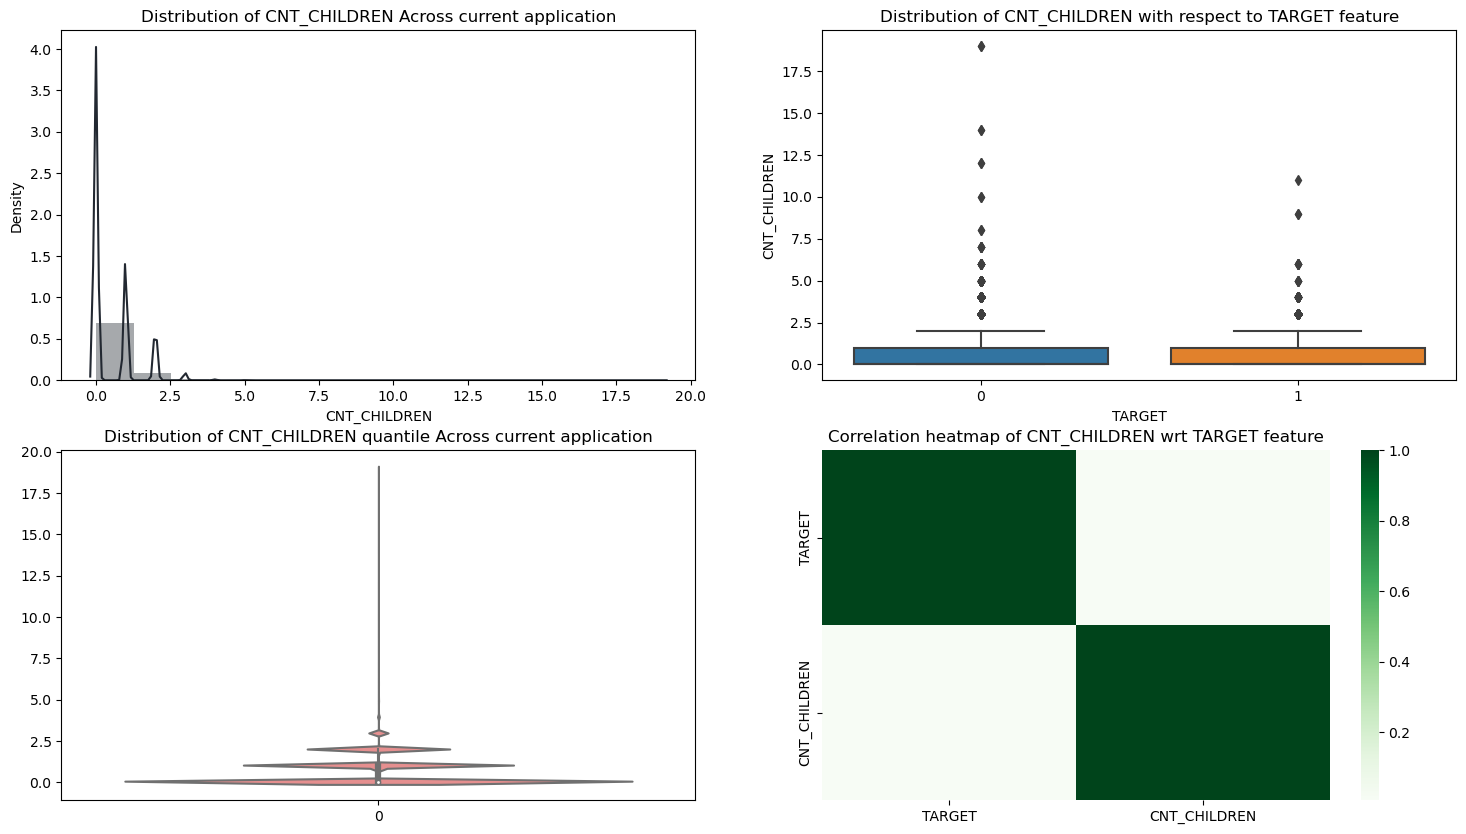

Distribution Based on CNT_FAM_MEMBERS
Description :  How many family members does client have 



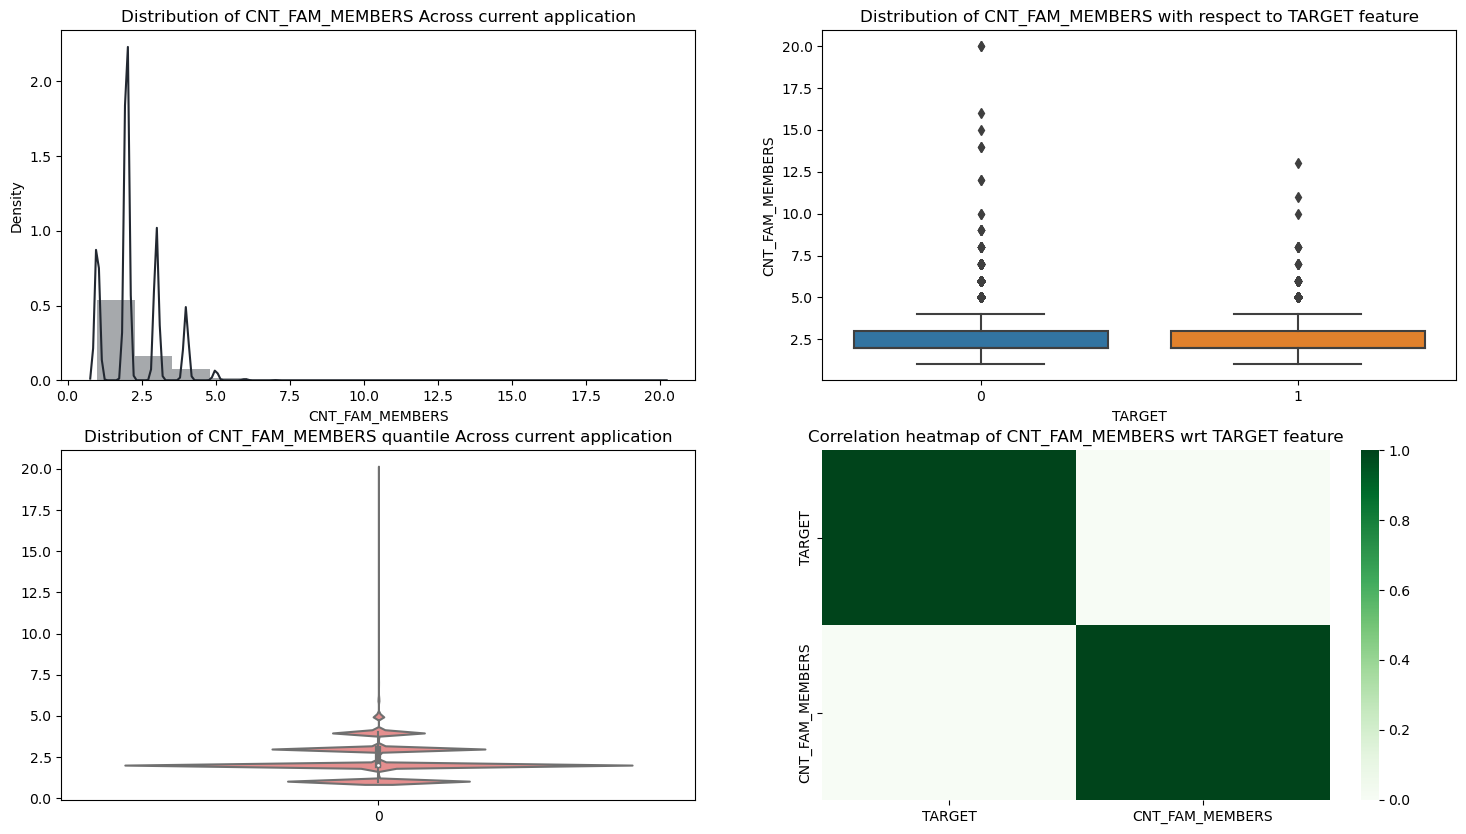

Distribution Based on EXT_SOURCE_2
Description :  Normalized score from external data source 



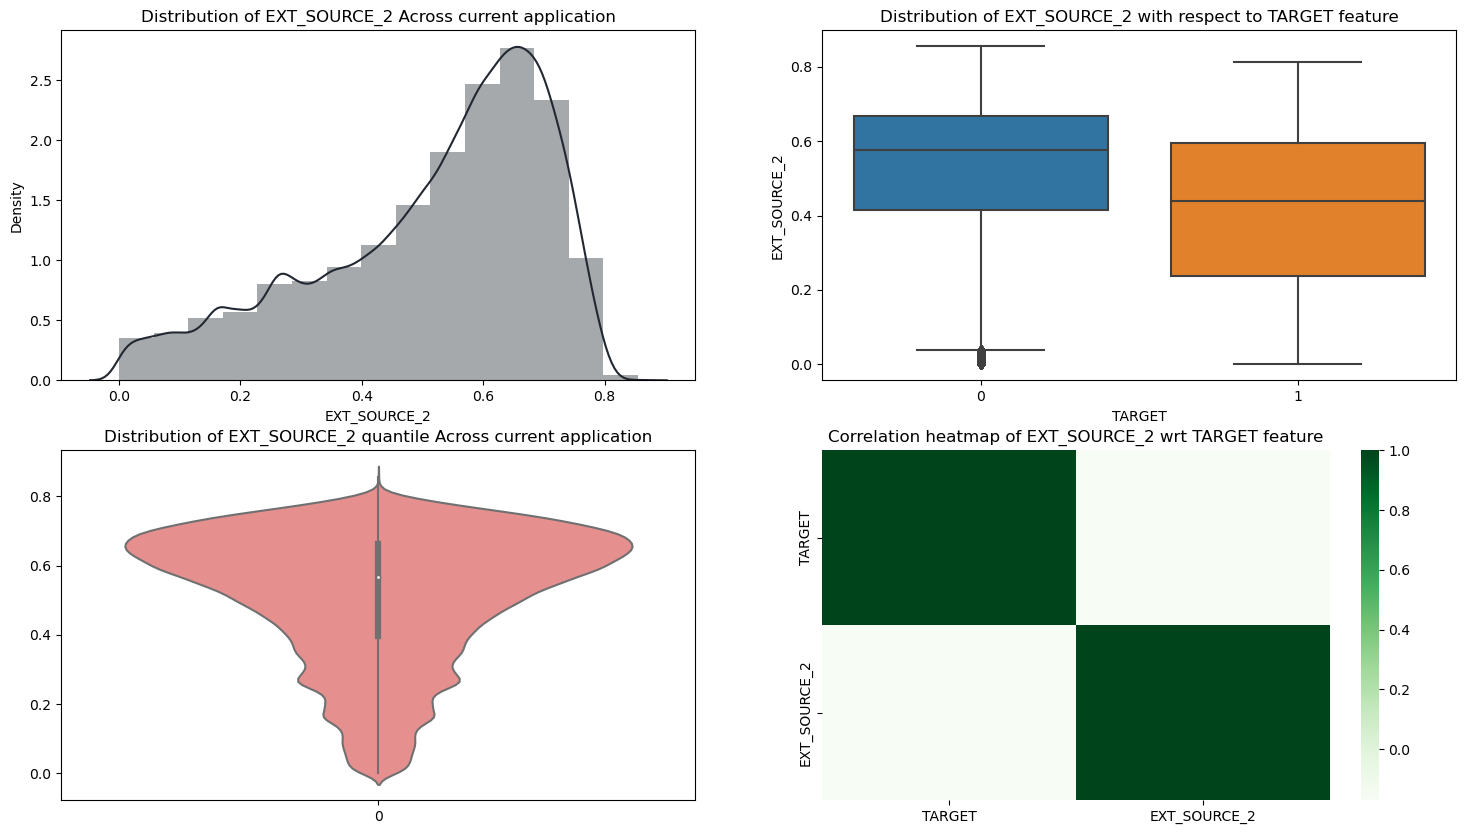

Distribution Based on EXT_SOURCE_3
Description :  Normalized score from external data source 



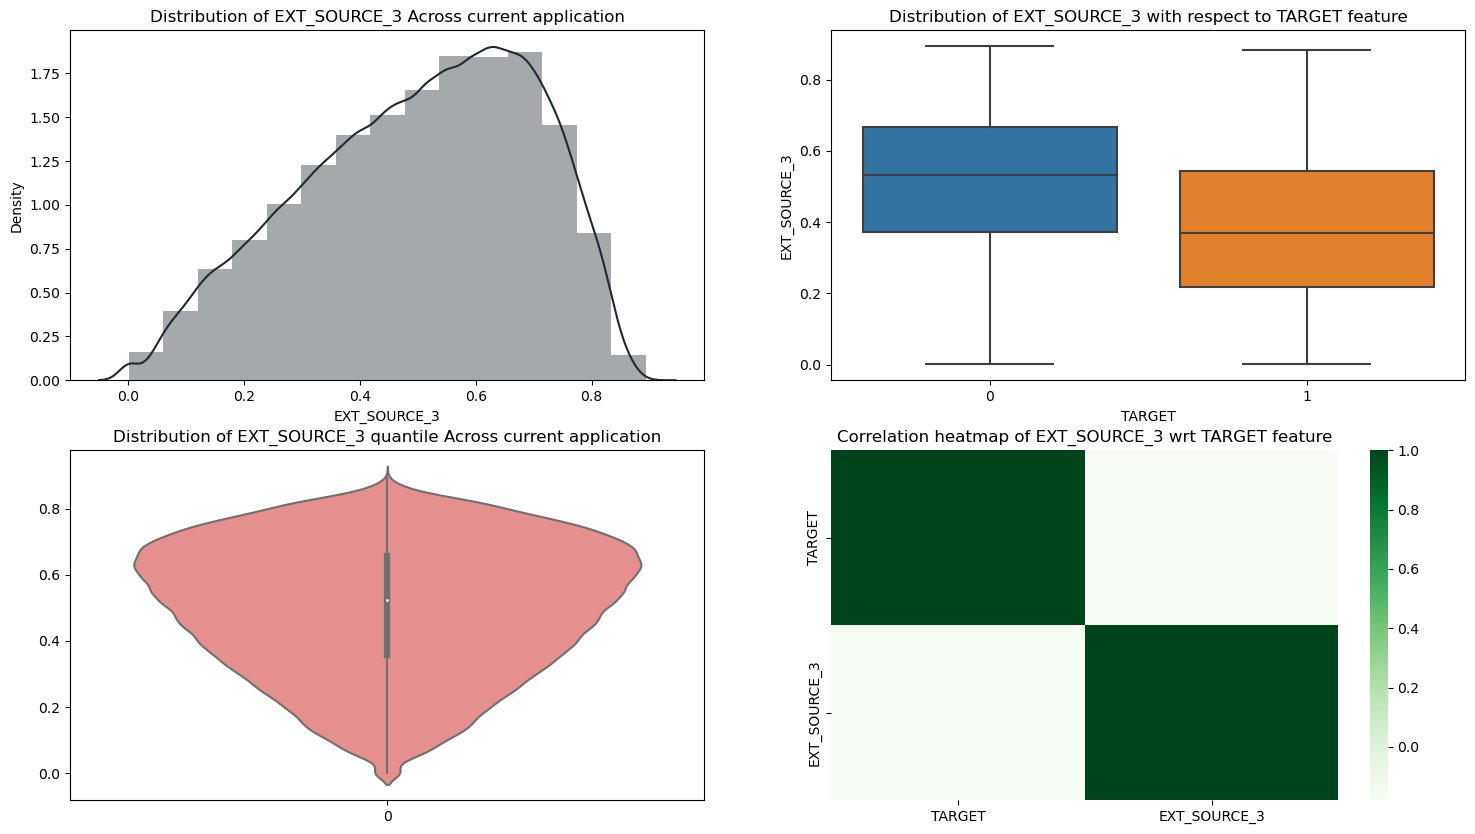

Distribution Based on OBS_30_CNT_SOCIAL_CIRCLE
Description :  How many observation of client's social surroundings with observable 30 DPD (days past due) default 



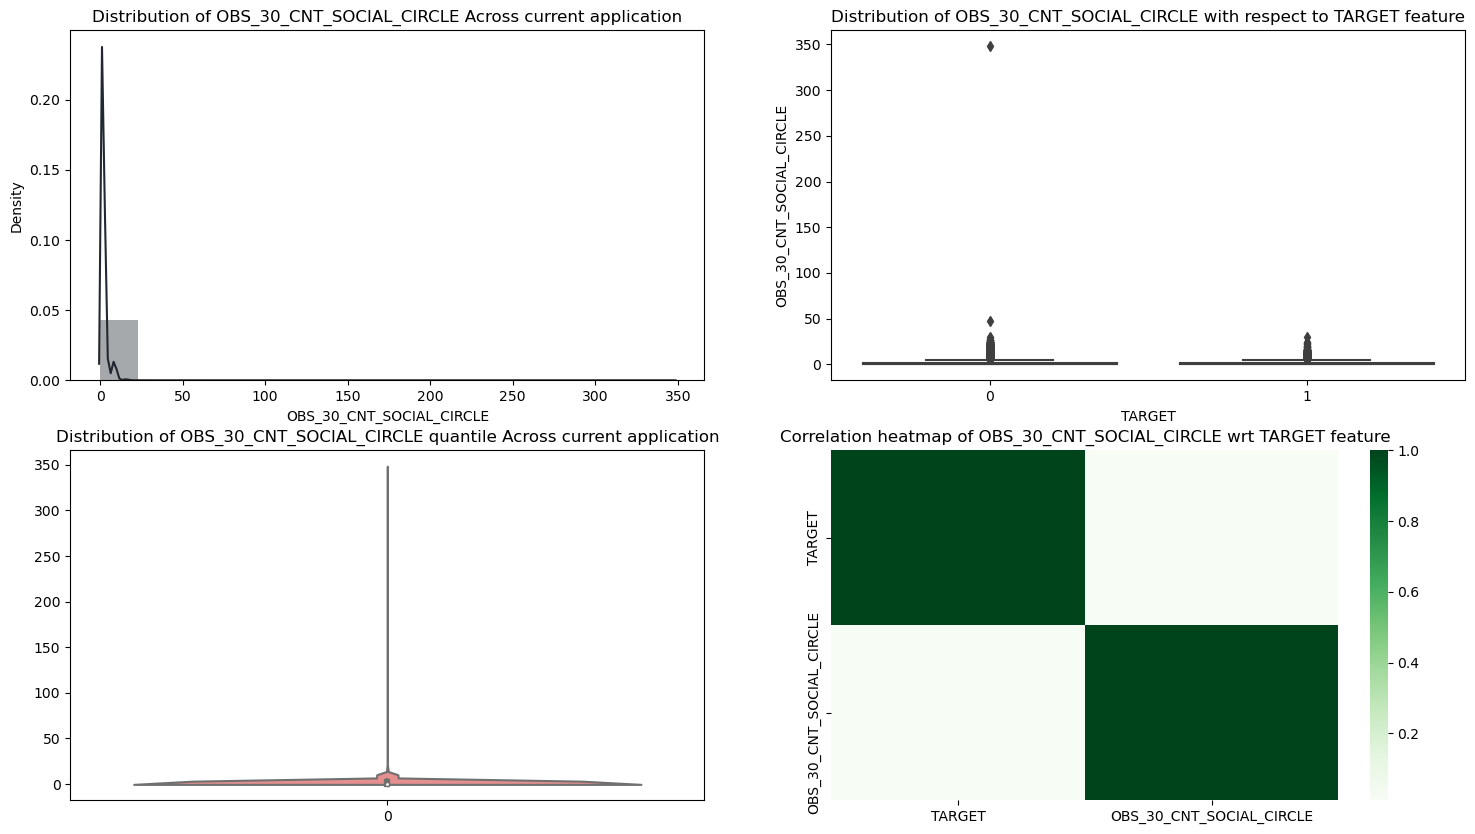

Distribution Based on DEF_30_CNT_SOCIAL_CIRCLE
Description :  How many observation of client's social surroundings defaulted on 30 DPD (days past due)  



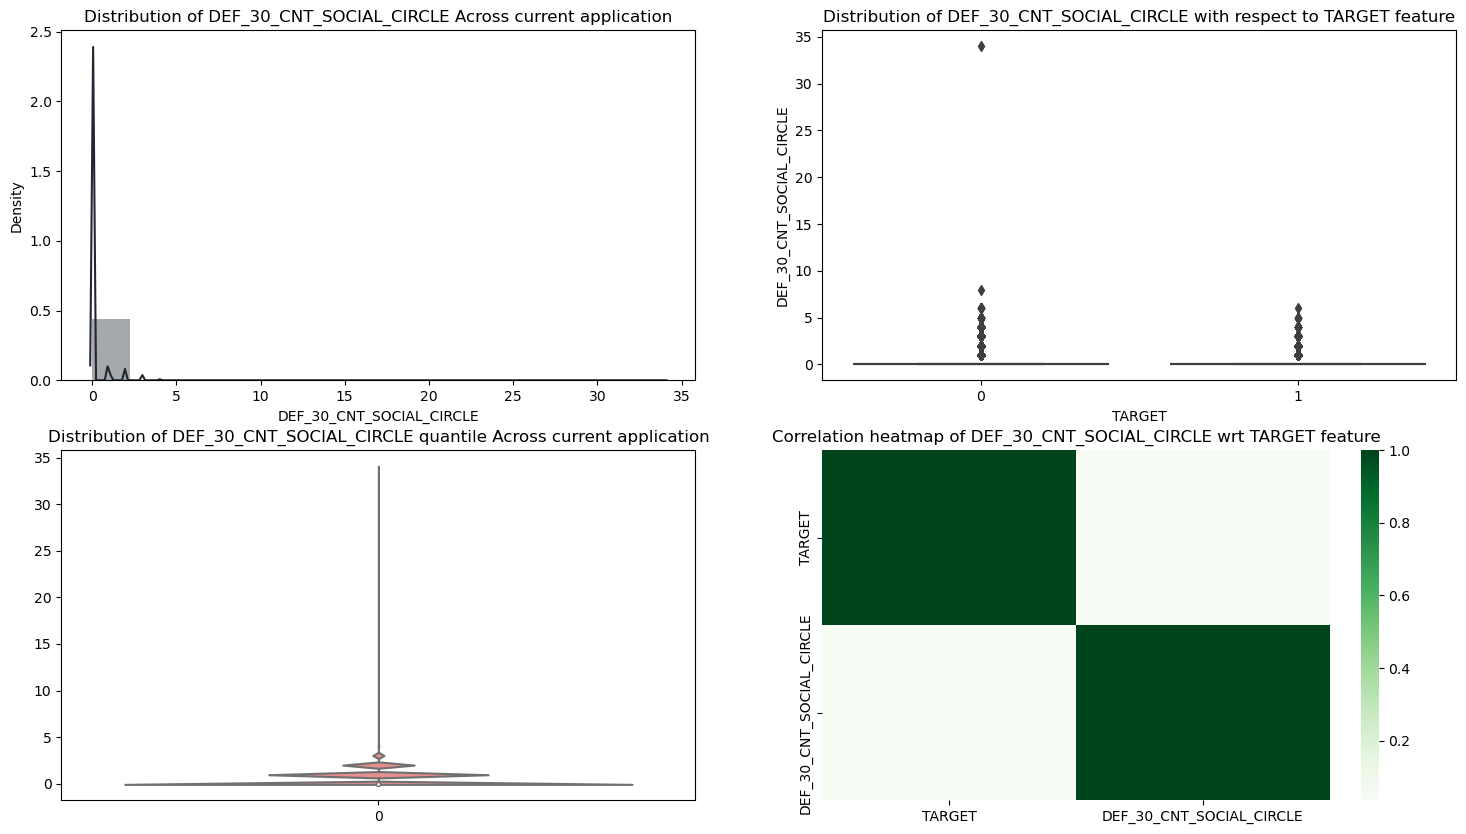

Distribution Based on OBS_60_CNT_SOCIAL_CIRCLE
Description :  How many observation of client's social surroundings with observable 60 DPD (days past due) default 



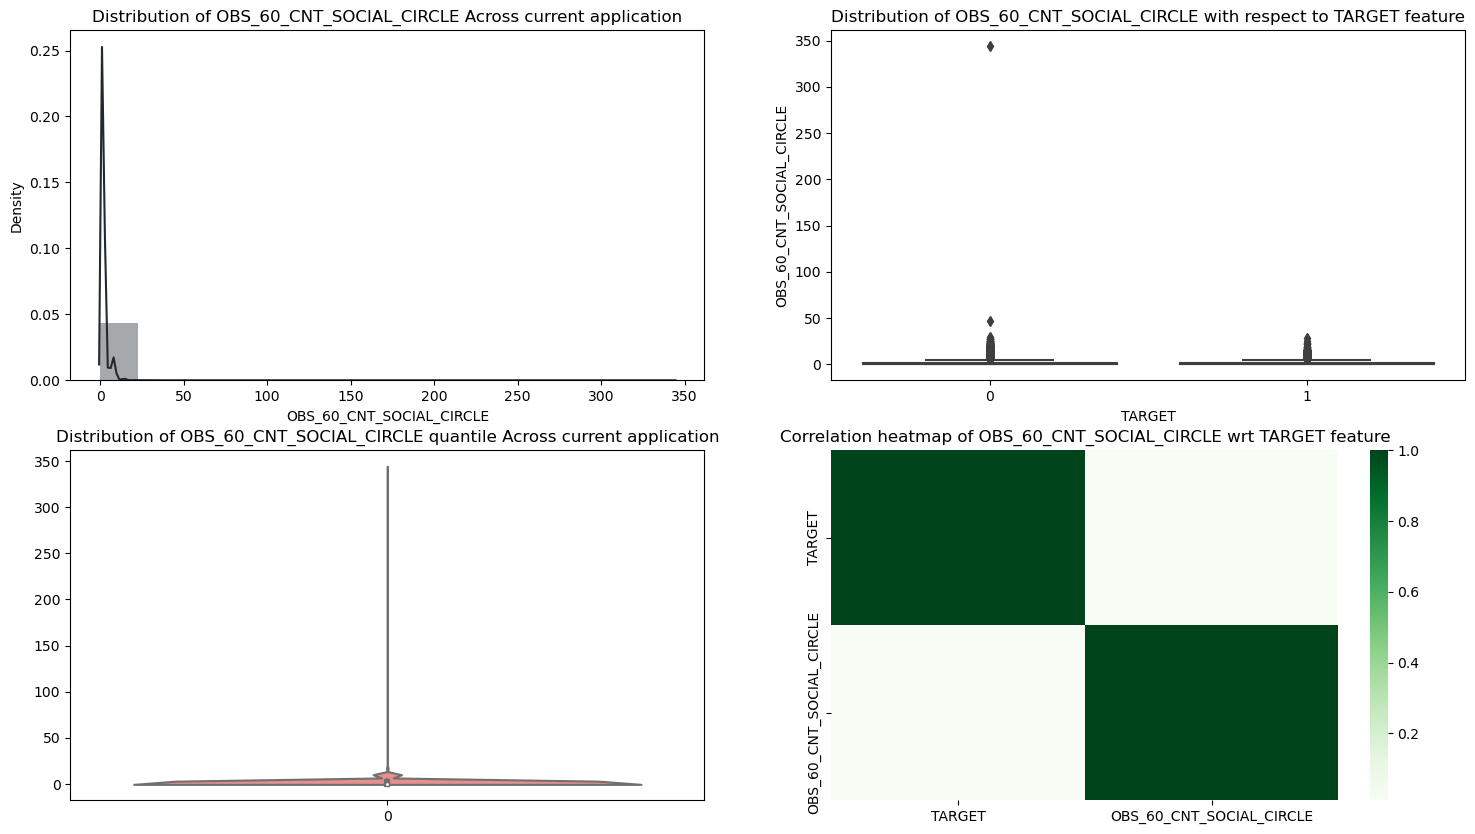

Distribution Based on DEF_60_CNT_SOCIAL_CIRCLE
Description :  How many observation of client's social surroundings defaulted on 60 (days past due) DPD 



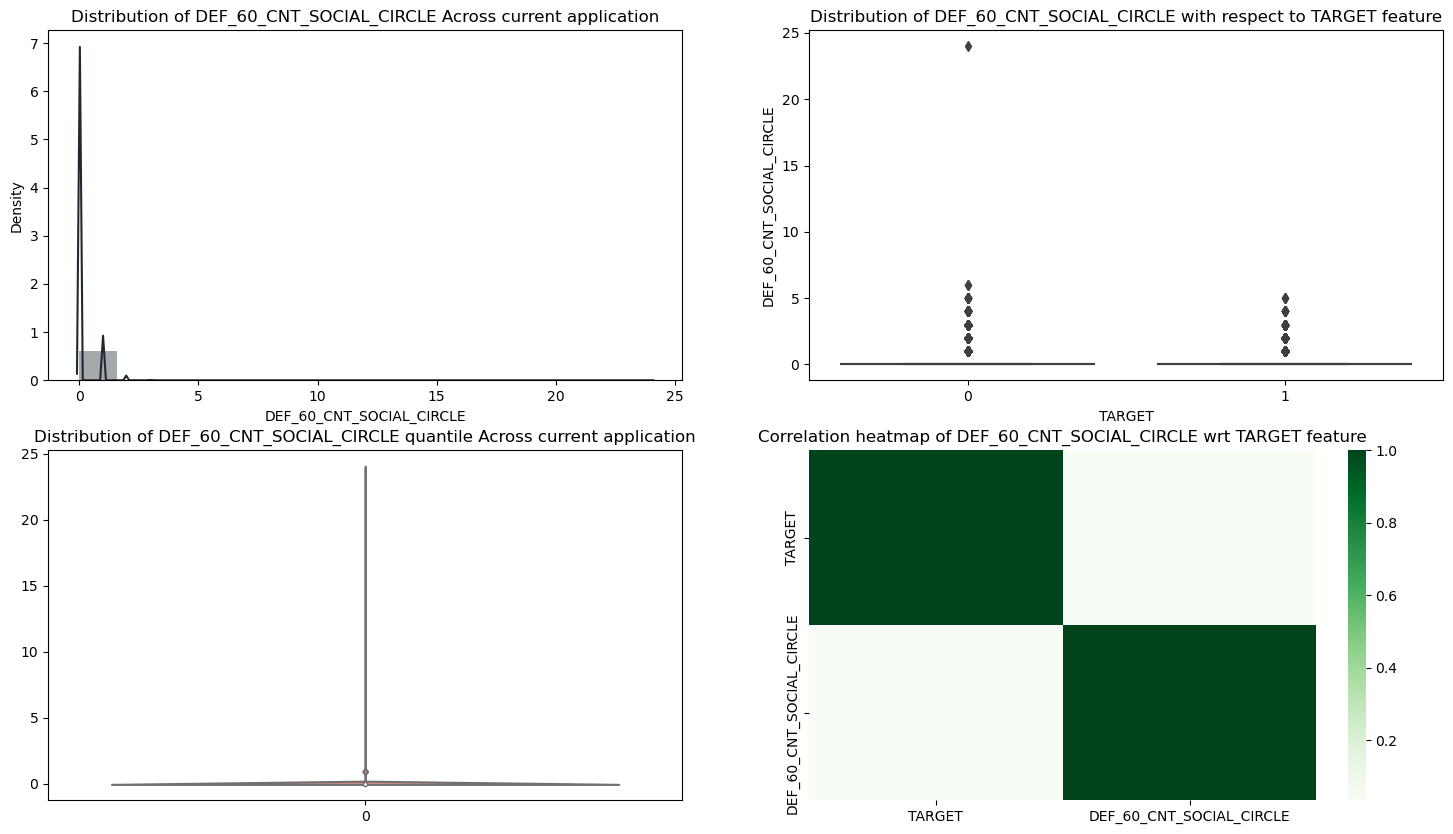

In [18]:
for col in data_numeric_cols:
    numericDistributionGraph(col)

In [19]:
#Let's bin these values 
bins = [0,30, 40, 50, 60,100]
labels = ['<30','30-40','40-50','50-60','>60']
current_data.DAYS_BIRTH = pd.cut(current_data.DAYS_BIRTH, bins, labels=labels)

bins = [0, 2, 4, 6, 8, 10, 50]
labels = ['<2','2-4','4-6','6-8','8-10','>10']
current_data.DAYS_EMPLOYED = pd.cut(current_data.DAYS_EMPLOYED,bins,labels=labels)

bins = [0, 4, 8, 12, 16, 20, 63]
labels = ['<4','4-8','8-12','12-16','16-20','>20']
current_data.DAYS_REGISTRATION = pd.cut(current_data.DAYS_REGISTRATION,bins,labels=labels)

bins = [0, 4, 8, 12, 16, 20]
labels = ['<4','4-8','8-12','12-16','>16']
current_data.DAYS_ID_PUBLISH = pd.cut(current_data.DAYS_ID_PUBLISH,bins,labels=labels)

bins = [0, 6, 12, 18, 24]
labels = ['12AM-6AM','6AM-12PM','12PM-6PM','6PM-12AM']
current_data.HOUR_APPR_PROCESS_START = pd.cut(current_data.HOUR_APPR_PROCESS_START,bins,labels=labels)

bins = [0, 1, 2, 3, 4, 12]
labels = ['<1','1-2','2-3','3-4','>4']
current_data.DAYS_LAST_PHONE_CHANGE = pd.cut(current_data.DAYS_LAST_PHONE_CHANGE,bins,labels=labels)

In [20]:
def distributionGraphs(x):
    #Create a normalized value count converted to percentage
    target_group = round(current_data.groupby('TARGET')[x].value_counts(normalize=True,sort=False)*100)
    cnt = int((target_group.count()/2))
    
    all_colr = ['#63B8FF','#00F5FF','#00CCCC','#FFC300','#66CC66','#FF5733']
    colors = all_colr[:cnt]
    plt.figure(figsize=(18,6))
    
    plt.subplot(121)
    plt.title(str(x)+' Distribution grouped by Target')
    ax = target_group.plot(kind='bar',color=colors)
    
    # A method to print values in Bar
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + bar.get_height()/2, str(bar.get_height()))
    
    plt.subplot(122)
    plt.title(str(x)+' distribution in Overall Records')
    (current_data[x].value_counts(normalize=True)*100).plot(kind='pie', autopct = "%1.0f%%", colors=colors)
    plt.ylabel(' ')
    plt.show()

    print("\n\n")

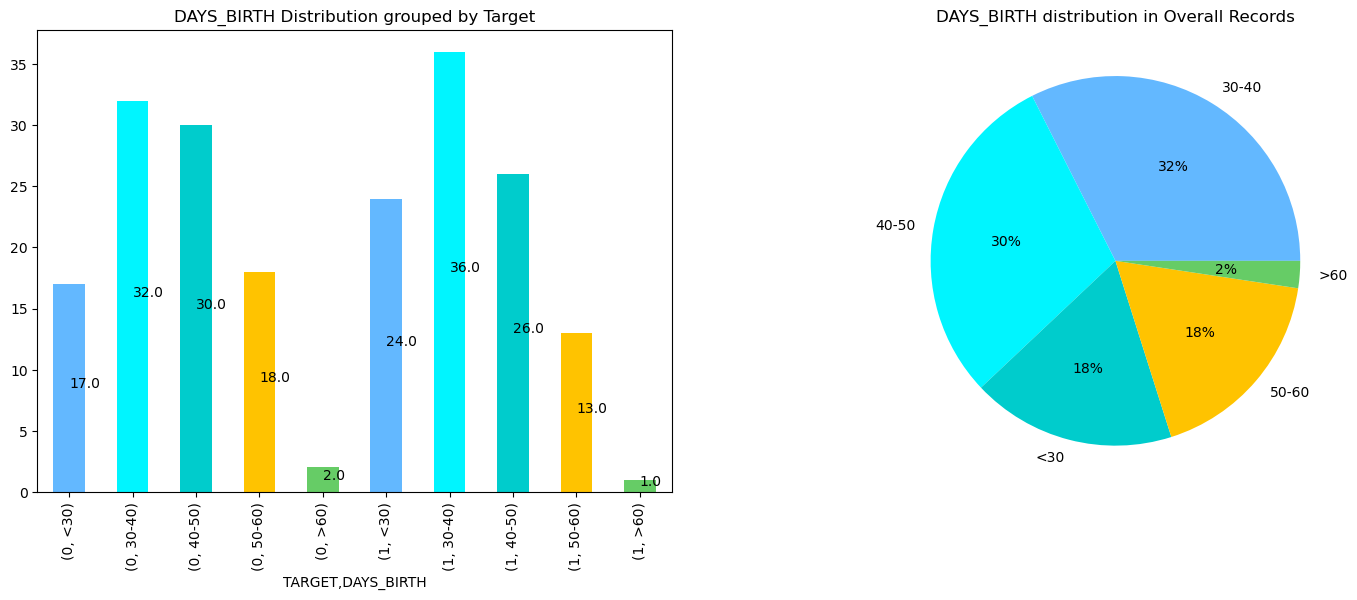

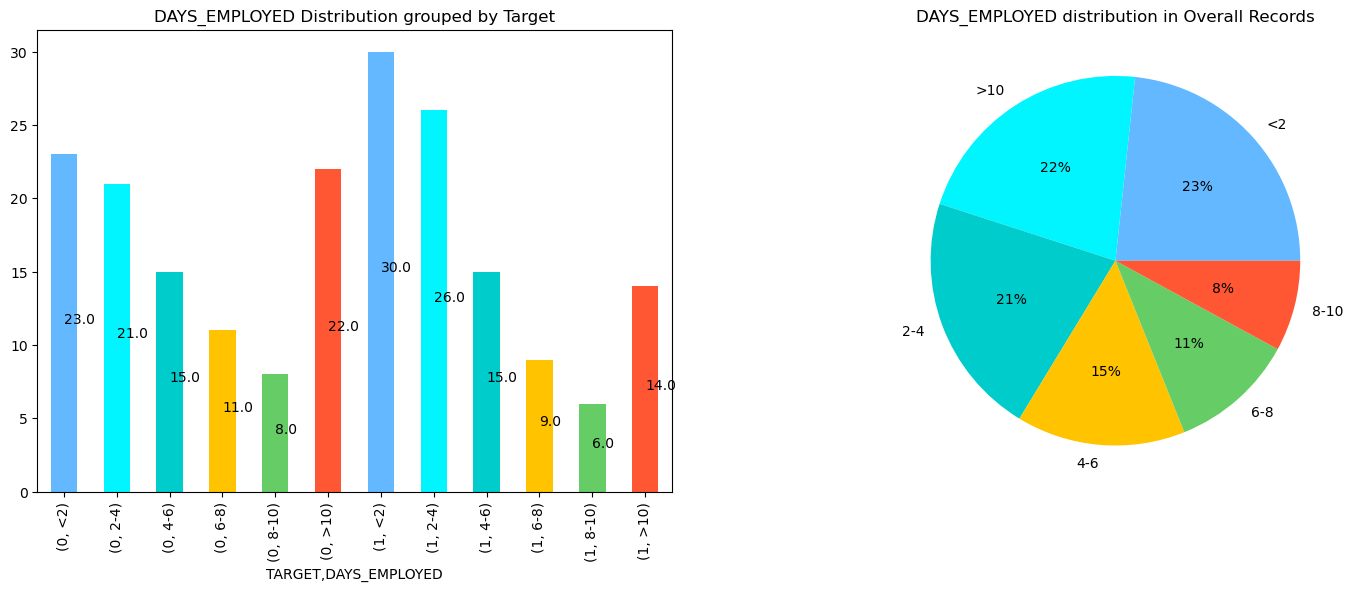

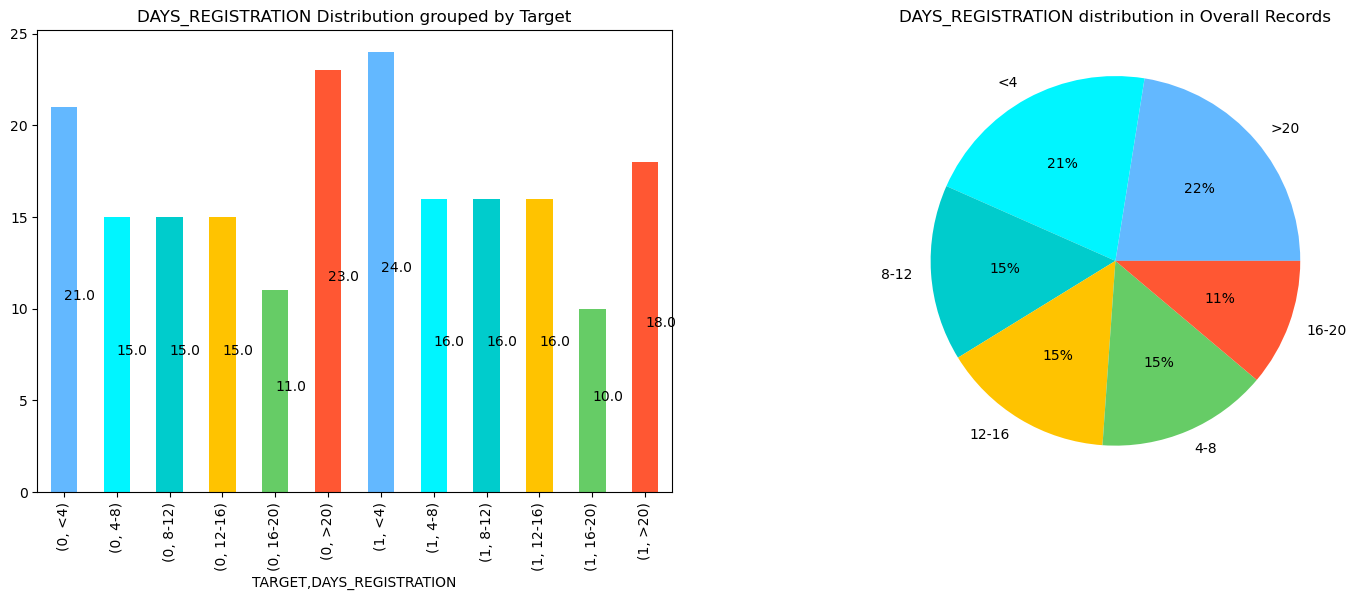

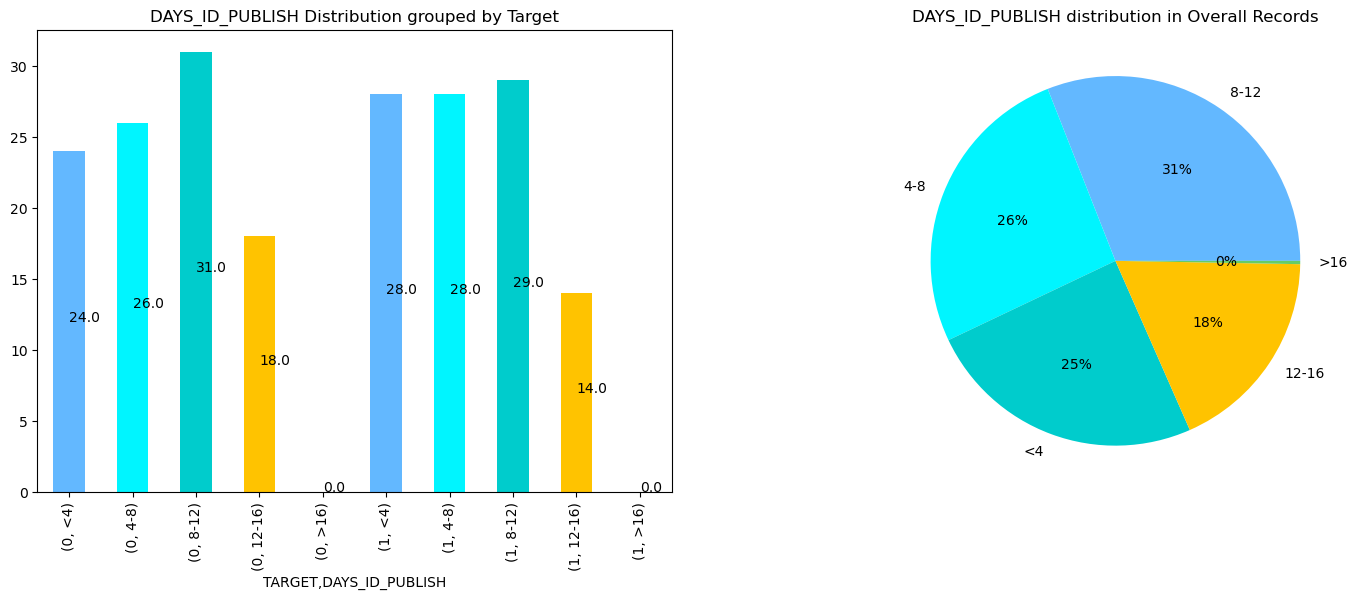

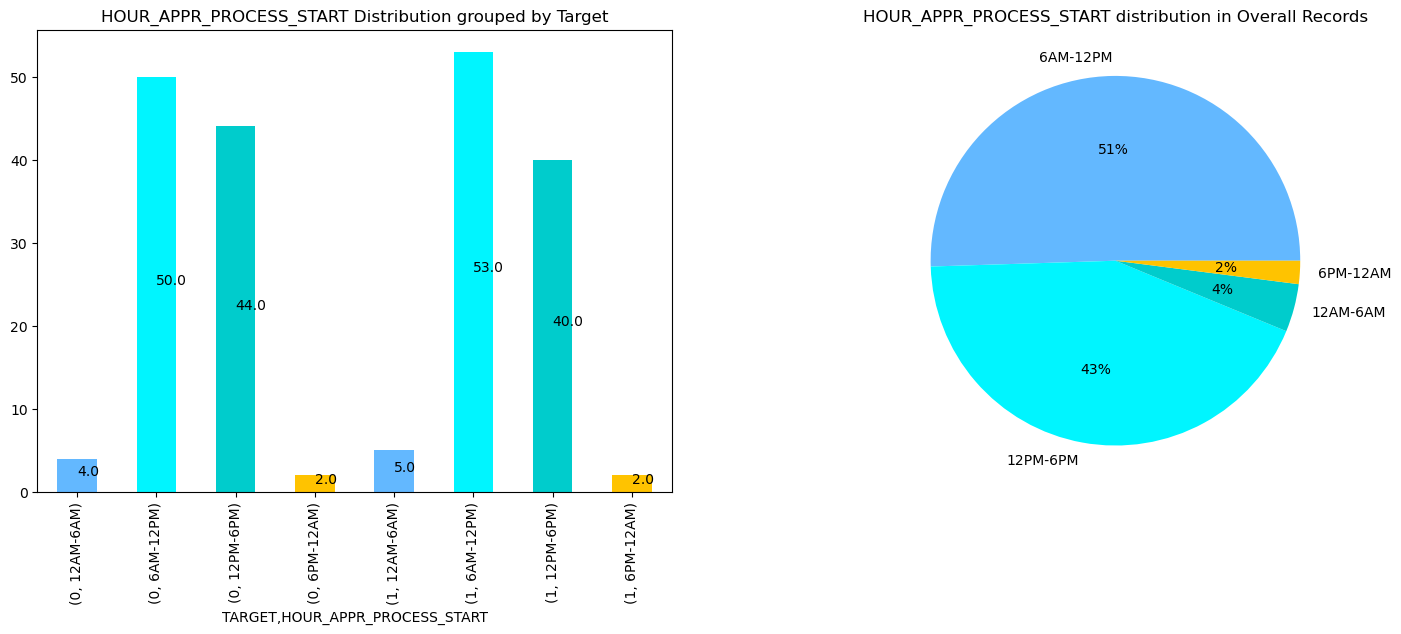

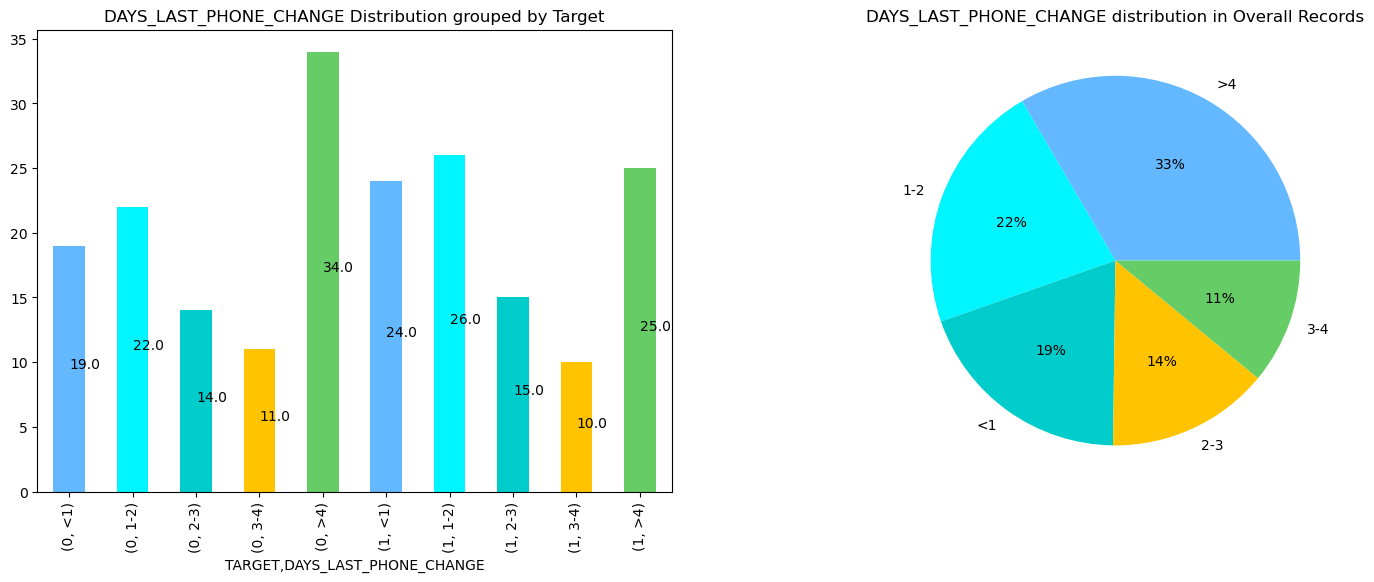

In [21]:
for col in data_days_cols:
    distributionGraphs(col)

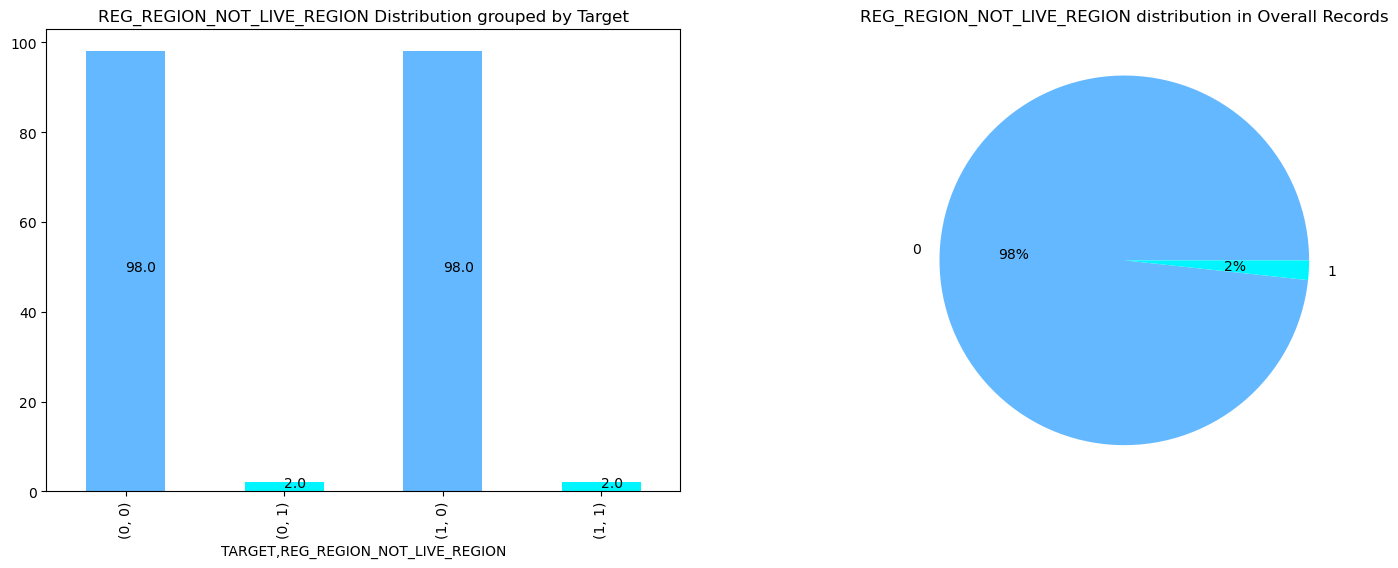

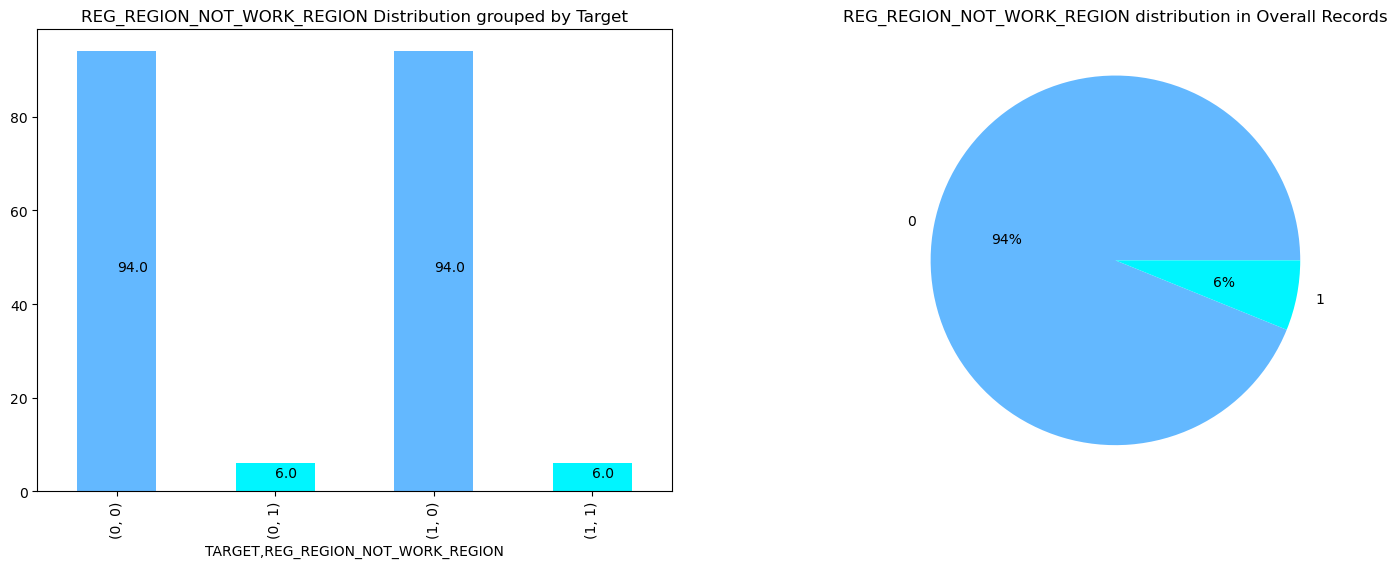

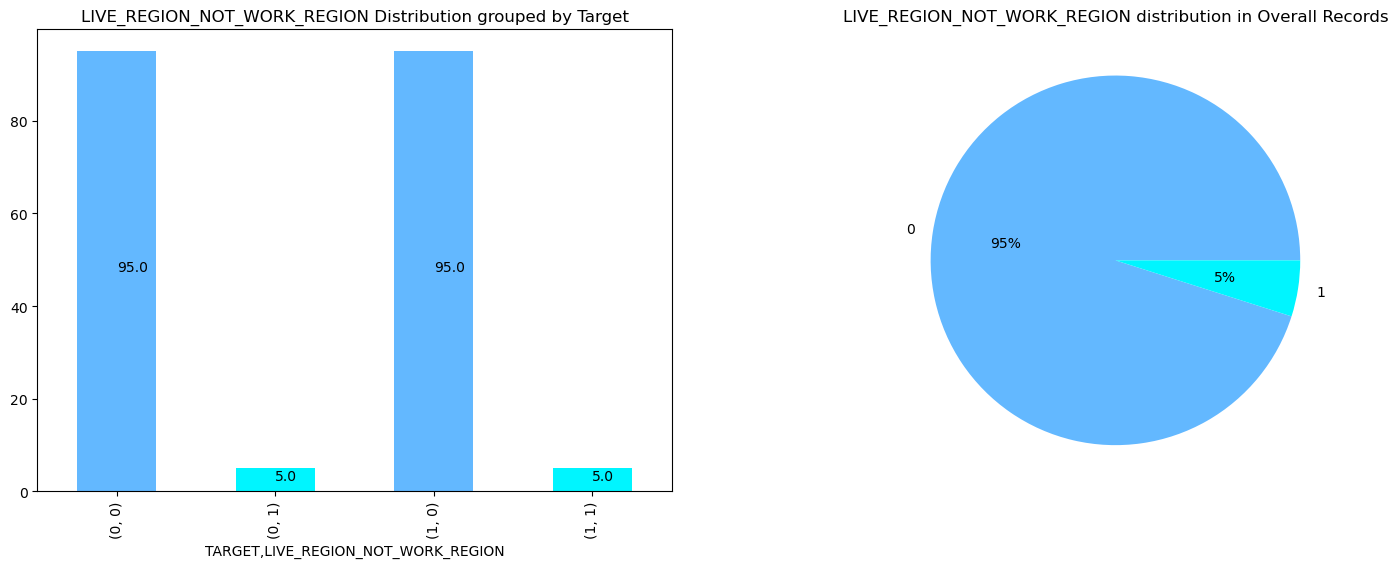

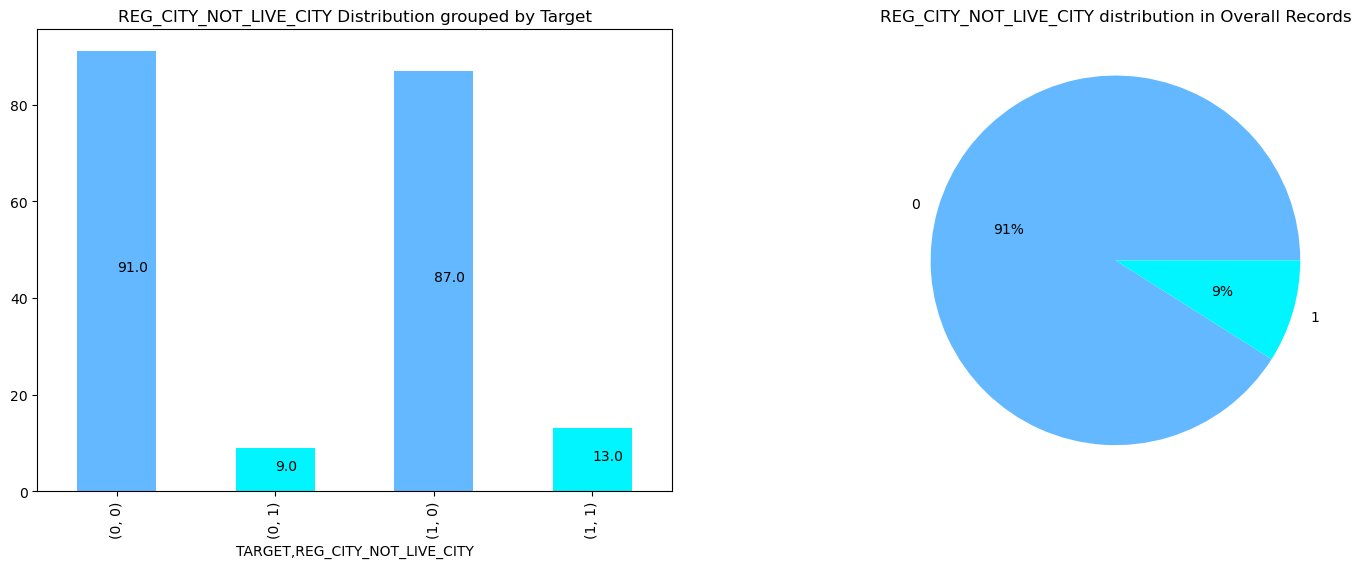

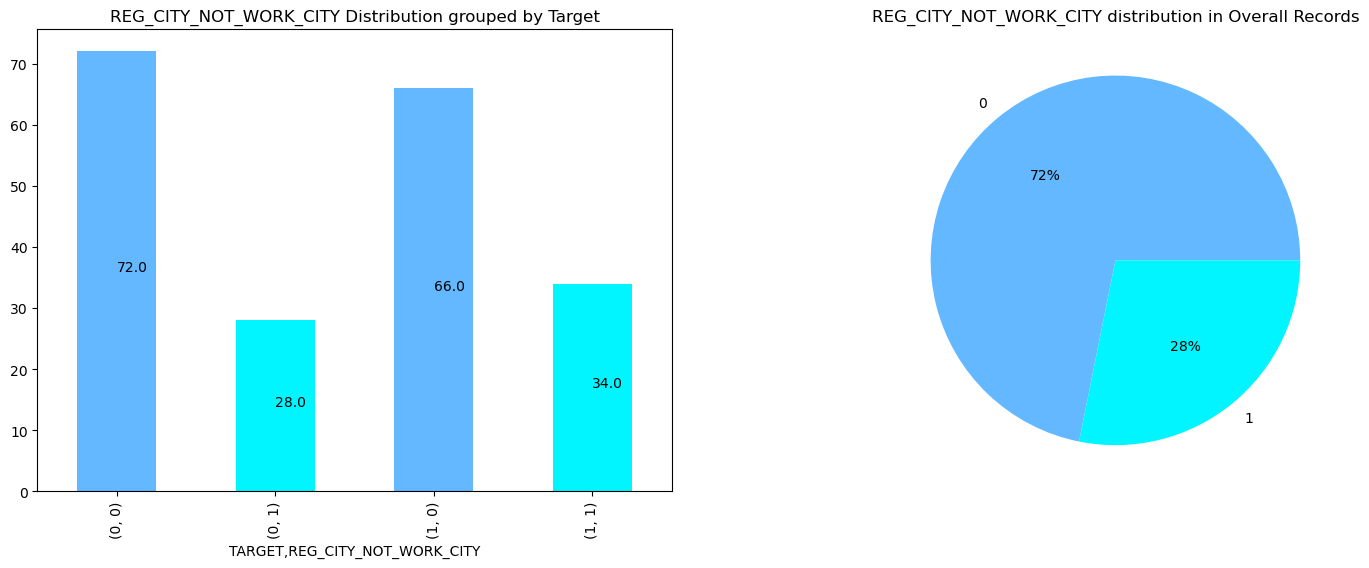

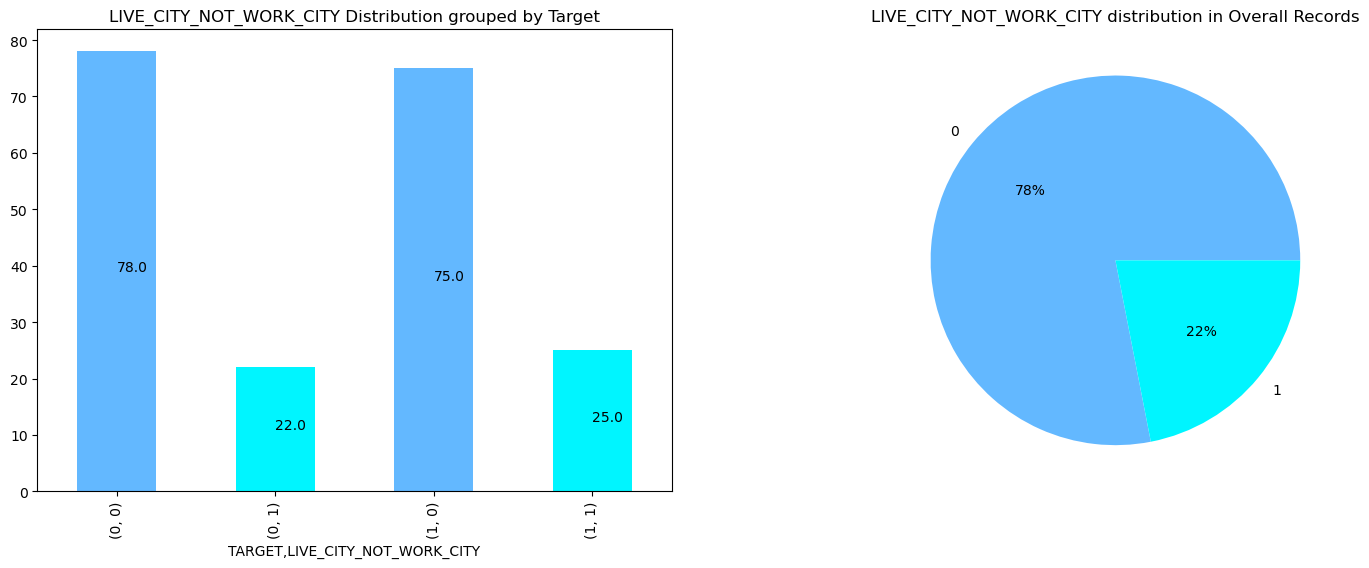

In [22]:
for col in data_area_cols[3:]:
    distributionGraphs(col)

Distribution Based on REGION_POPULATION_RELATIVE
Description :  Normalized population of region where client lives (higher number means the client lives in more populated region) 



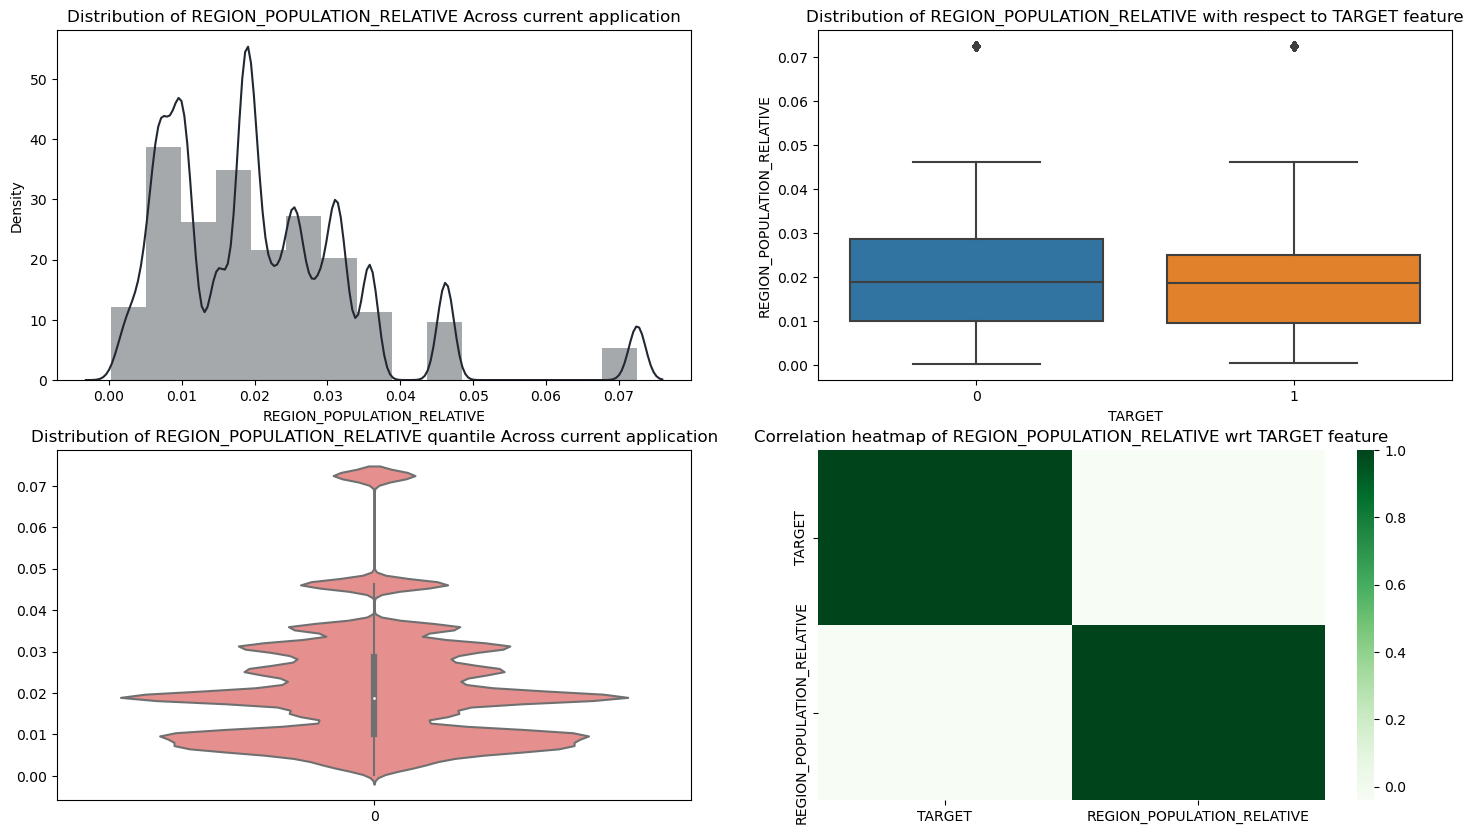

Distribution Based on REGION_RATING_CLIENT
Description :  Our rating of the region where client lives (1,2,3) 



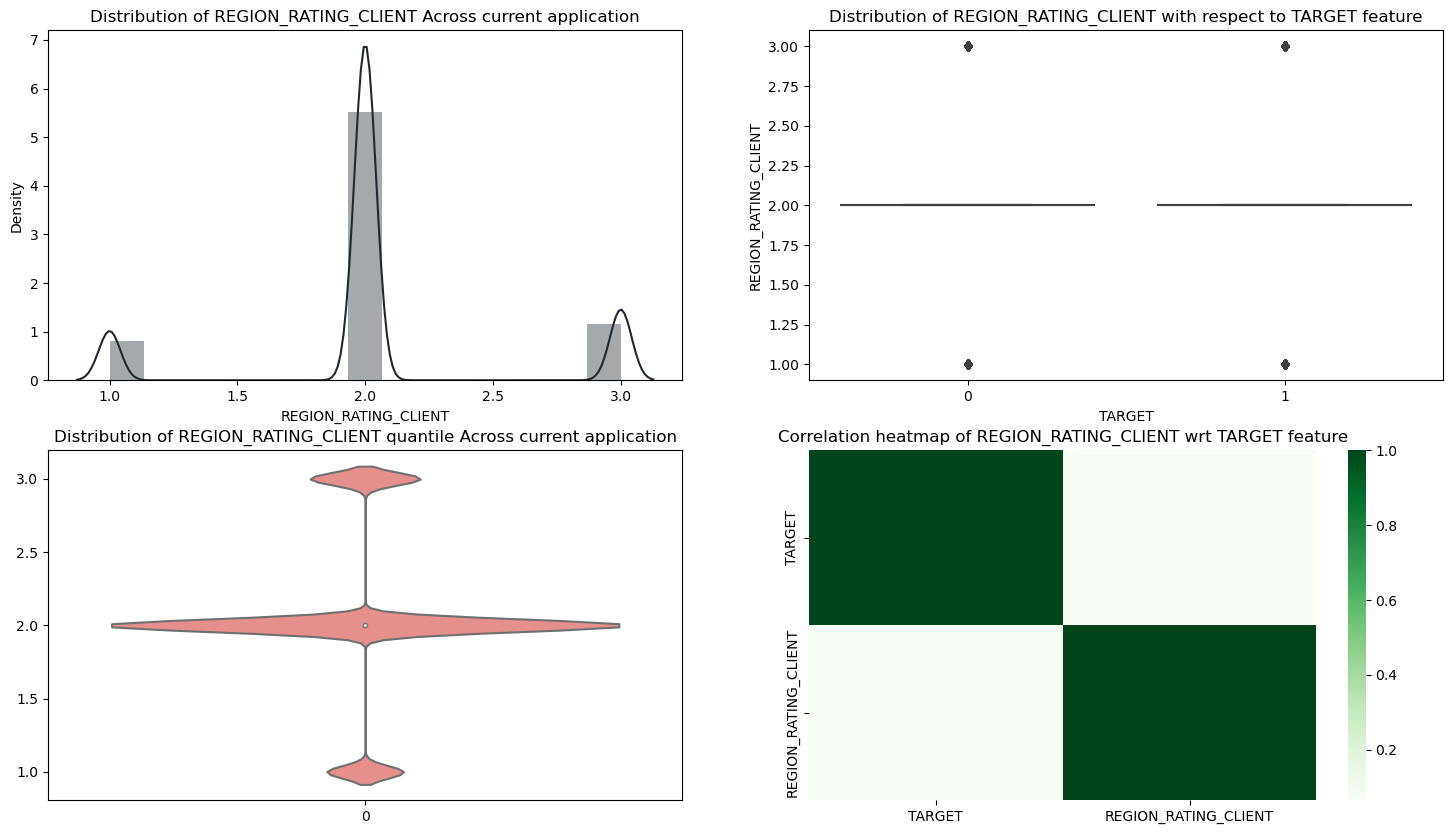

Distribution Based on REGION_RATING_CLIENT_W_CITY
Description :  Our rating of the region where client lives with taking city into account (1,2,3) 



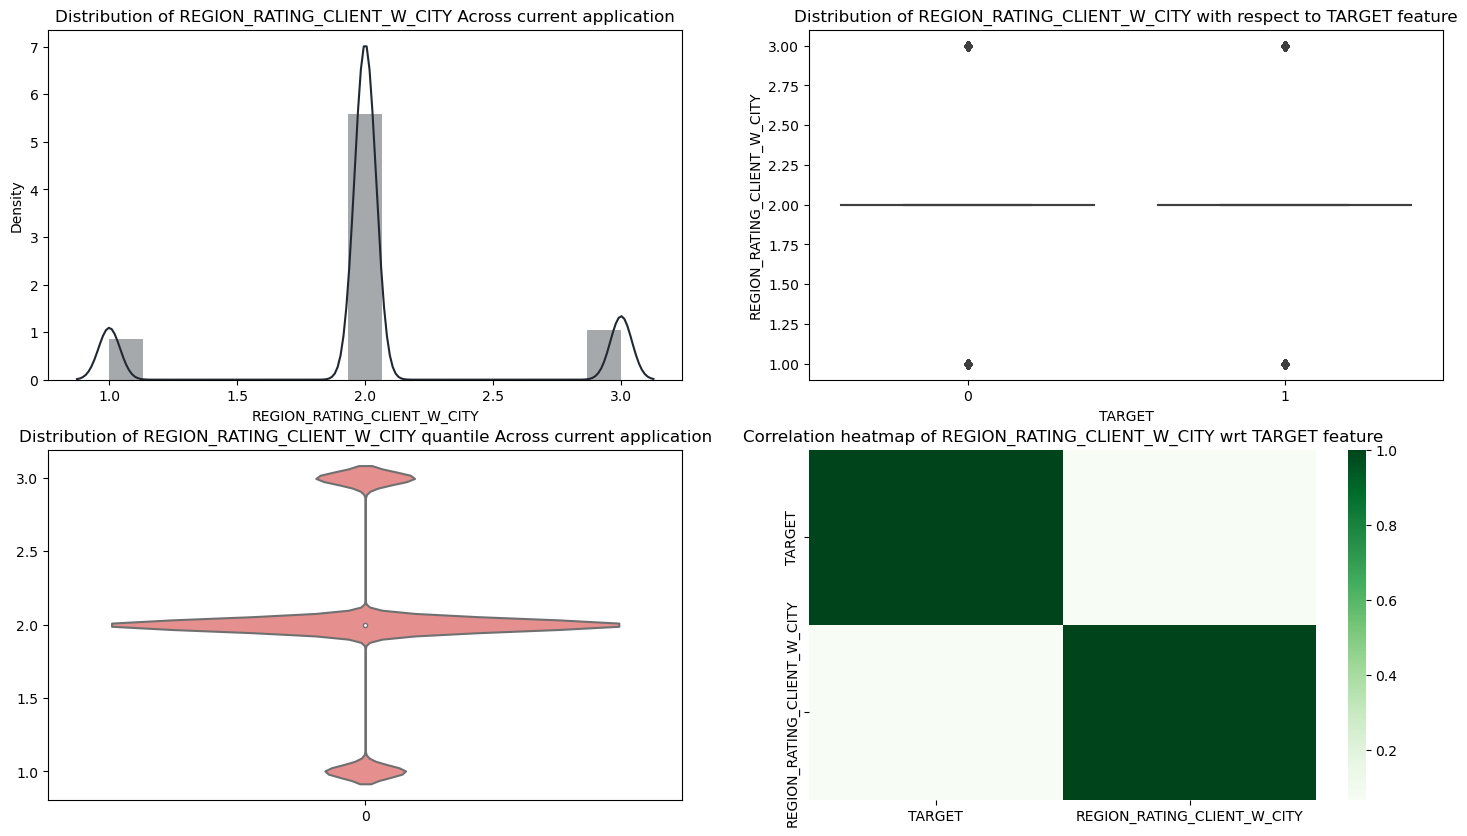

In [23]:
for col in data_area_cols[:3]:
    numericDistributionGraph(col)

Distribution Based on AMT_INCOME_TOTAL
Description :  Income of the client 



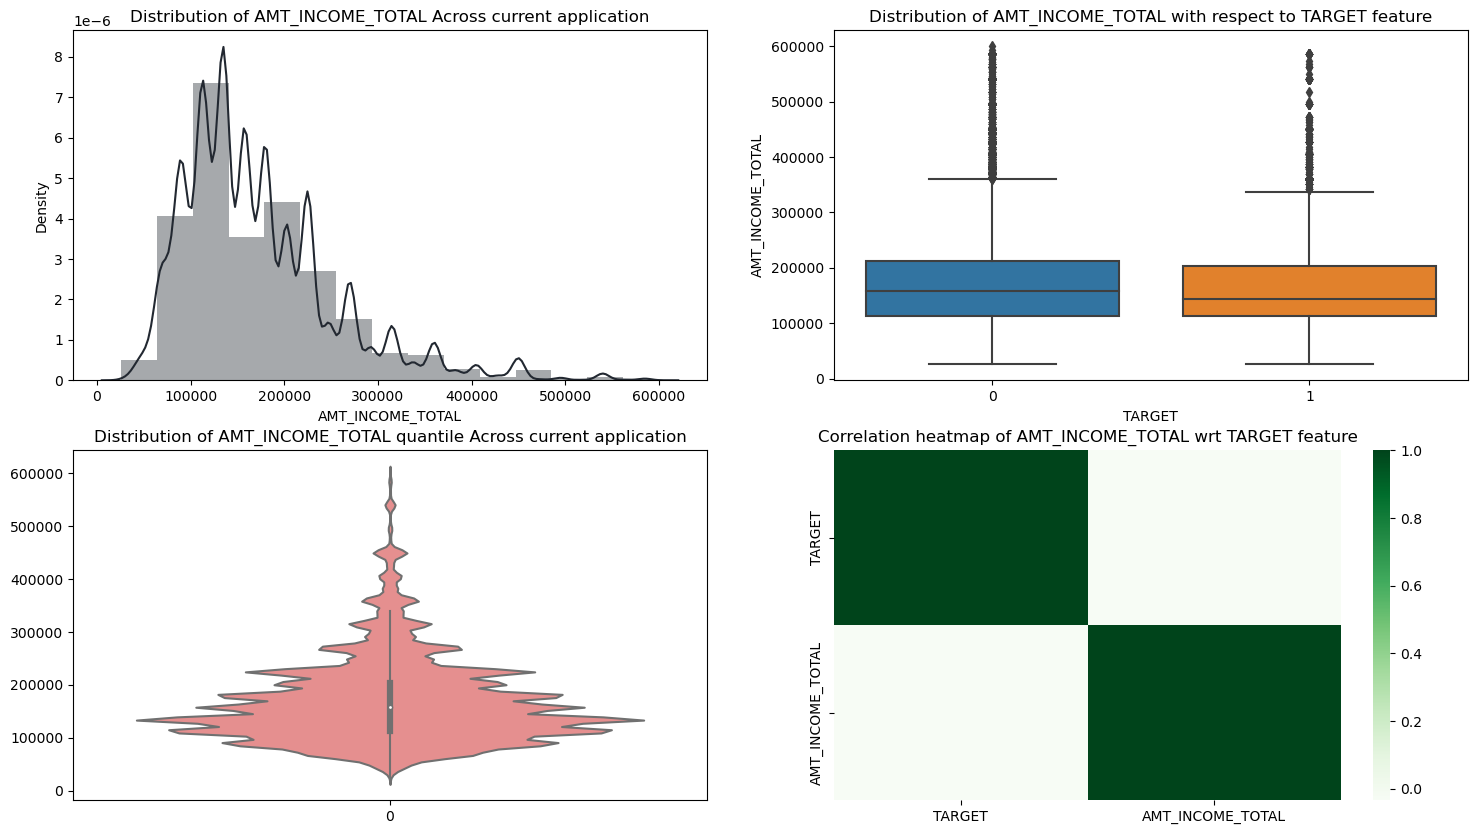

Distribution Based on AMT_CREDIT
Description :  Credit amount of the loan 



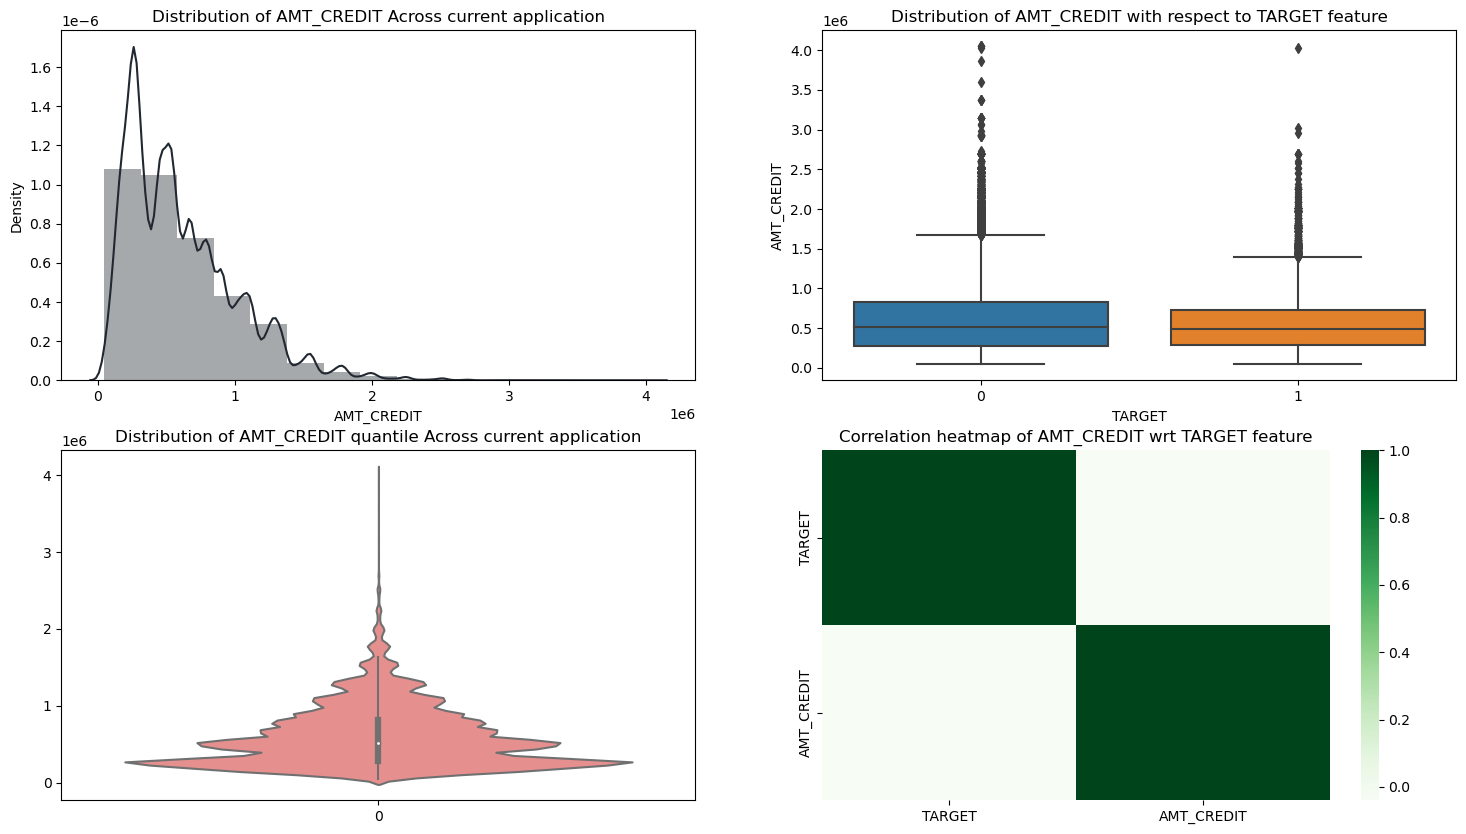

Distribution Based on AMT_ANNUITY
Description :  Loan annuity 



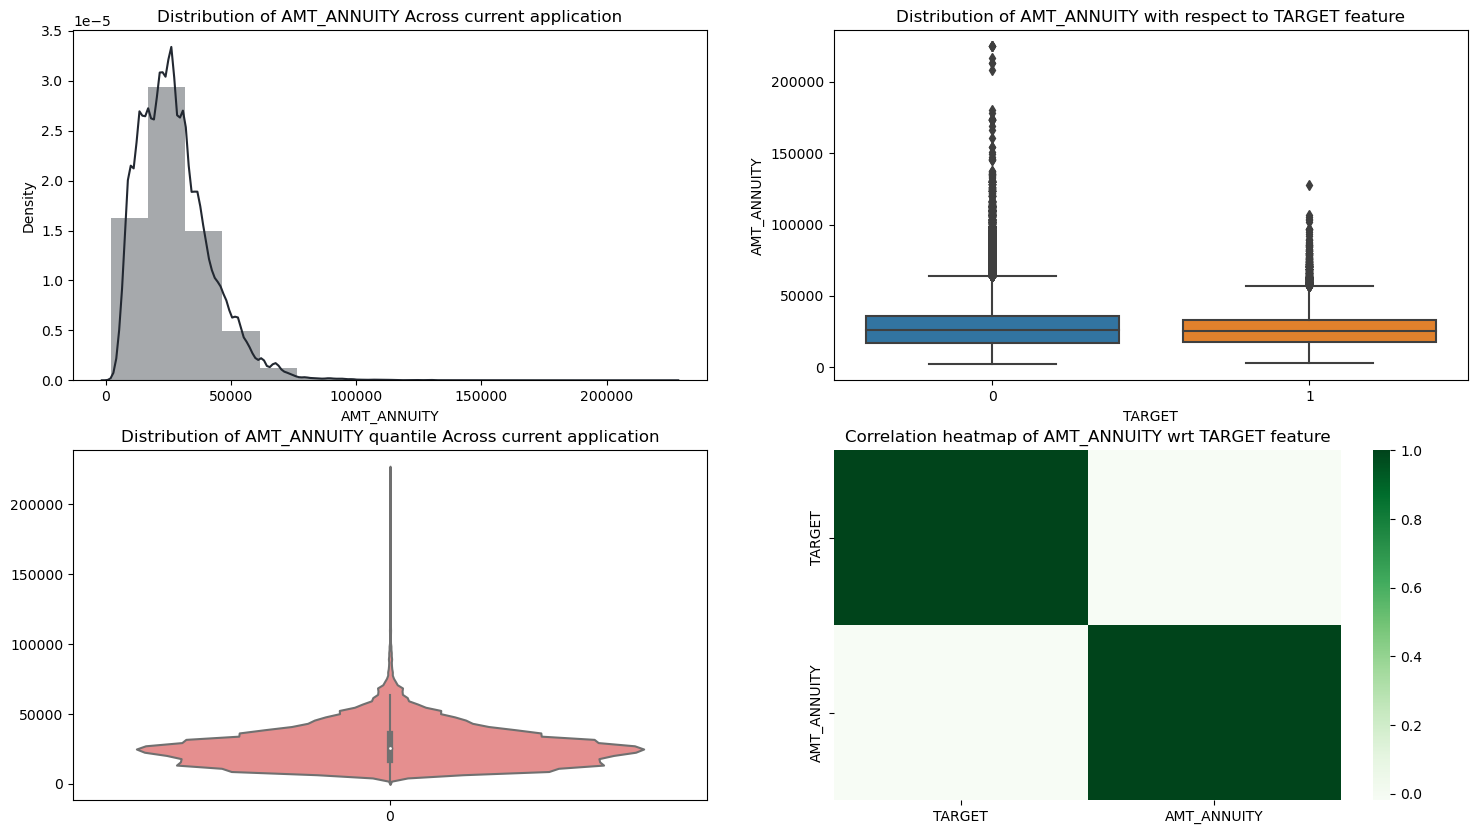

Distribution Based on AMT_REQ_CREDIT_BUREAU_HOUR
Description :  Number of enquiries to Credit Bureau about the client one hour before application 



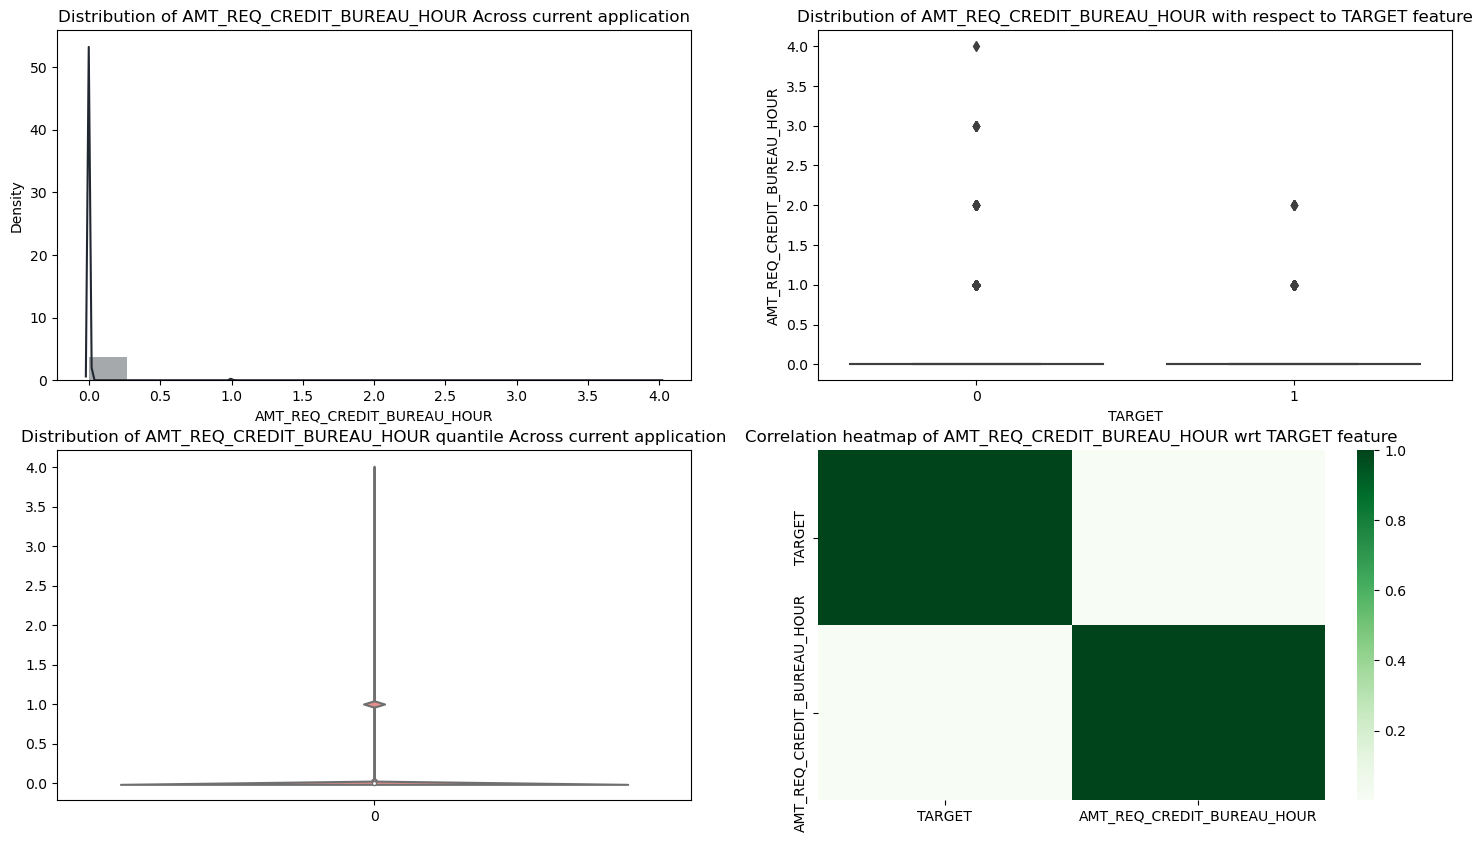

Distribution Based on AMT_REQ_CREDIT_BUREAU_DAY
Description :  Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application) 



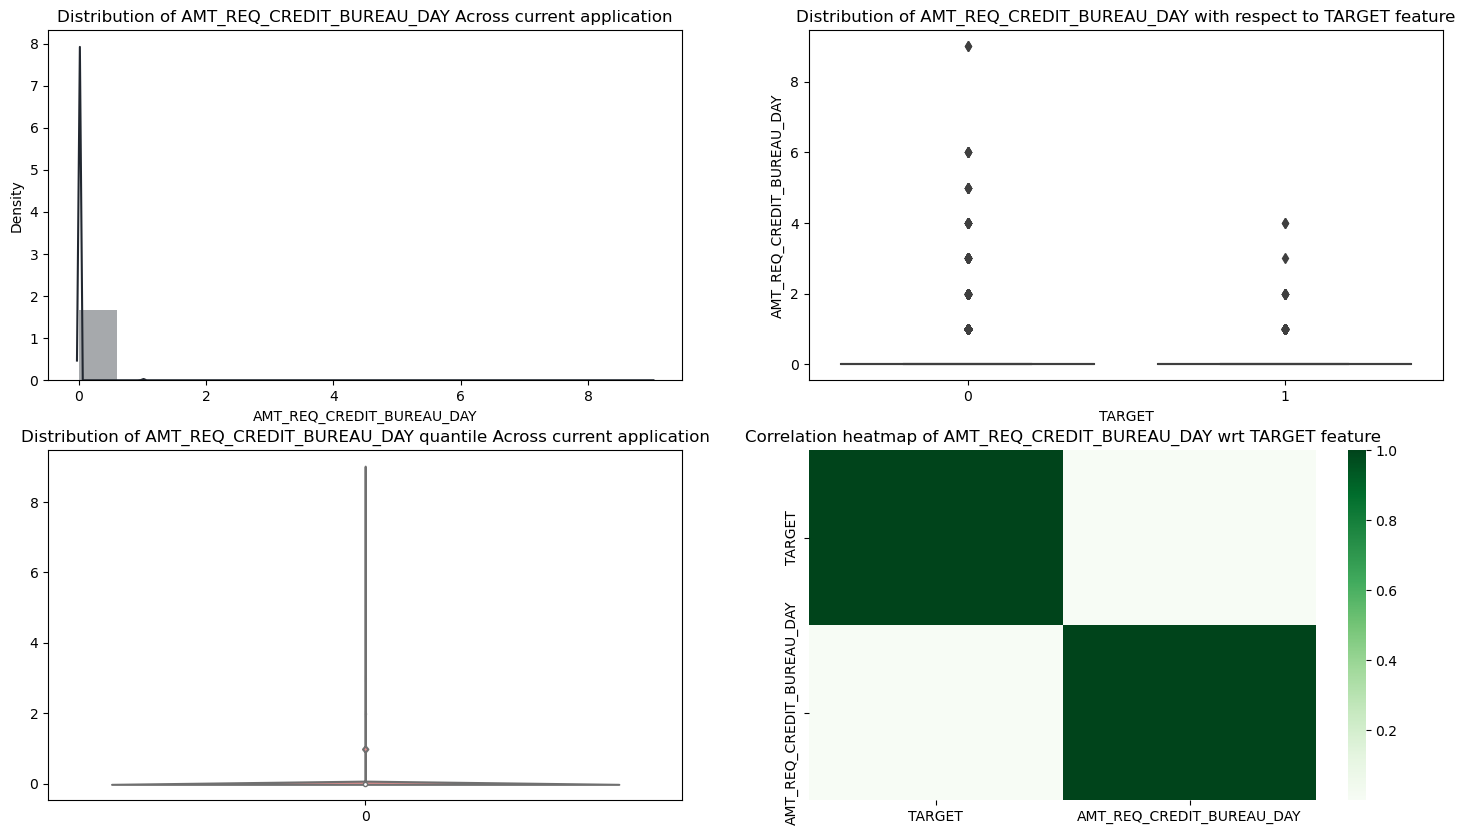

Distribution Based on AMT_REQ_CREDIT_BUREAU_WEEK
Description :  Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application) 



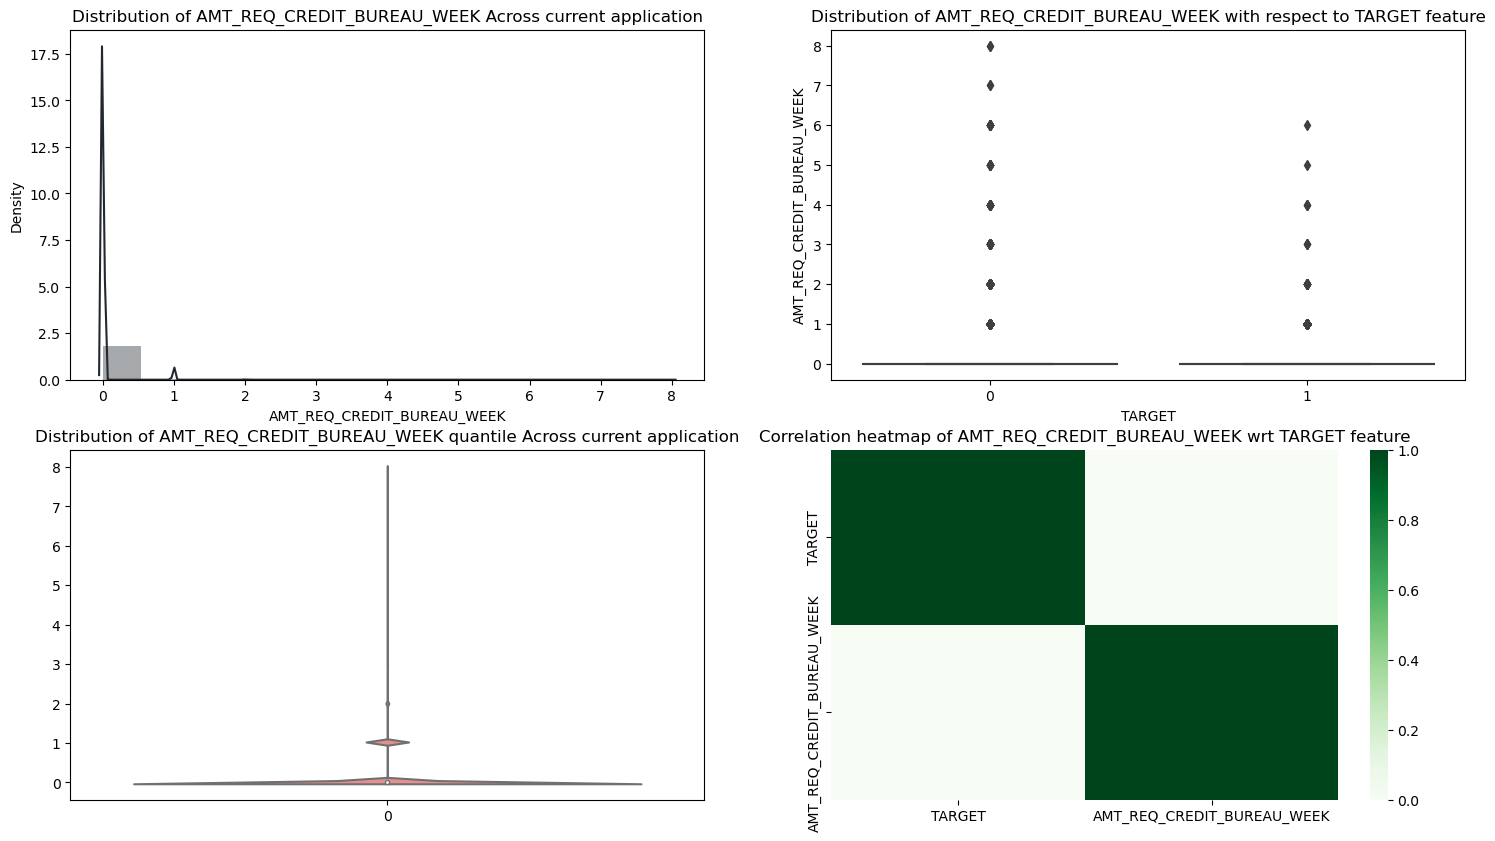

Distribution Based on AMT_REQ_CREDIT_BUREAU_MON
Description :  Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application) 



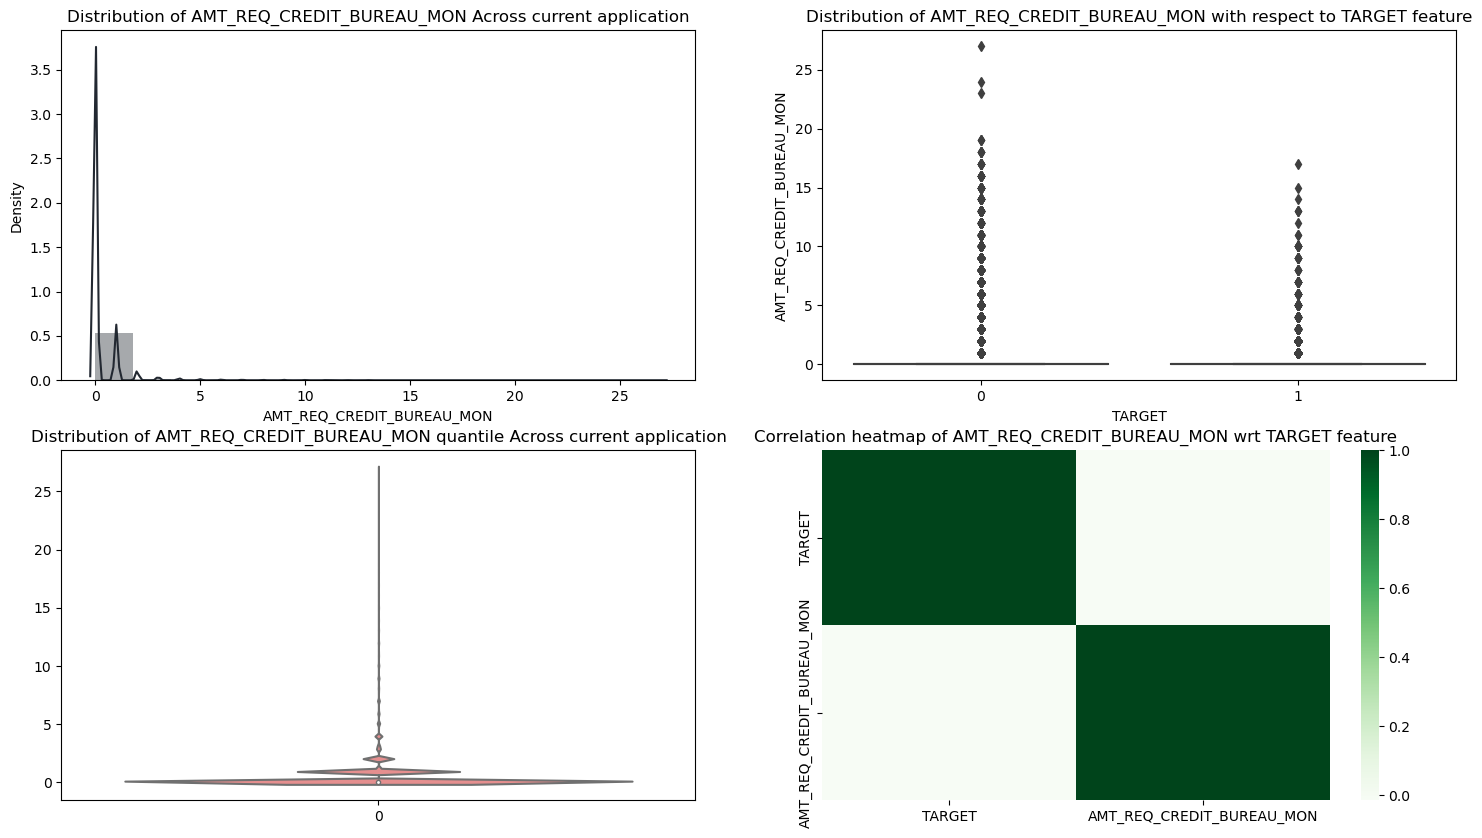

Distribution Based on AMT_REQ_CREDIT_BUREAU_QRT
Description :  Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application) 



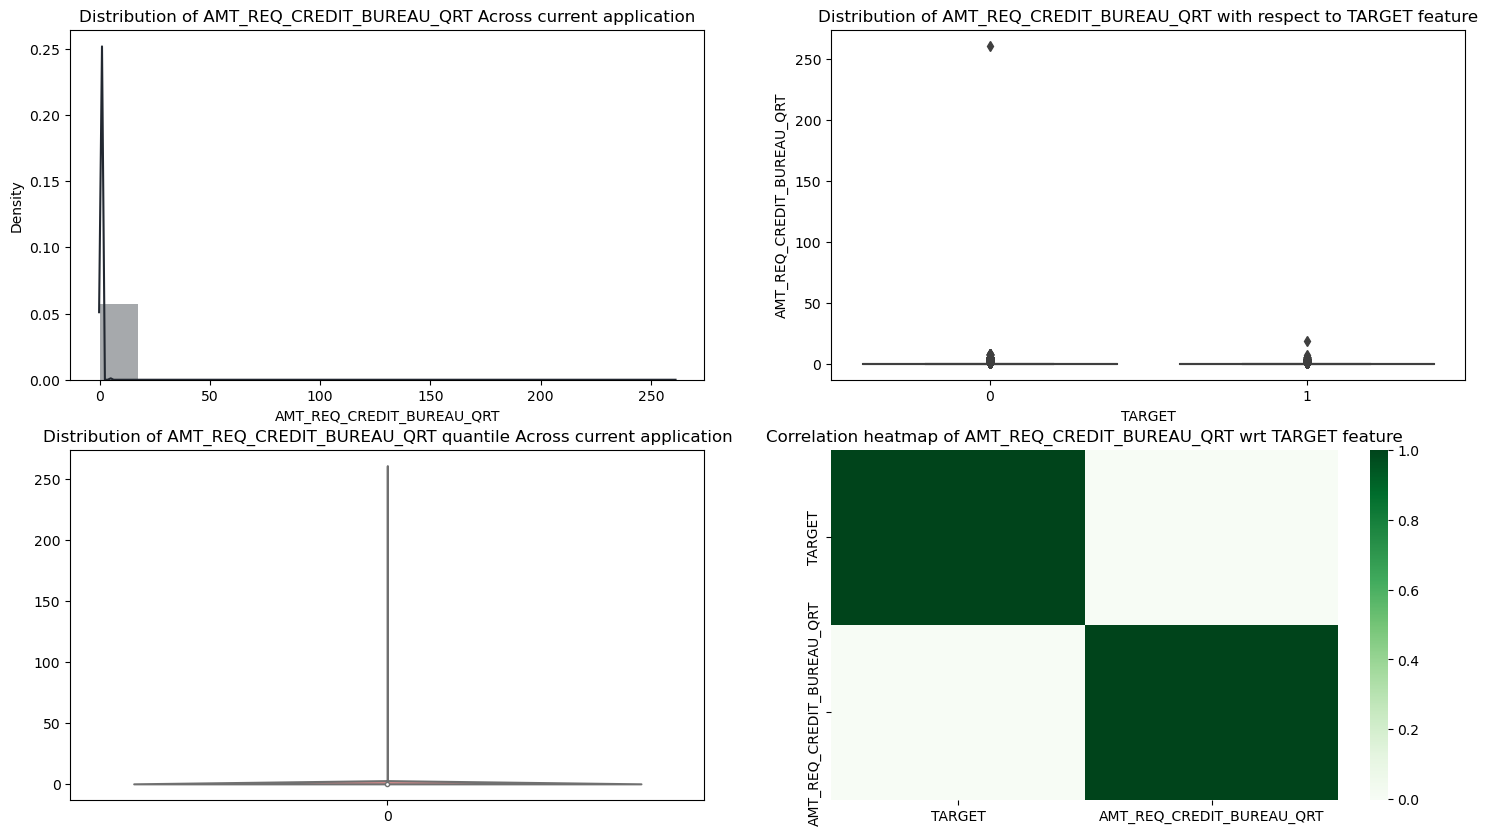

Distribution Based on AMT_REQ_CREDIT_BUREAU_YEAR
Description :  Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application) 



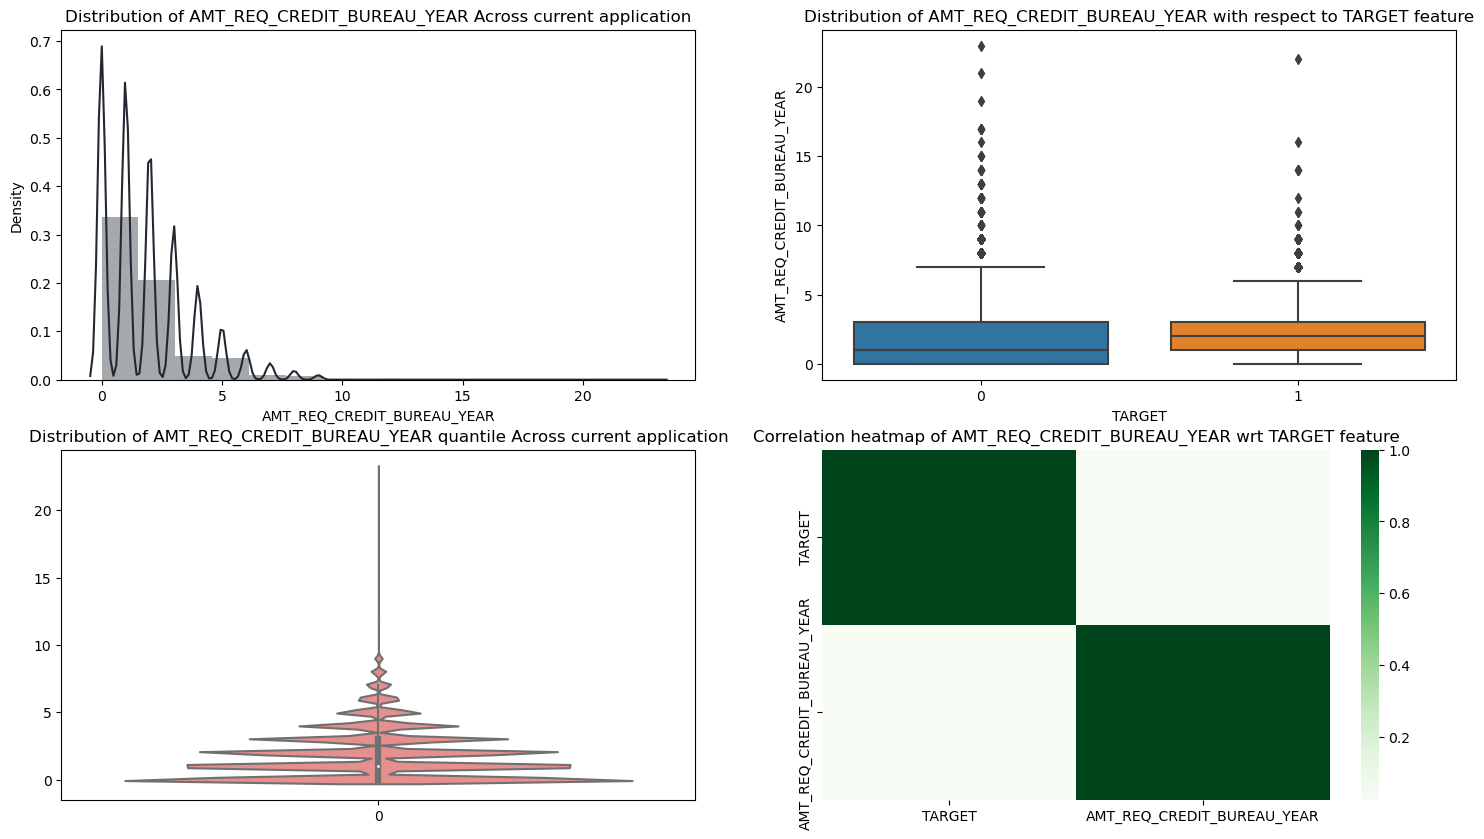

In [24]:
for col in data_amt_cols:
    numericDistributionGraph(col)

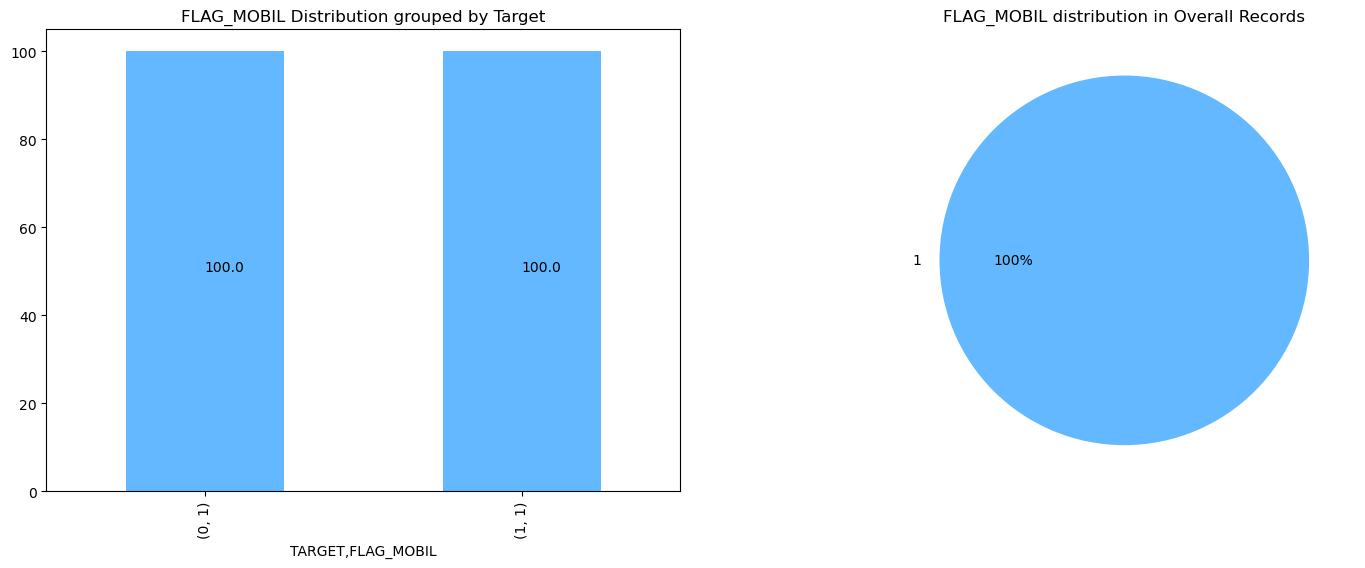

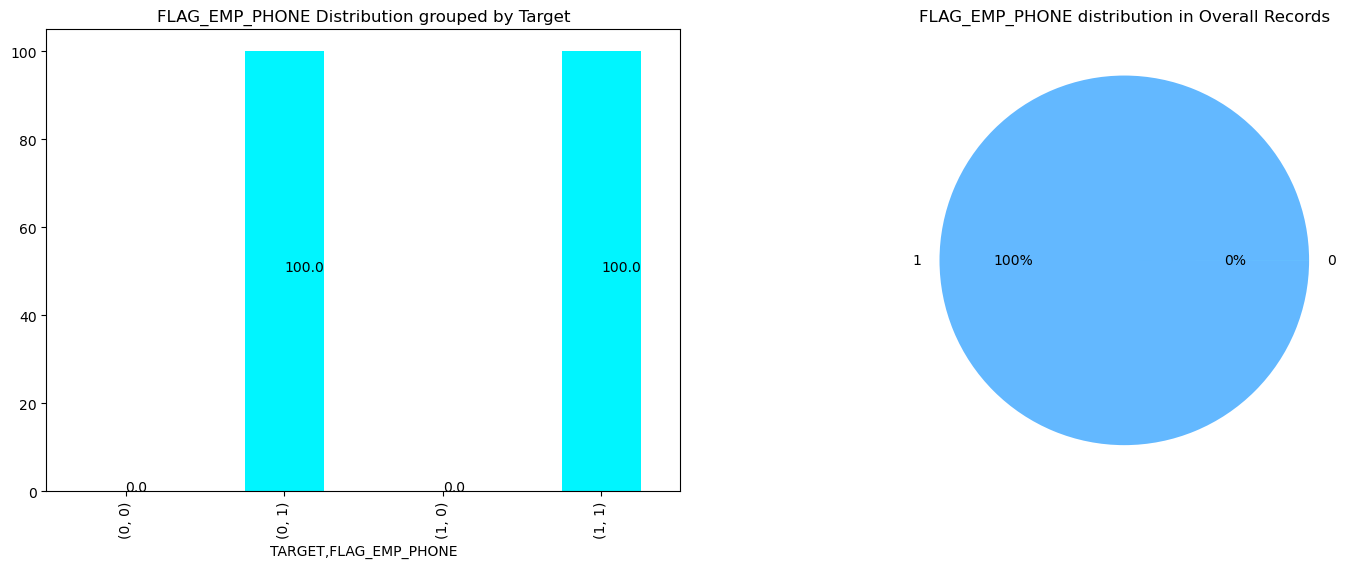

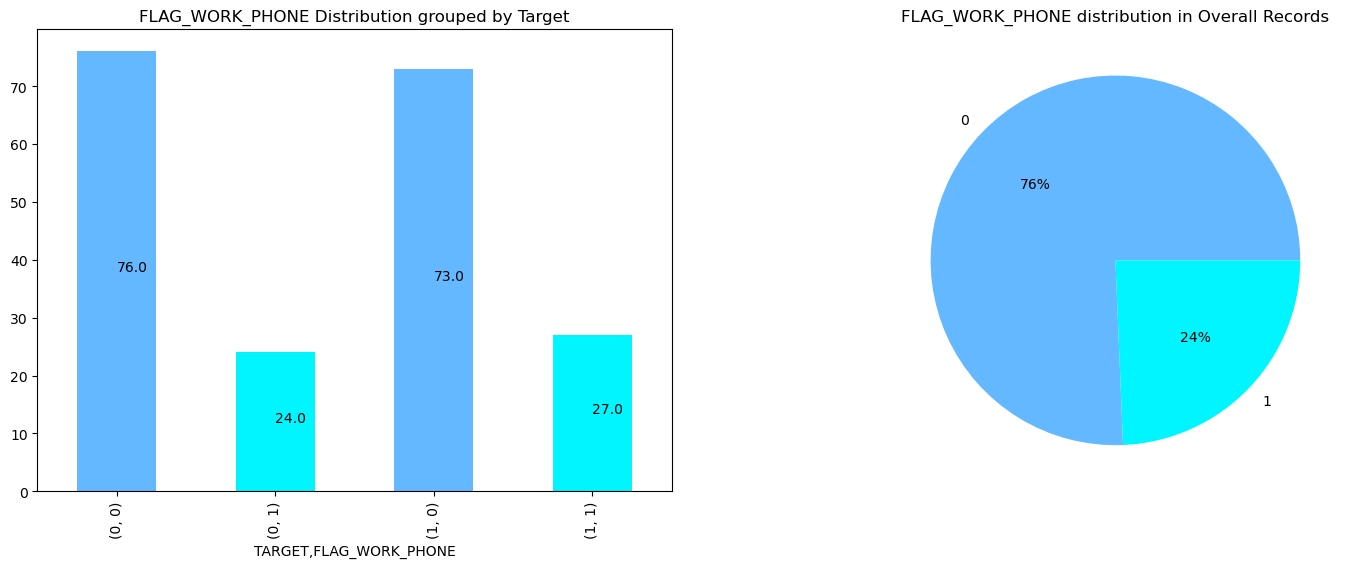

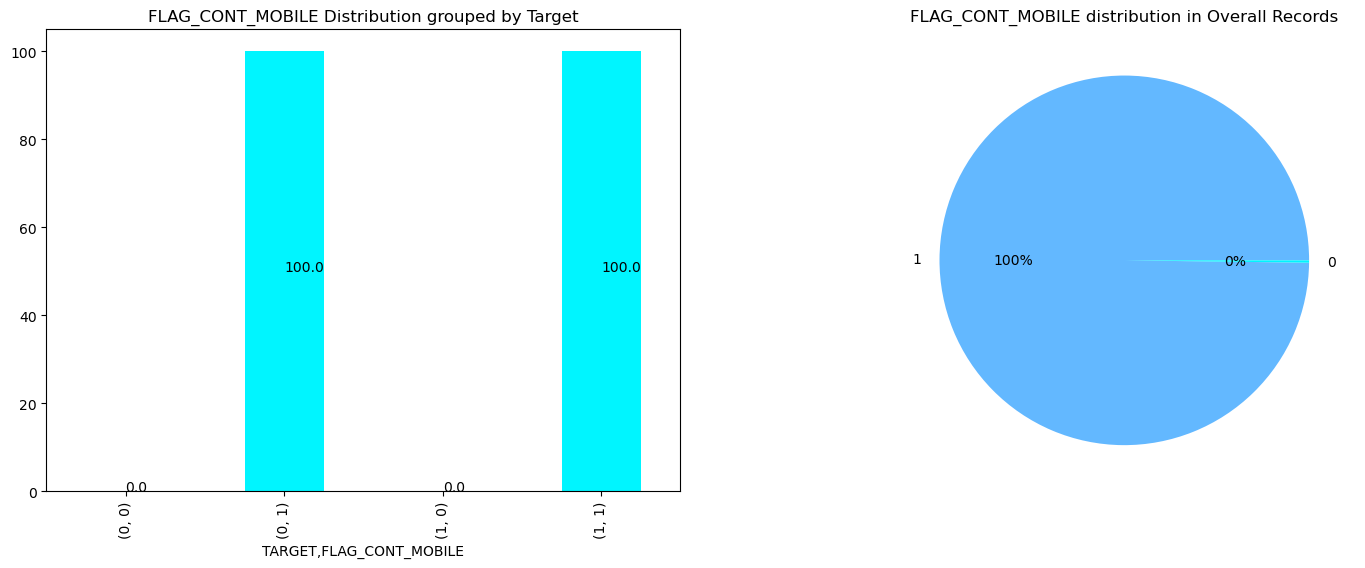

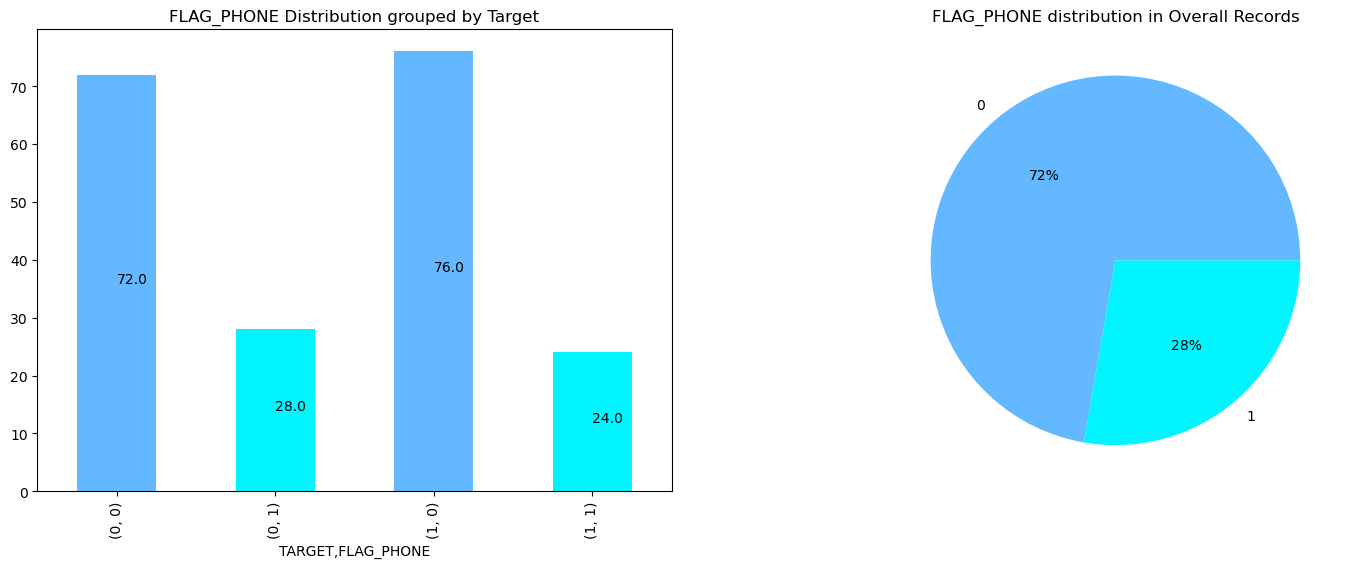

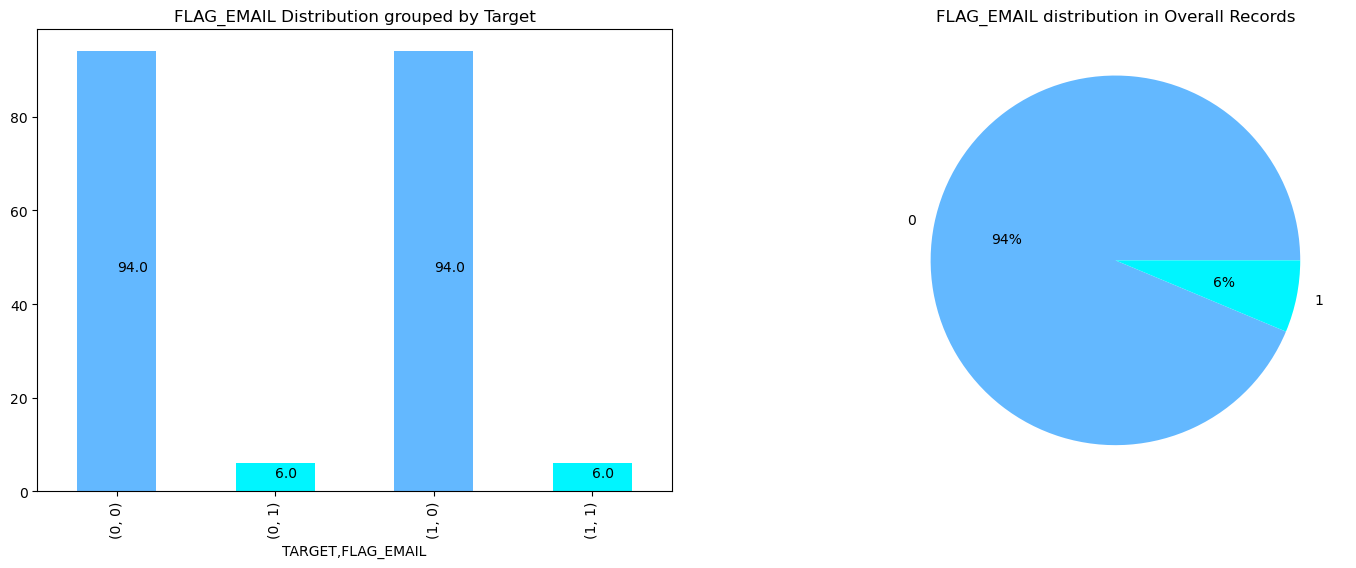

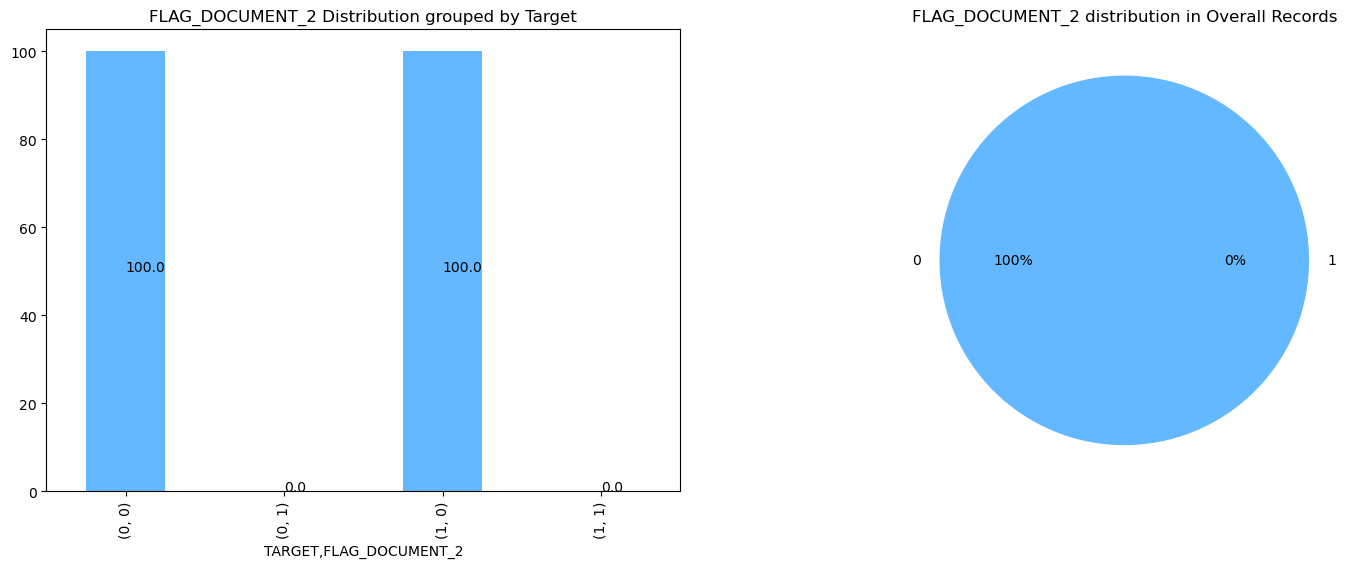

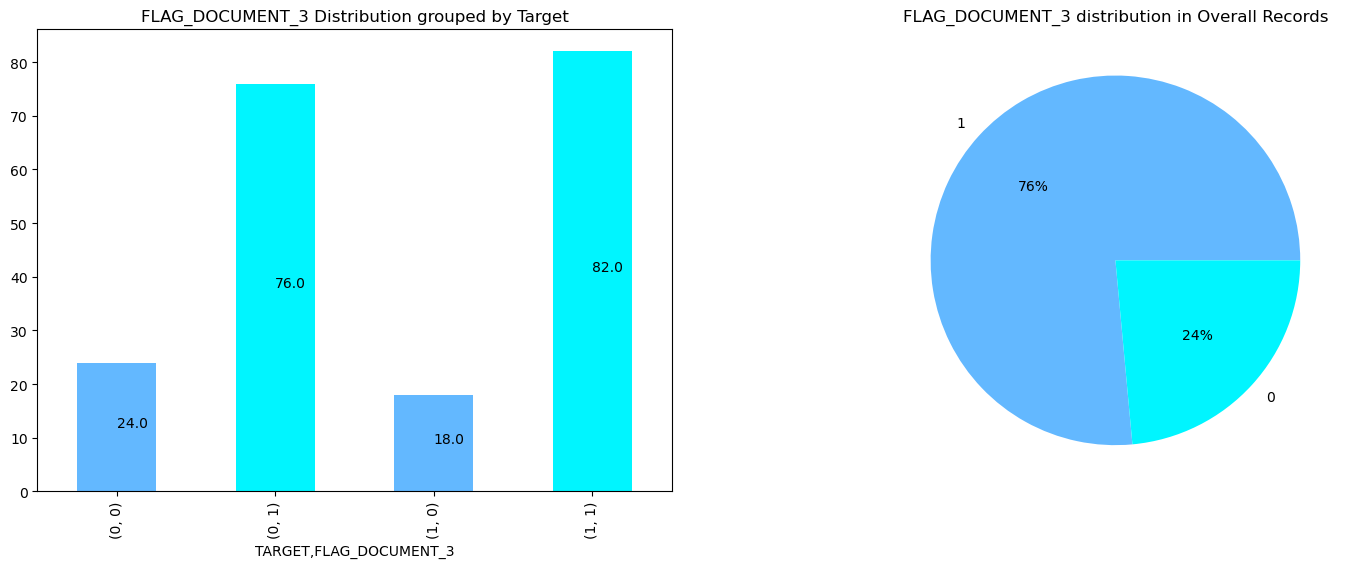

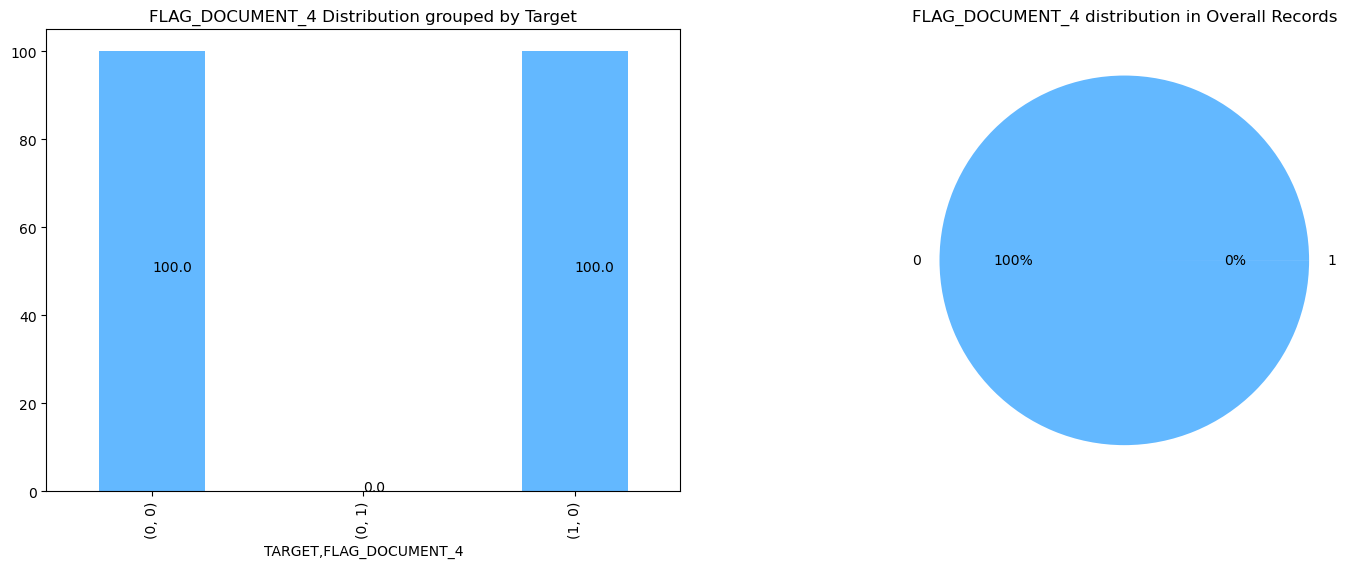

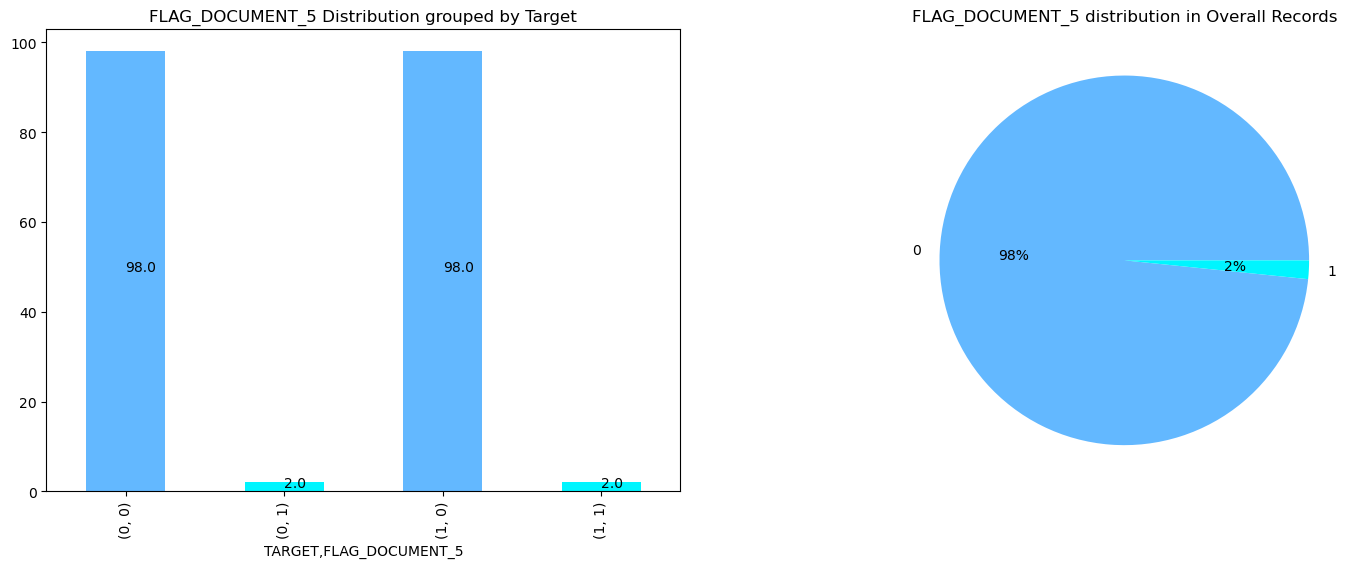

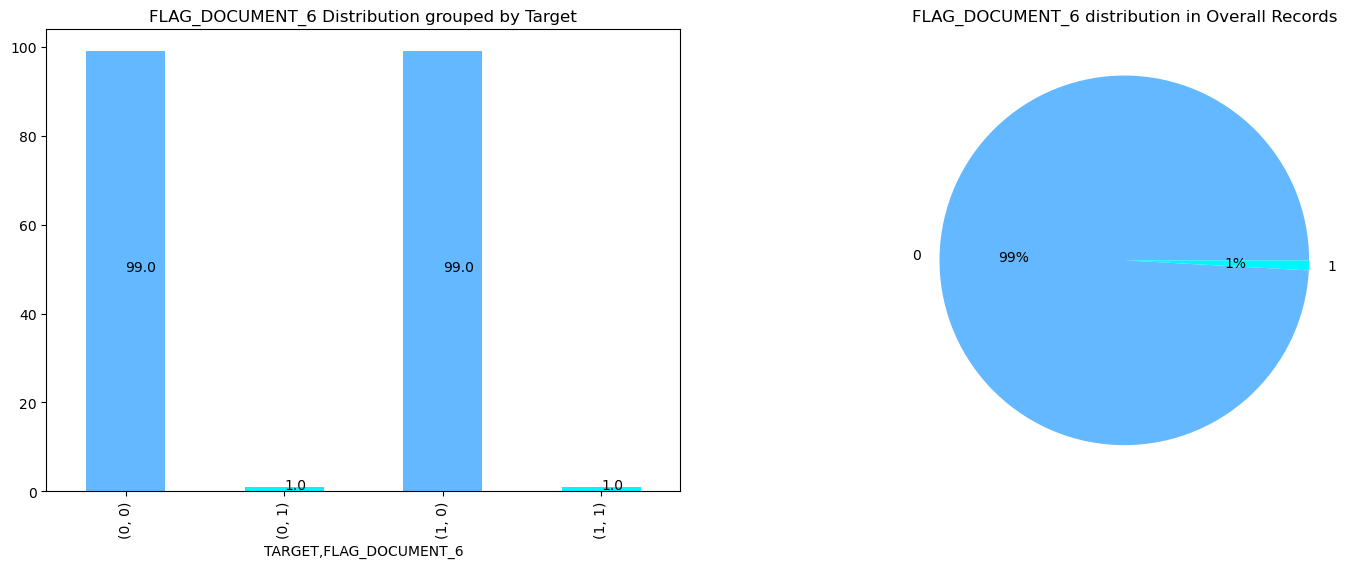

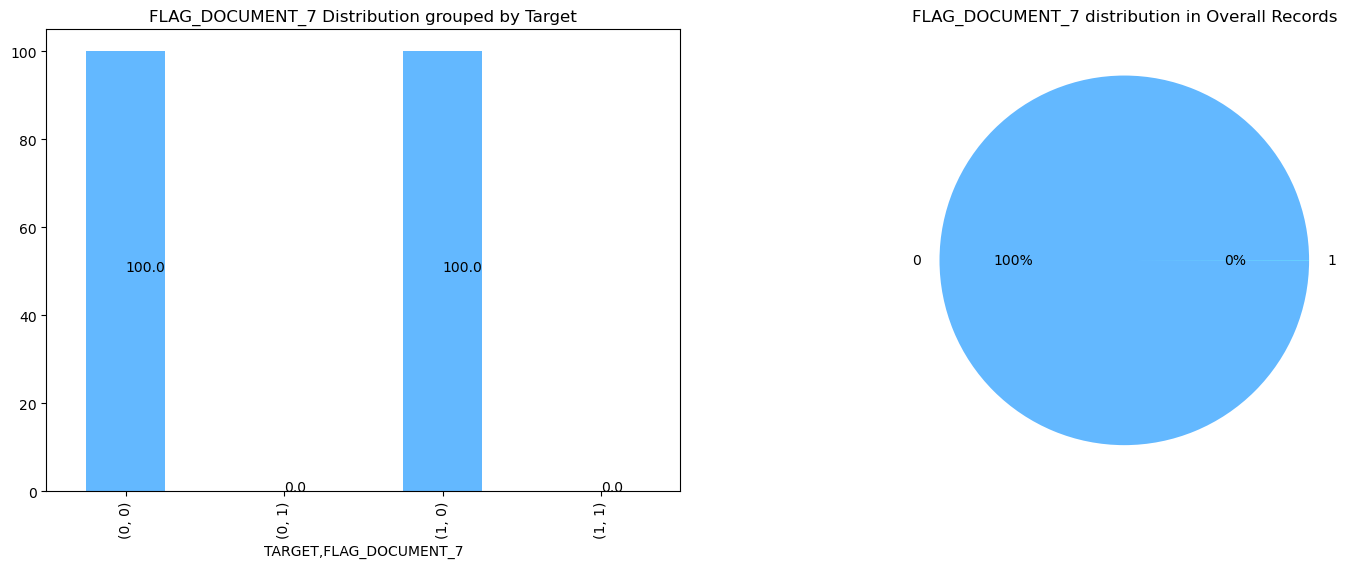

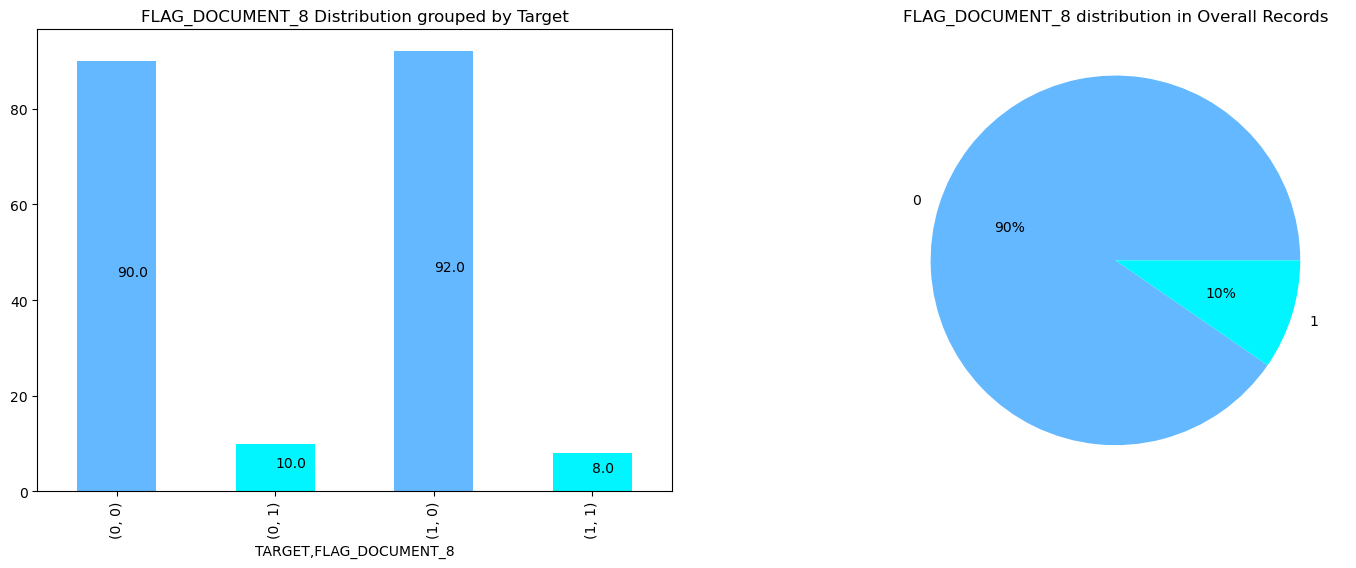

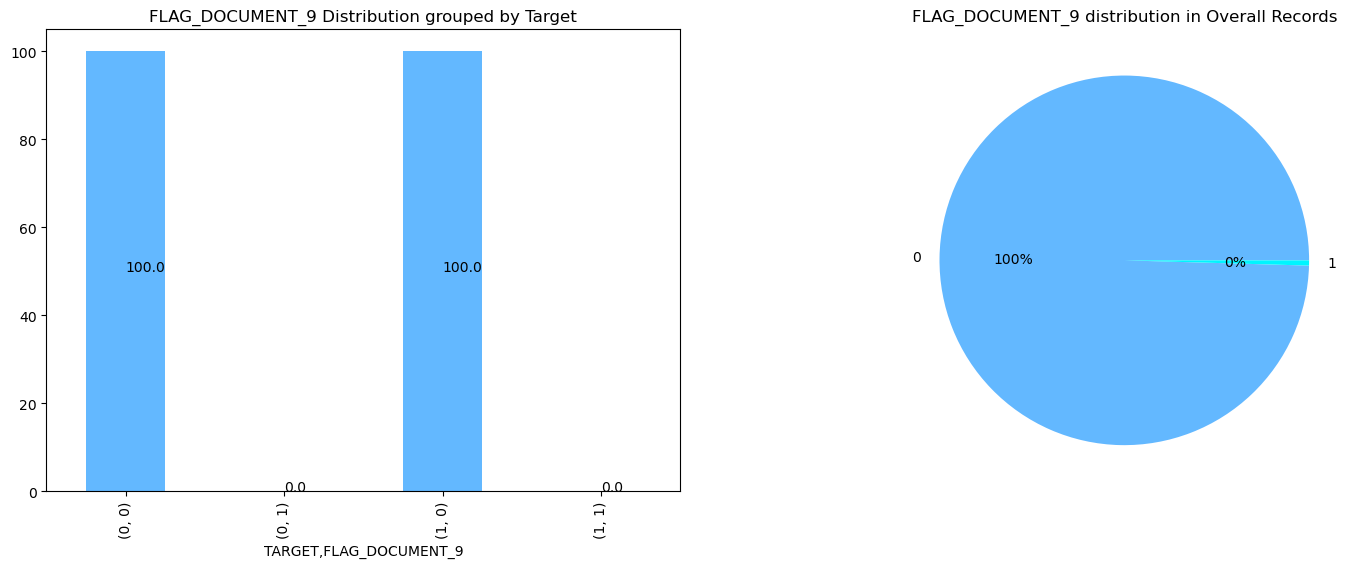

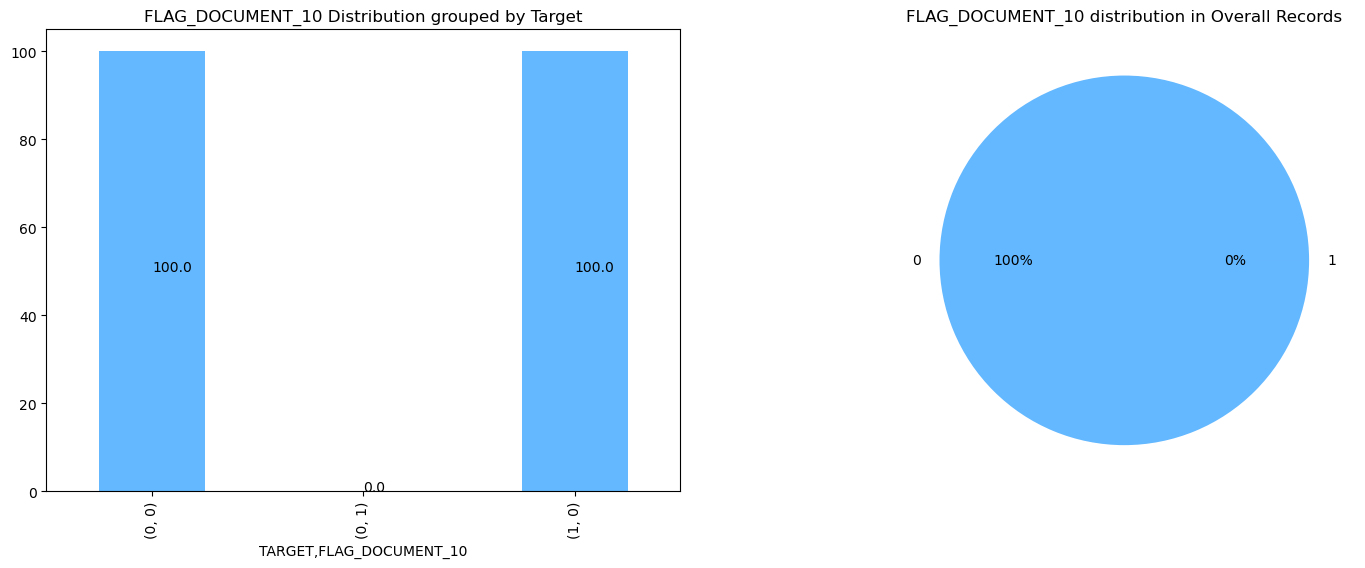

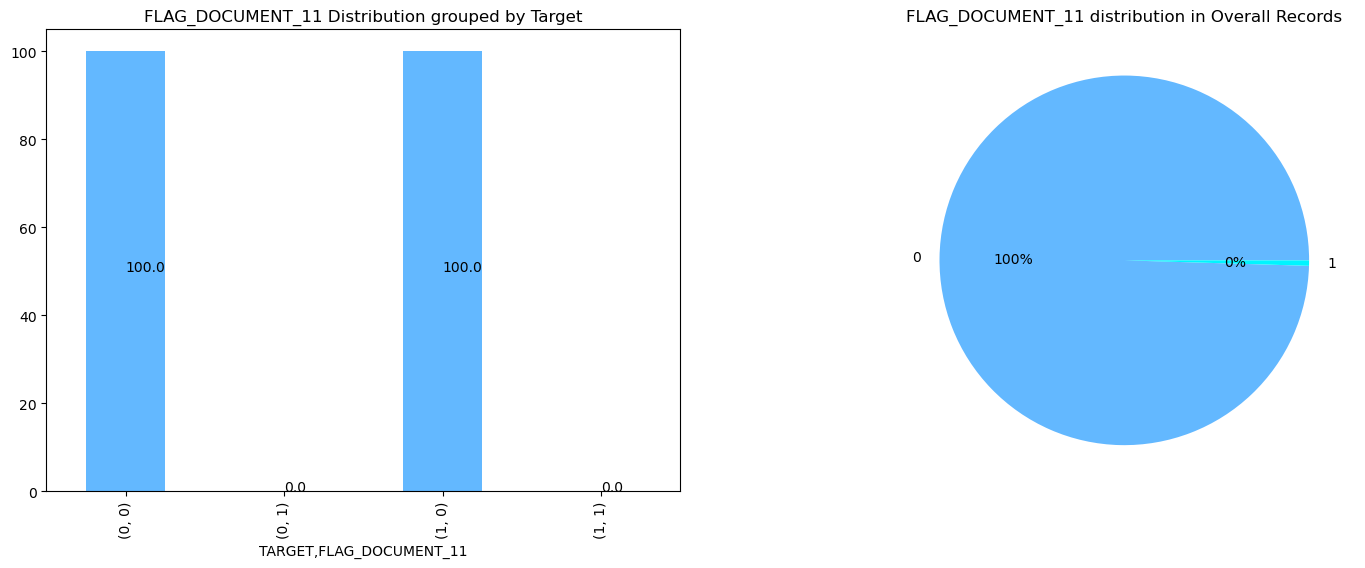

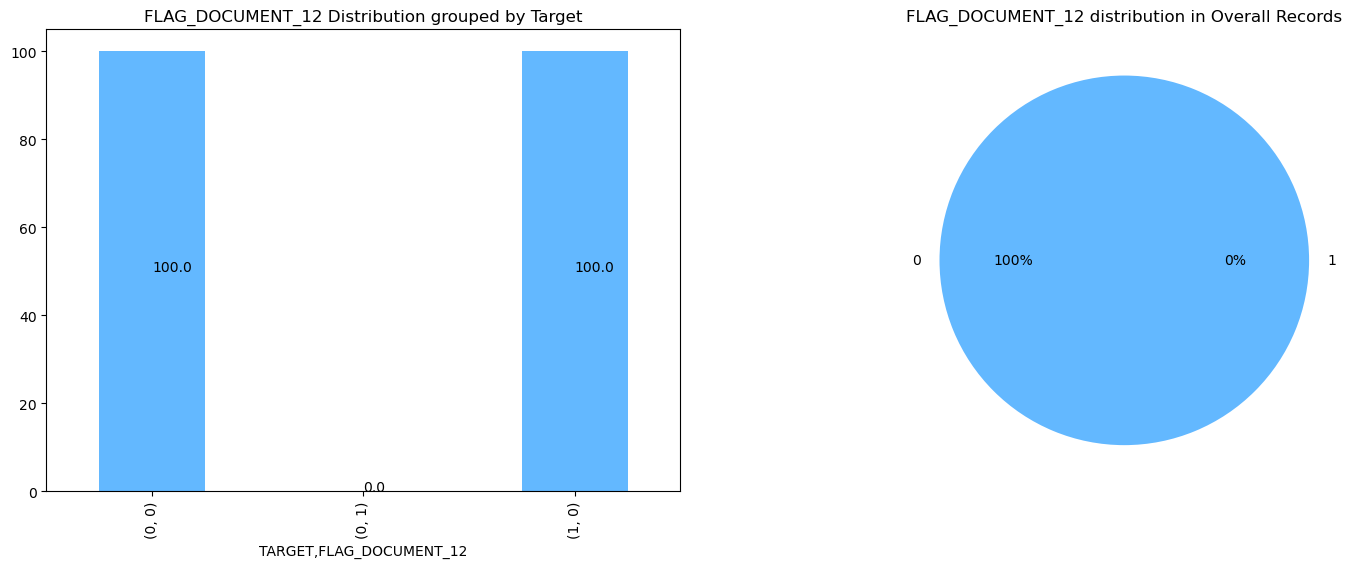

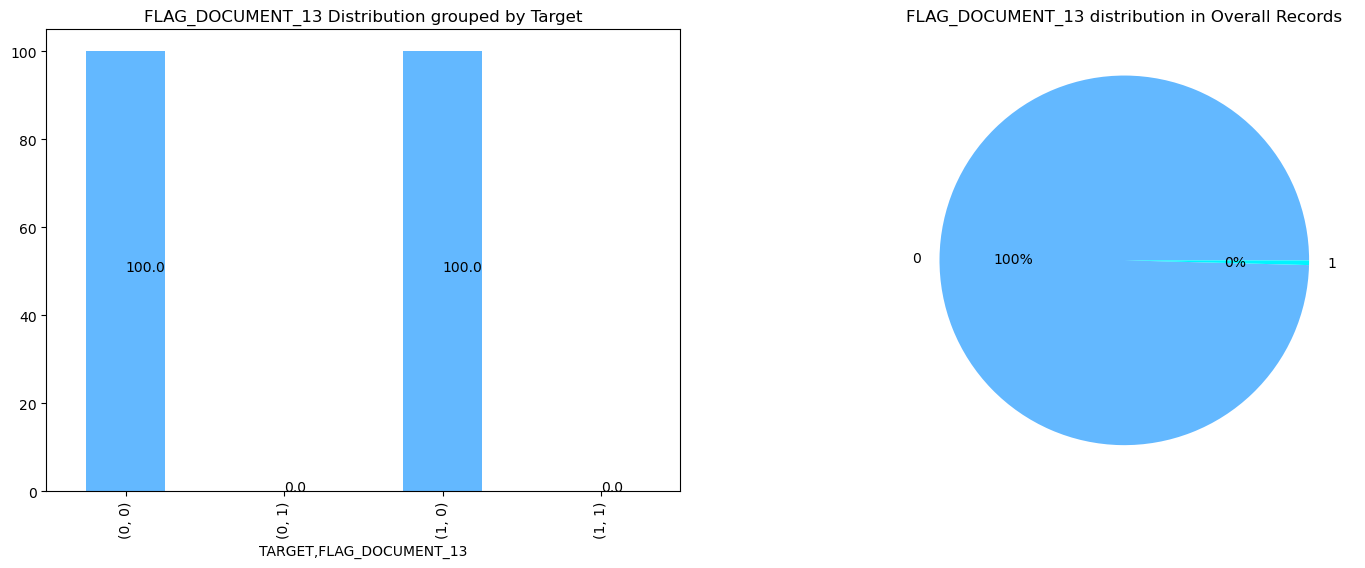

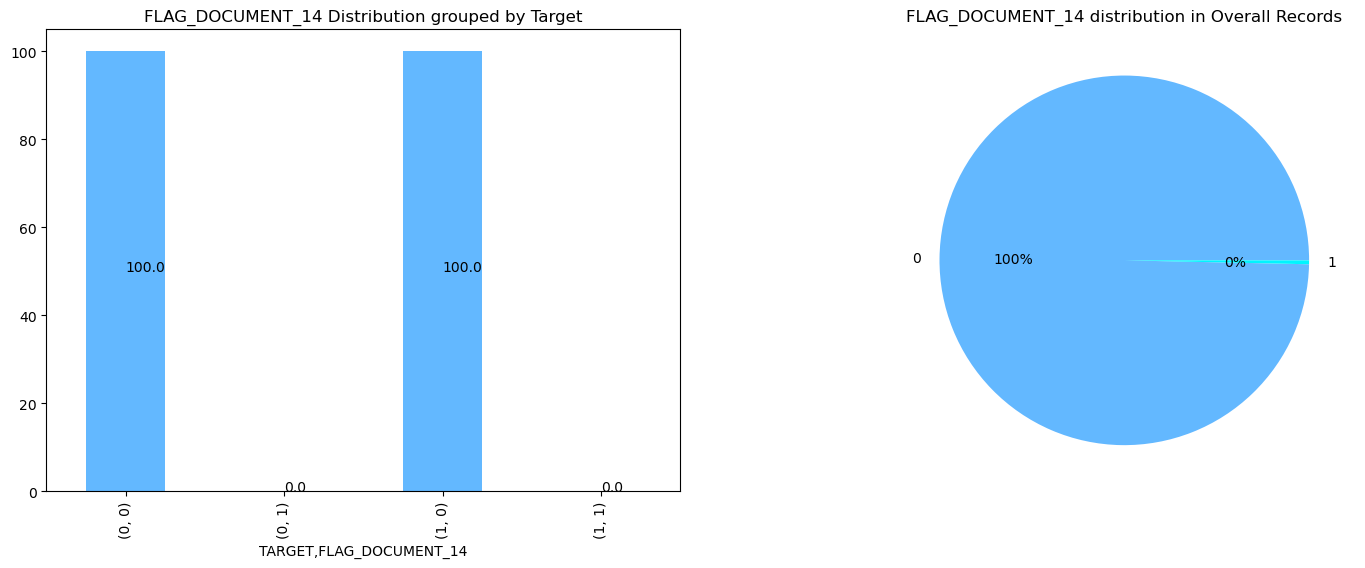

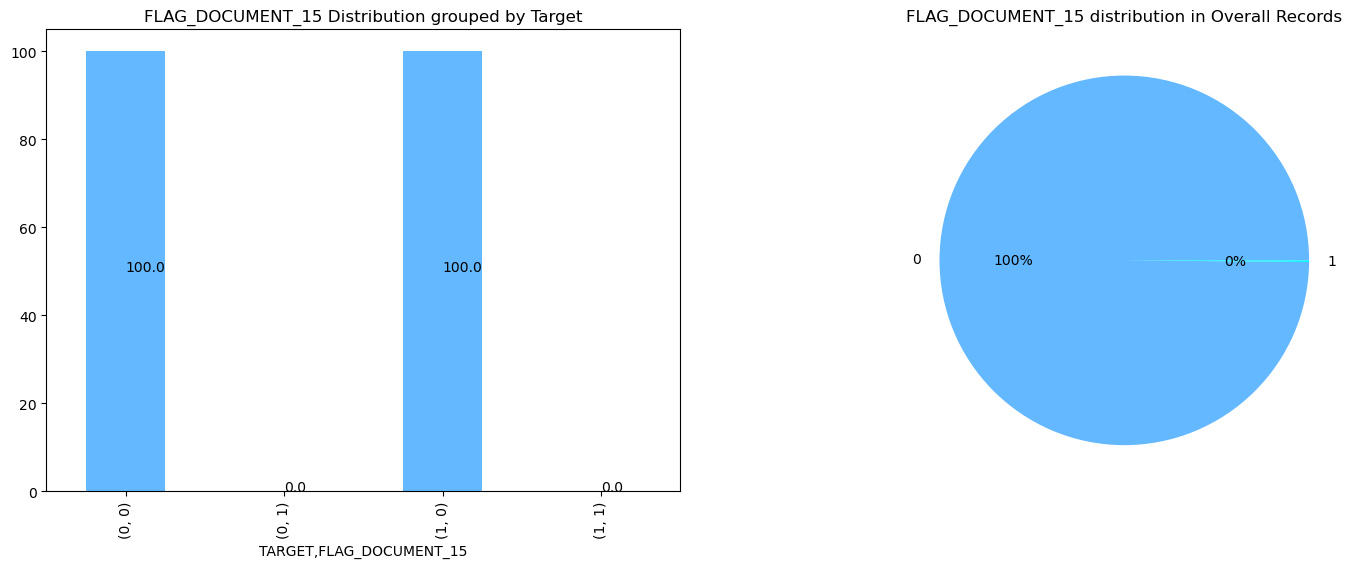

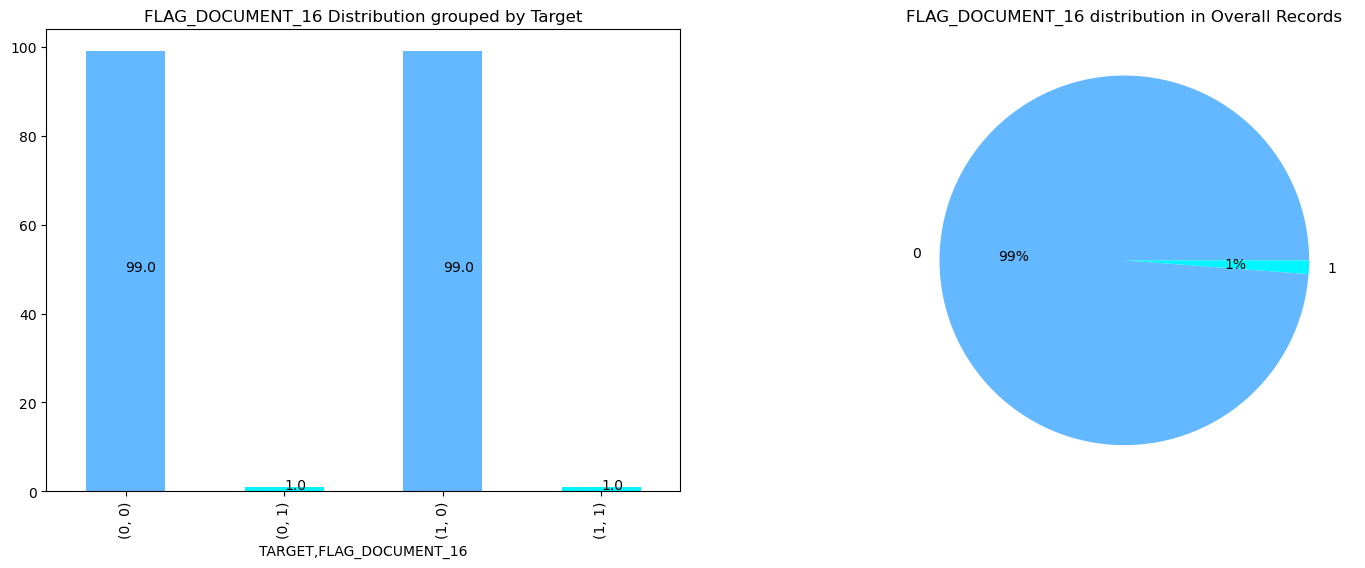

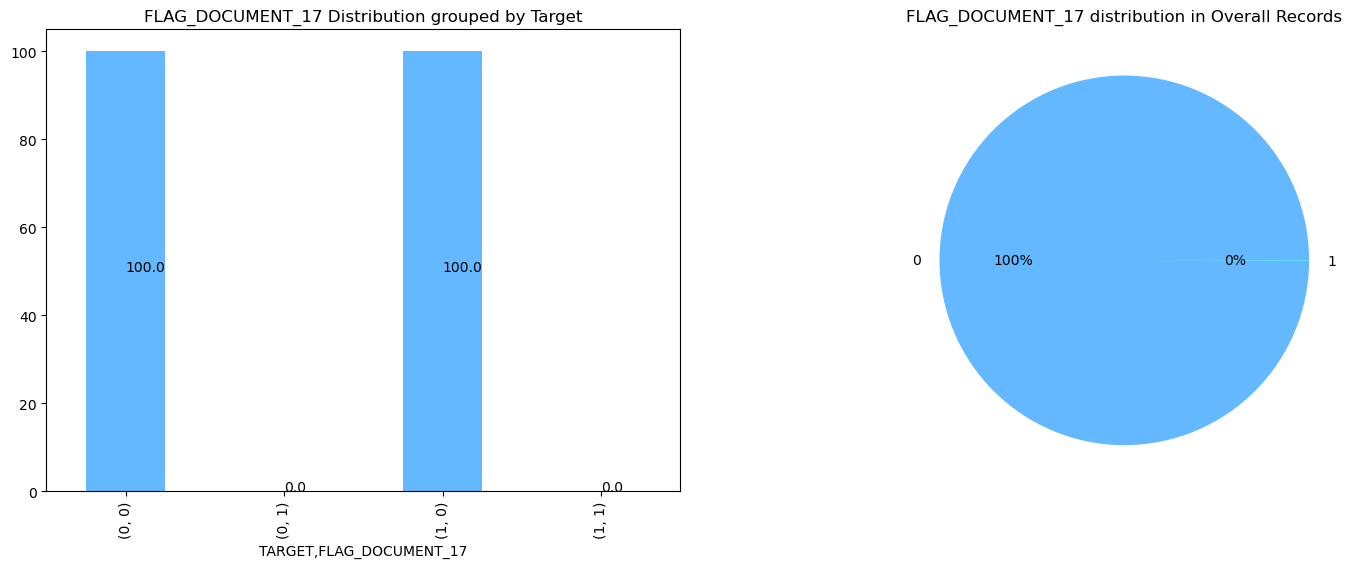

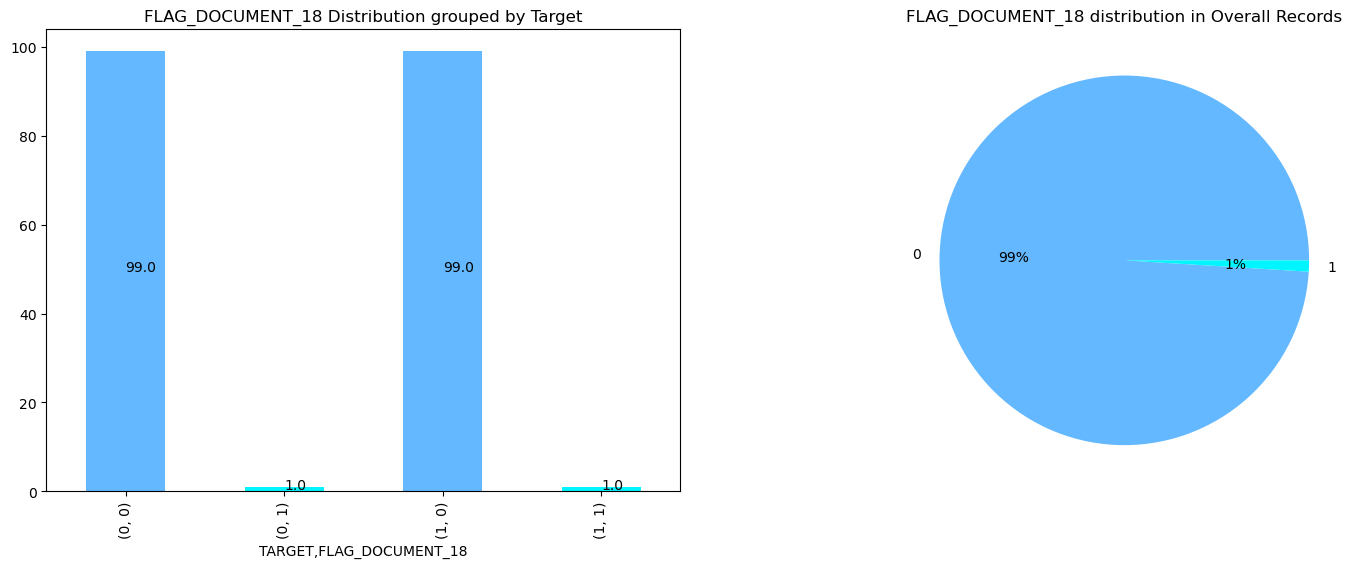

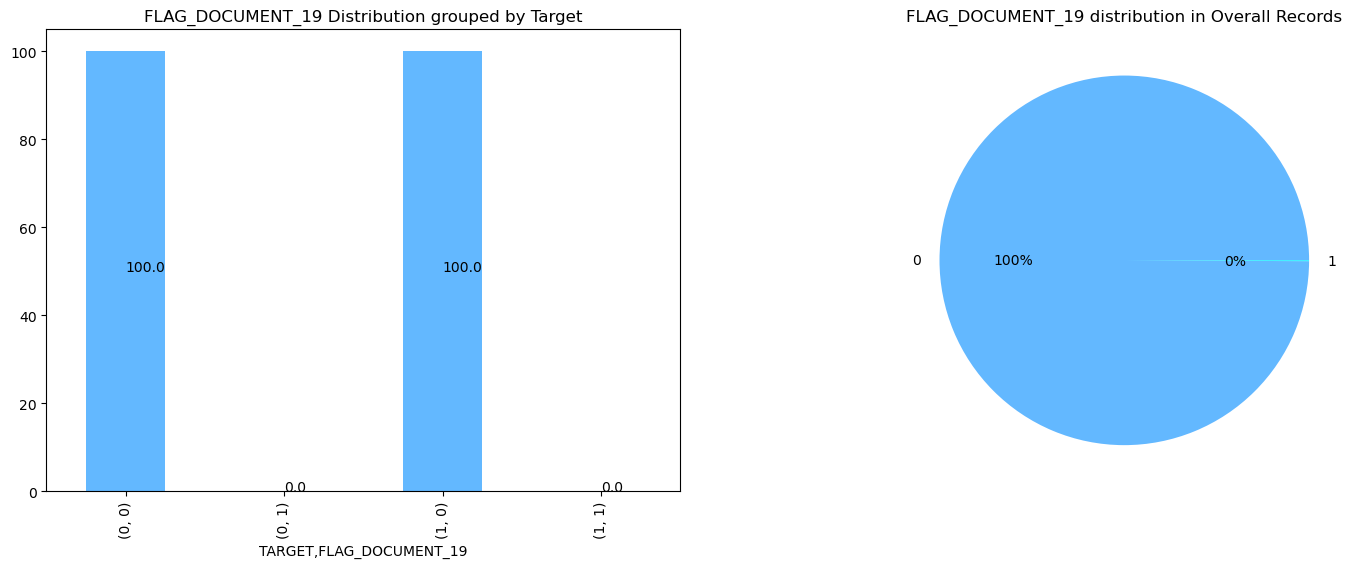

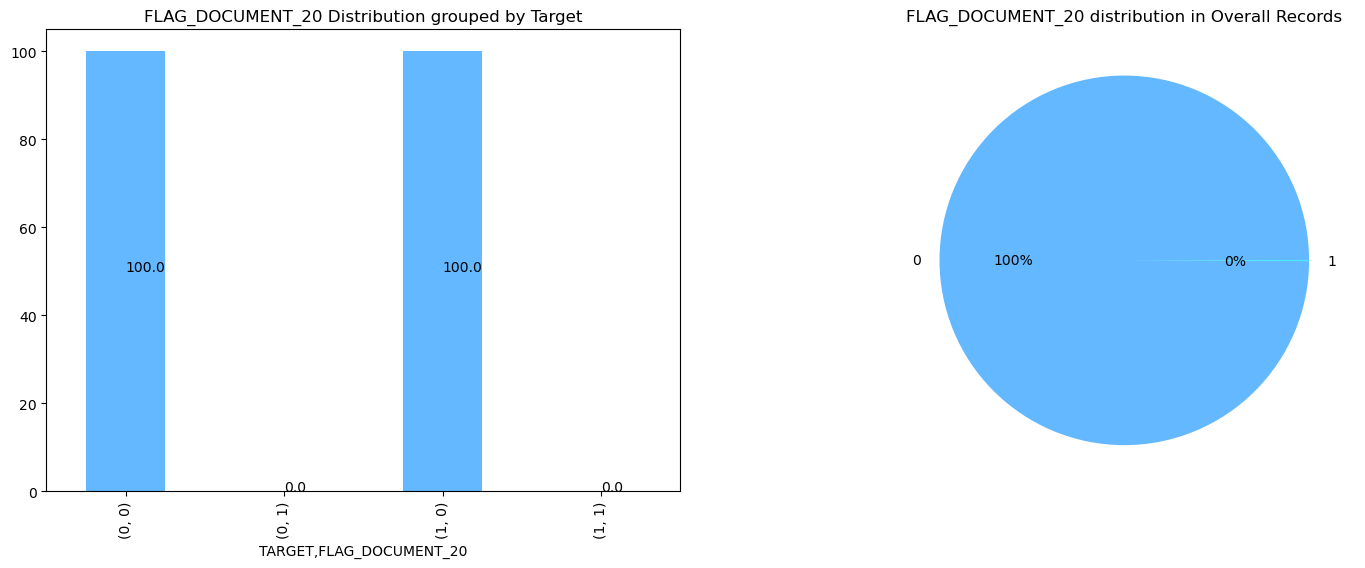

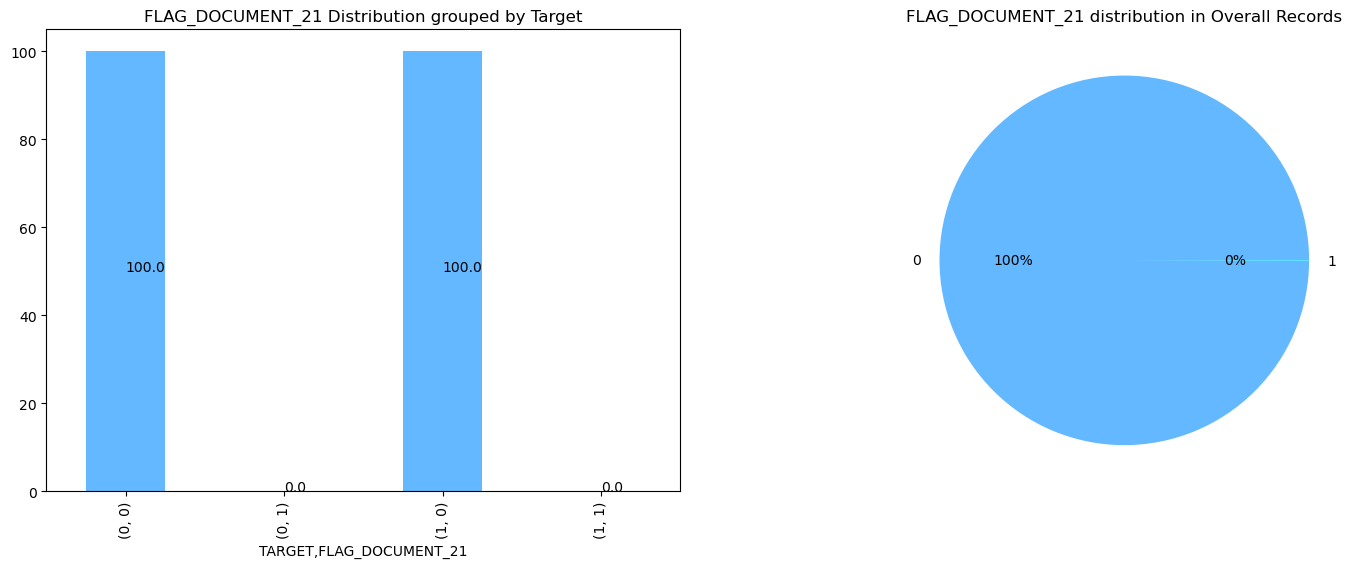

In [25]:
for col in data_flag_cols:
    distributionGraphs(col)

In [26]:
print(previous_data.shape)
previous_data.tail()

(1621741, 17)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  \
1670208     1556789      209732         Cash loans           315.00   
1670209     2300464      352015     Consumer loans           267.30   
1670211     2659632      249544     Consumer loans           105.24   
1670212     2785582      400317         Cash loans           180.00   
1670213     2418762      261212         Cash loans           360.00   

         AMT_CREDIT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1670208      436.22                   THURSDAY                       17   
1670209      311.40                  WEDNESDAY                       12   
1670211      102.52                     MONDAY                       12   
1670212      191.88                  WEDNESDAY                        9   
1670213      360.00                     SUNDAY                       10   

         NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
1670208                       1             Approved           1279   
1670209                       1             Approved            544   
1670211                       1             Approved           1488   
1670212                       1             Approved           1185   
1670213                       1             Approved           1193   

             NAME_PAYMENT_TYPE NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
1670208  Cash through the bank        Refreshed                   XNA   
1670209  Cash through the bank        Refreshed             Furniture   
1670211  Cash through the bank         Repeater  Consumer Electronics   
1670212  Cash through the bank         Repeater                   XNA   
1670213  Cash through the bank         Repeater                   XNA   

        NAME_PORTFOLIO             CHANNEL_TYPE  NAME_SELLER_INDUSTRY  \
1670208           Cash  Credit and cash offices                   XNA   
1670209            POS                    Stone             Furniture   
1670211            POS             Country-wide  Consumer electronics   
1670212           Cash          AP+ (Cash loan)                   XNA   
1670213           Cash          AP+ (Cash loan)                   XNA   

        NAME_YIELD_GROUP  
1670208           middle  
1670209              low  
1670211              low  
1670212              low  
1670213           middle

In [27]:
# Let's get the Target variable to previous application to see if we can find any relationship
previous_data = pd.merge(current_data[['TARGET','SK_ID_CURR']], previous_data, on='SK_ID_CURR')

In [28]:
# Seperating Numeric and Object columns names
def separate_columns(dataframe):
    prev_data_numeric_cols = dataframe.select_dtypes(include='number').columns
    prev_data_obj_cols = dataframe.select_dtypes(include='object').columns

    return prev_data_numeric_cols, prev_data_obj_cols

# Assuming you have a dataframe called 'df'
prev_data_numeric_cols, prev_data_obj_cols = separate_columns(previous_data)

print("Numeric Columns:")
print(len(prev_data_numeric_cols))

print("\nObject Columns:")
print(len(prev_data_obj_cols))

Numeric Columns:
8

Object Columns:
10


In [29]:
# Let's create a function to explore various features and how these are distributed for object columns

def distributionGraphsPrev(x):
    #Create a normalized value count converted to percentage
    target_group = round(previous_data.groupby('TARGET')[x].value_counts(normalize=True,sort=False)*100)
    cnt = int((target_group.count()/2))
    
    all_colr = ['#63B8FF','#00F5FF','#00CCCC','#FFC300','#66CC66','#FF5733']
    colors = all_colr[:cnt]
    plt.figure(figsize=(18,6))
    
    plt.subplot(121)
    plt.title(str(x)+' Distribution grouped by Target')
    ax = target_group.plot(kind='bar',color=colors)
    
    # A method to print values in Bar
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + bar.get_height()/2, str(bar.get_height()))
    plt.subplot(122)
    plt.title(str(x)+' distribution in Overall Records')
    (previous_data[x].value_counts(normalize=True)*100).plot(kind='pie', autopct = "%1.0f%%", colors=colors)
   
    plt.show()

    print("\n\n")

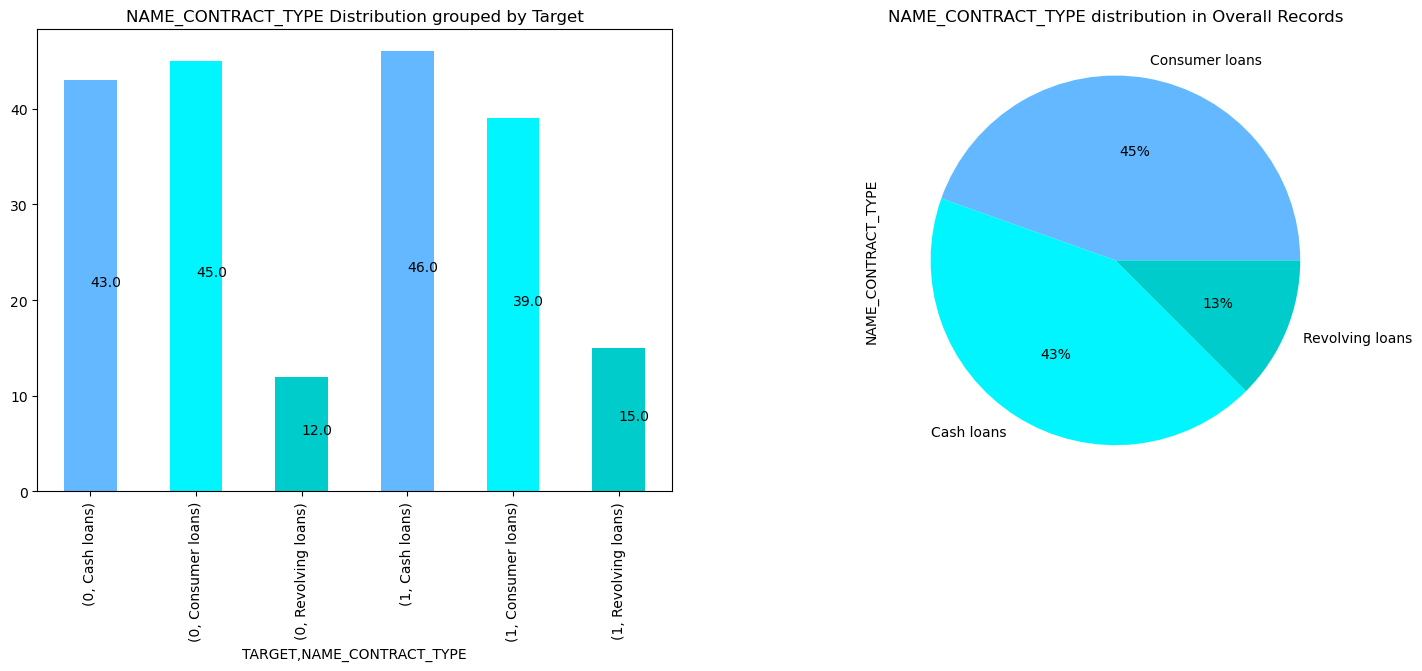

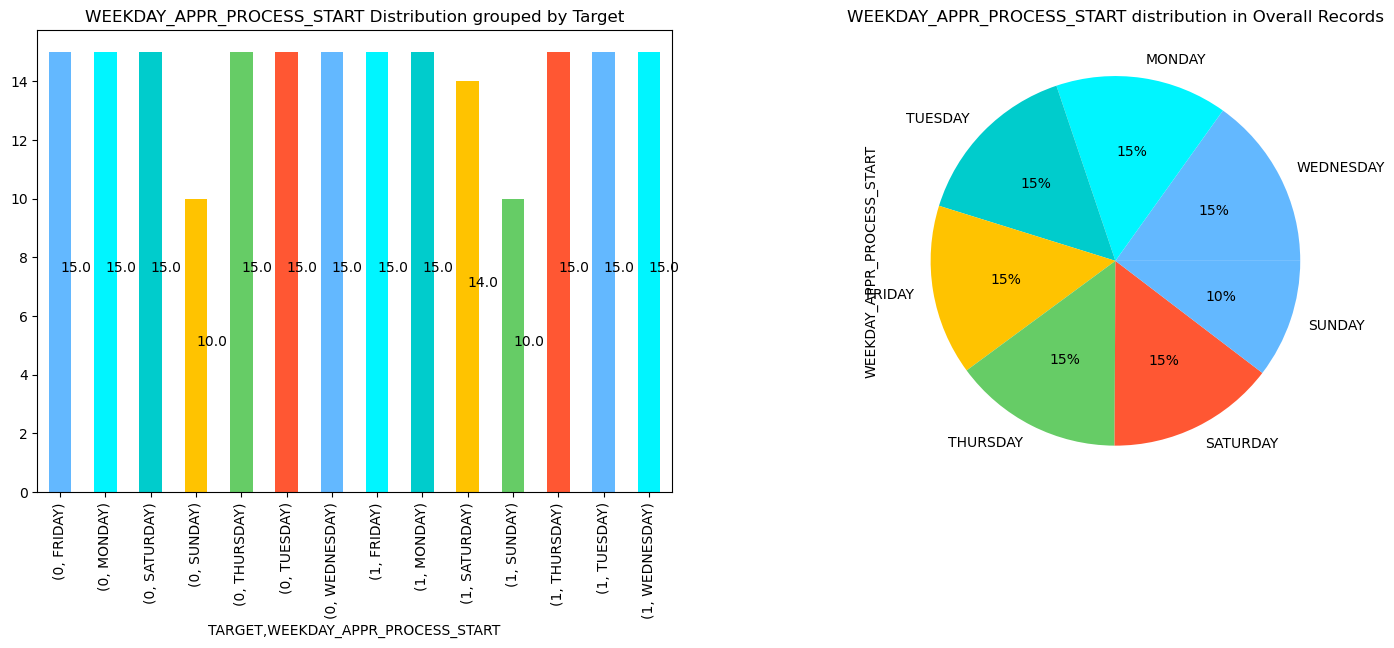

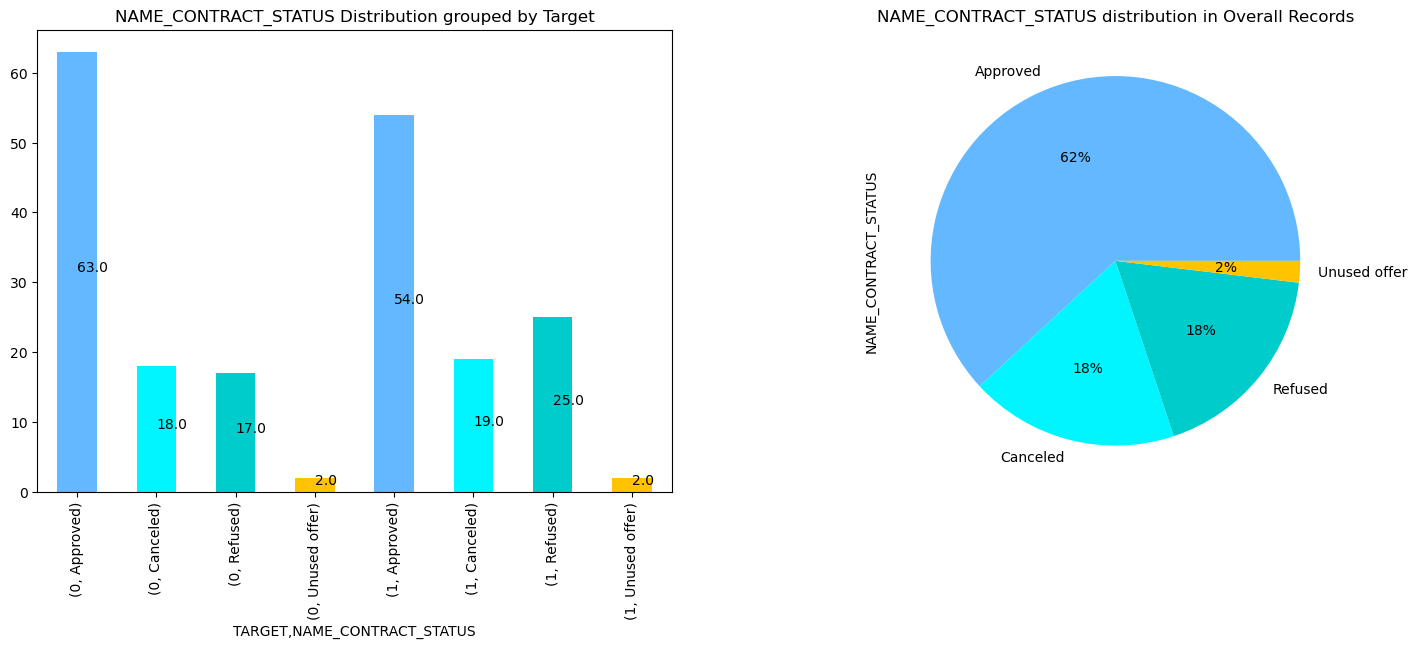

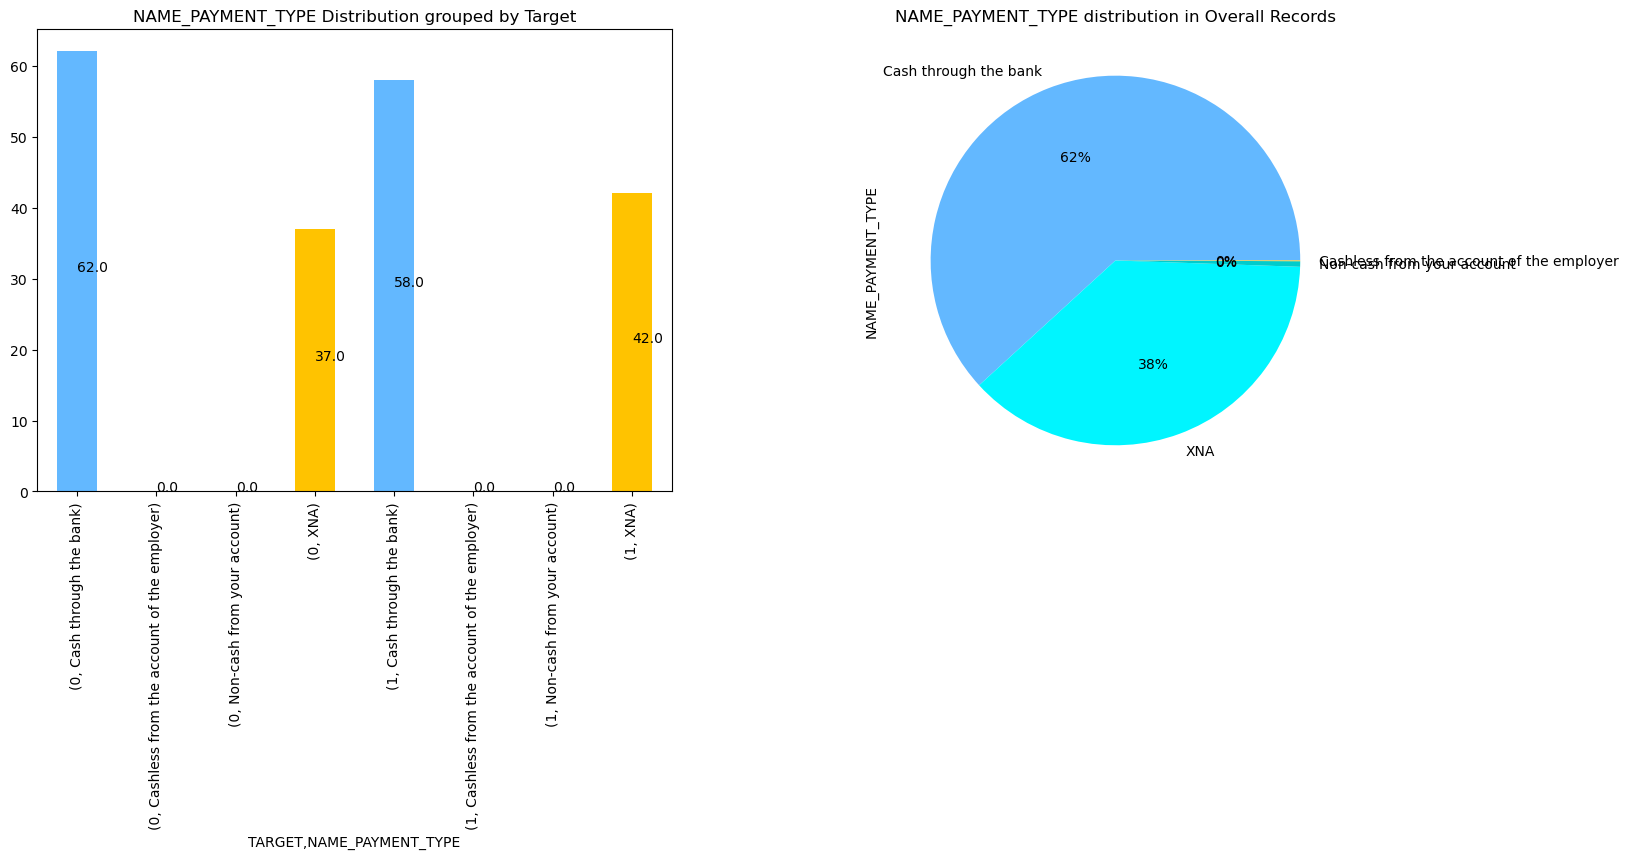

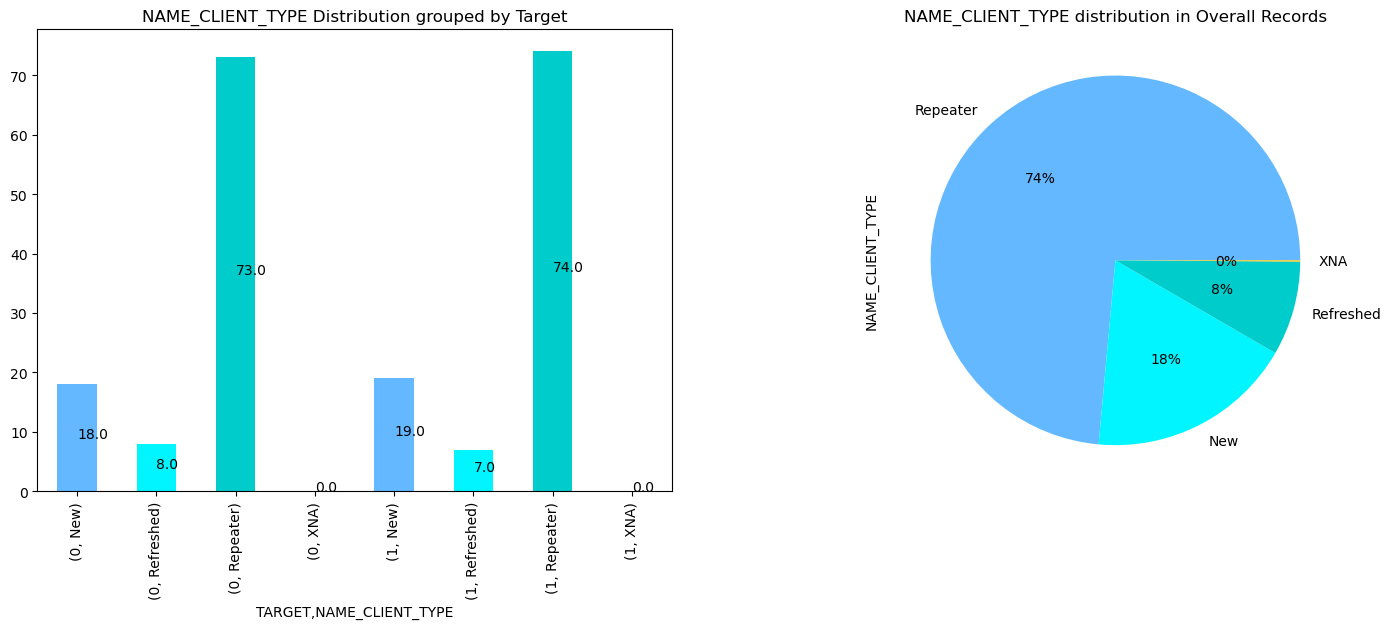

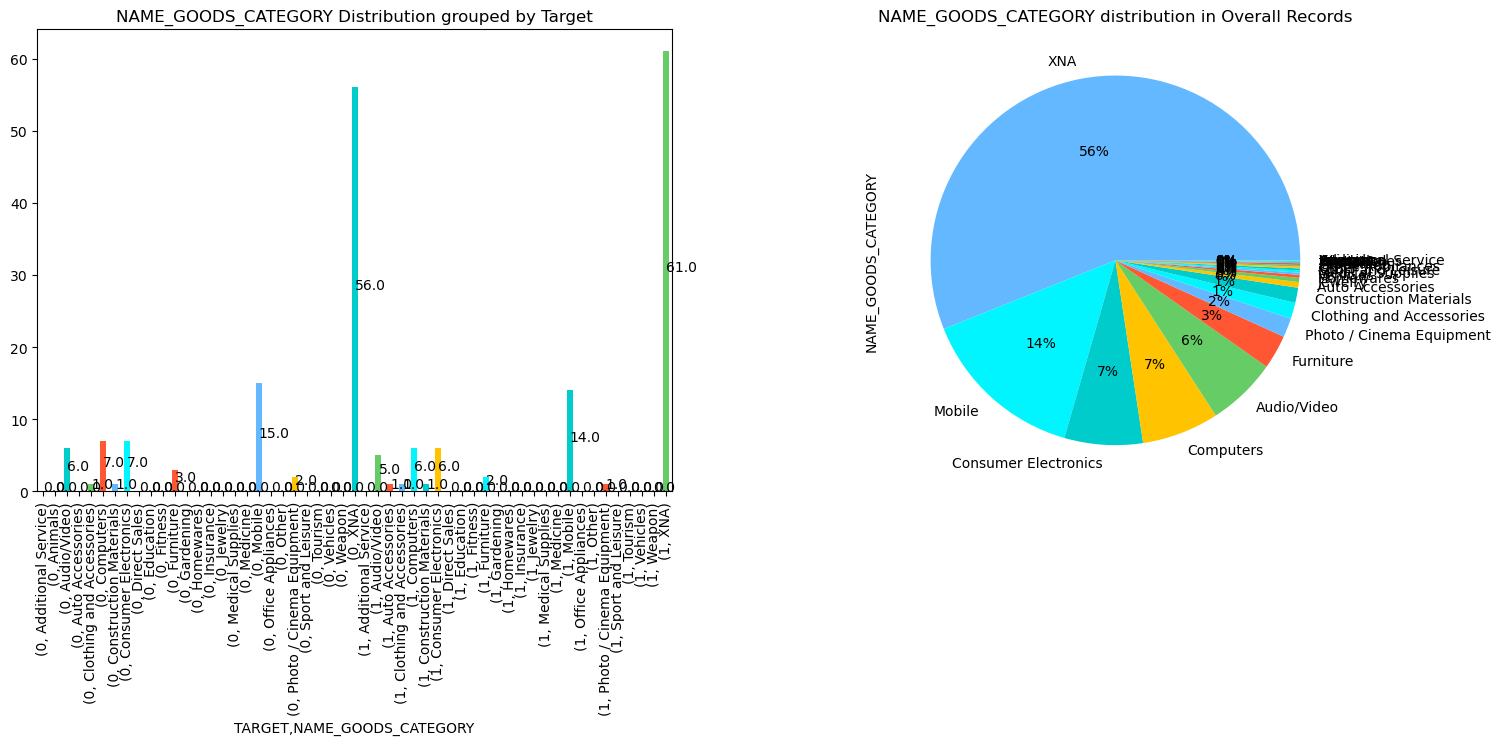

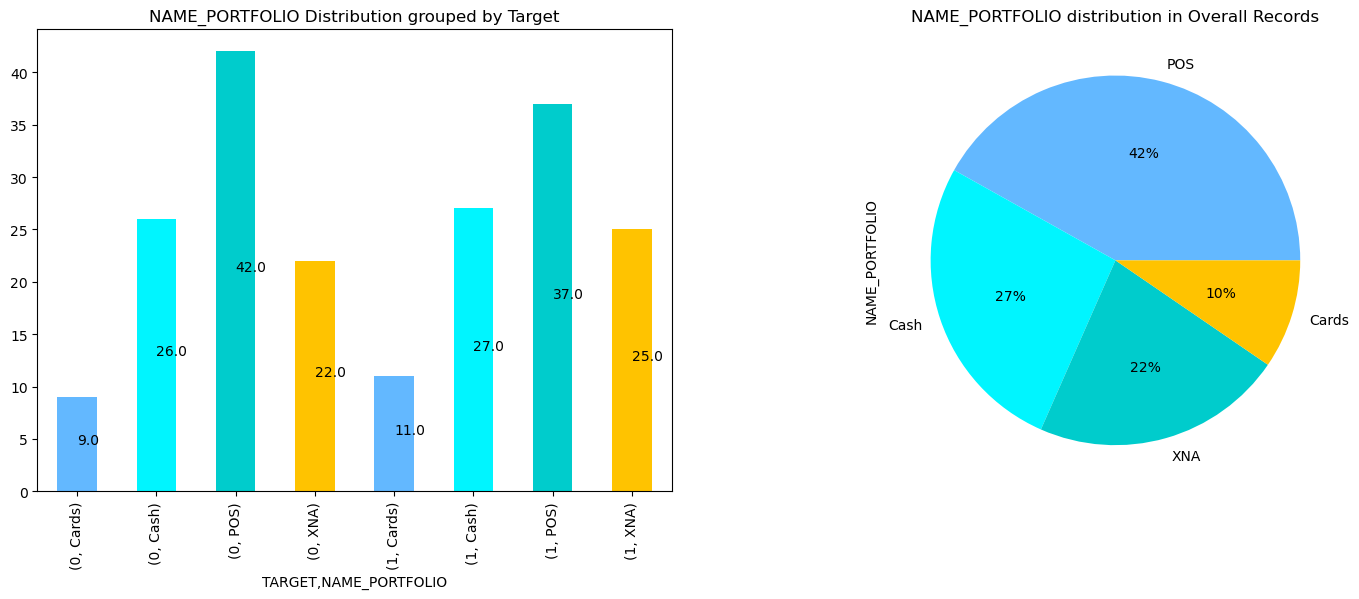

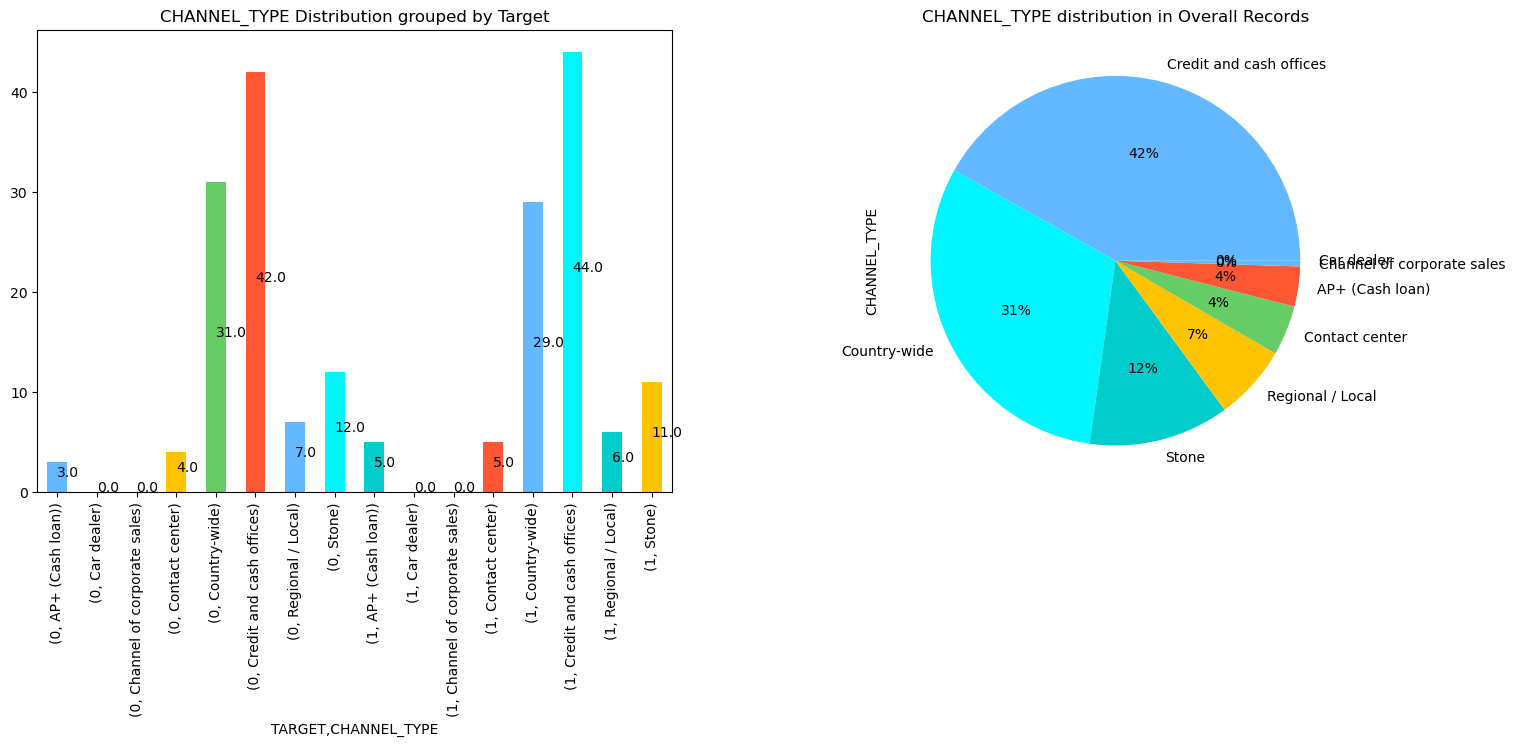

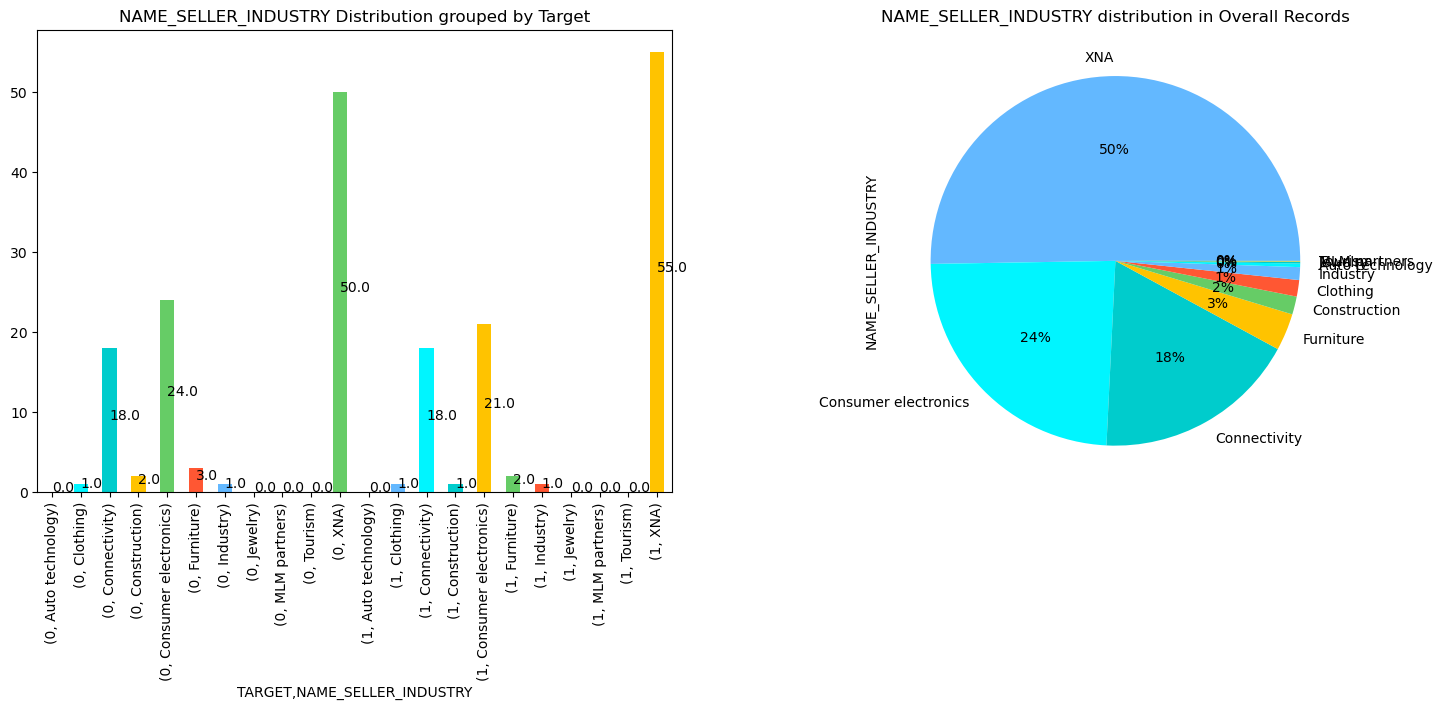

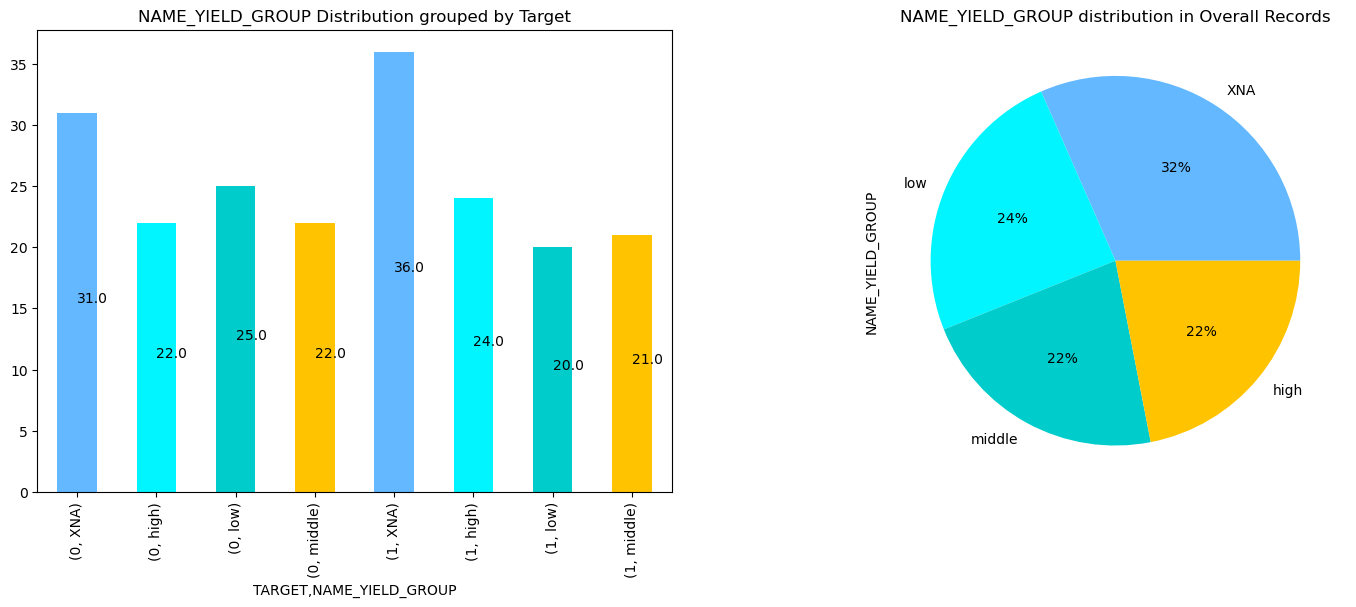

In [30]:
for col in prev_data_obj_cols:
    distributionGraphsPrev(col)

In [31]:
# We have verified the distribution during the data cleaning stage. We'll create a function now to visualize the distribution of numeric values

def numericDistributionGraphprev(col):
    print("\033[1m\033[1;3mDistribution Based on "+str(col)+"\033[0m")
    description = columns_data[(columns_data.Table == 'previous_application.csv') & (columns_data.Row == col)].Description.values
    if(len(description) >0):
        print('Description : ',description[0],'\n')
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(221)
    sns.distplot(previous_data[col], kde=True, vertical=False, rug=False, bins=15, color='#222831')
    plt.title('Distribution of '+col+' Across current application')
    
    plt.subplot(222)
    sns.boxplot(x='TARGET', y=col ,data=previous_data,)
    plt.title('Distribution of '+col+' with respect to TARGET feature')
    
    plt.subplot(223)
    sns.violinplot(previous_data[col],color='#F38181')
    plt.title('Distribution of '+col+' quantile Across current application')
    
    plt.subplot(224)
    sns.heatmap(previous_data[['TARGET',col]].corr(), cmap='Greens', annot=True)
    plt.title('Correlation heatmap of '+col+' wrt TARGET feature')
    plt.show()

In [32]:
prev_numeric_cols = list(prev_data_numeric_cols)
prev_numeric_cols.remove('TARGET')
prev_numeric_cols.remove('SK_ID_CURR')
prev_numeric_cols.remove('SK_ID_PREV')

Distribution Based on AMT_APPLICATION
Description :  For how much credit did client ask on the previous application 



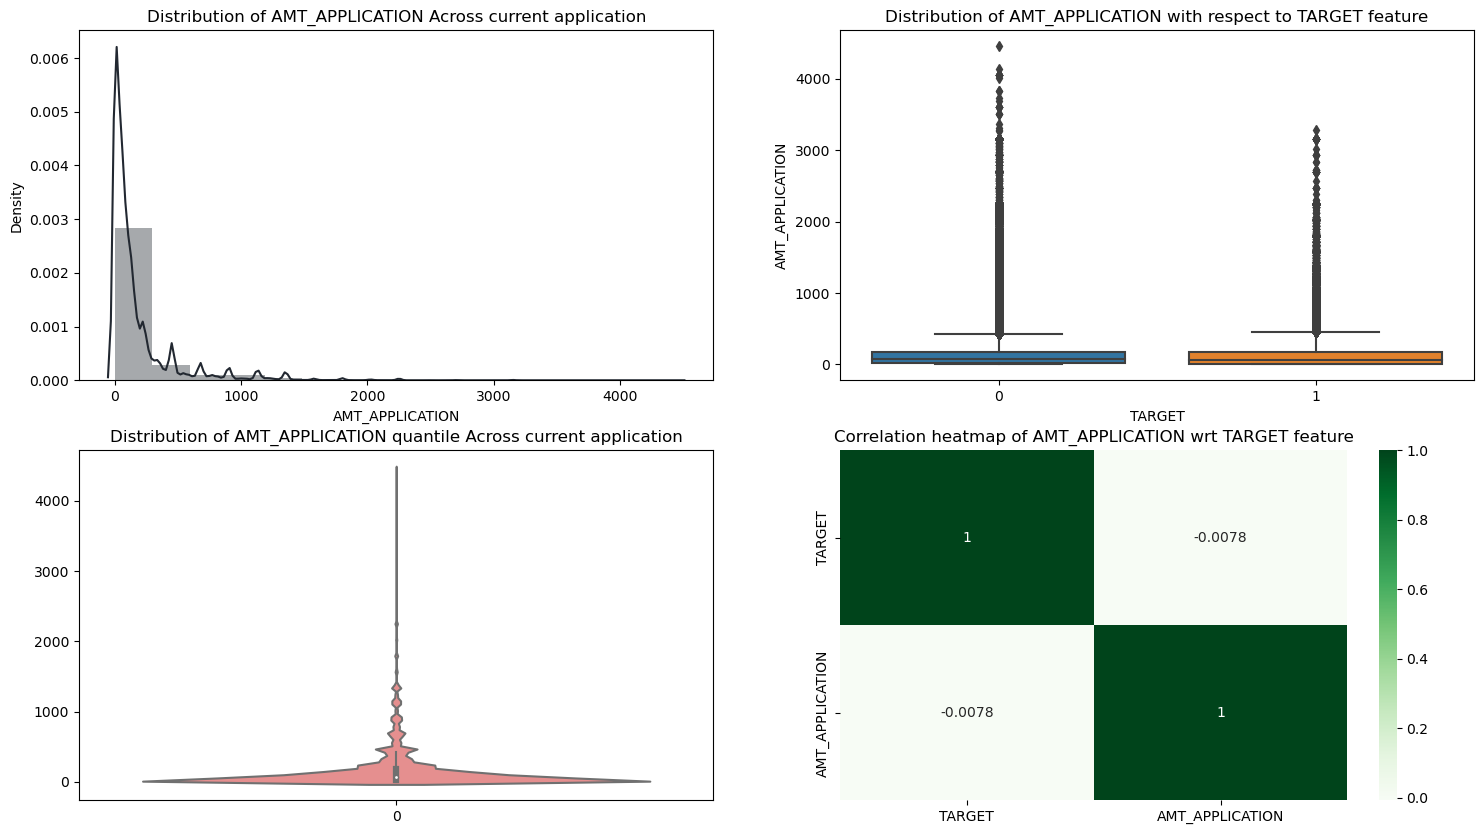

Distribution Based on AMT_CREDIT
Description :  Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT 



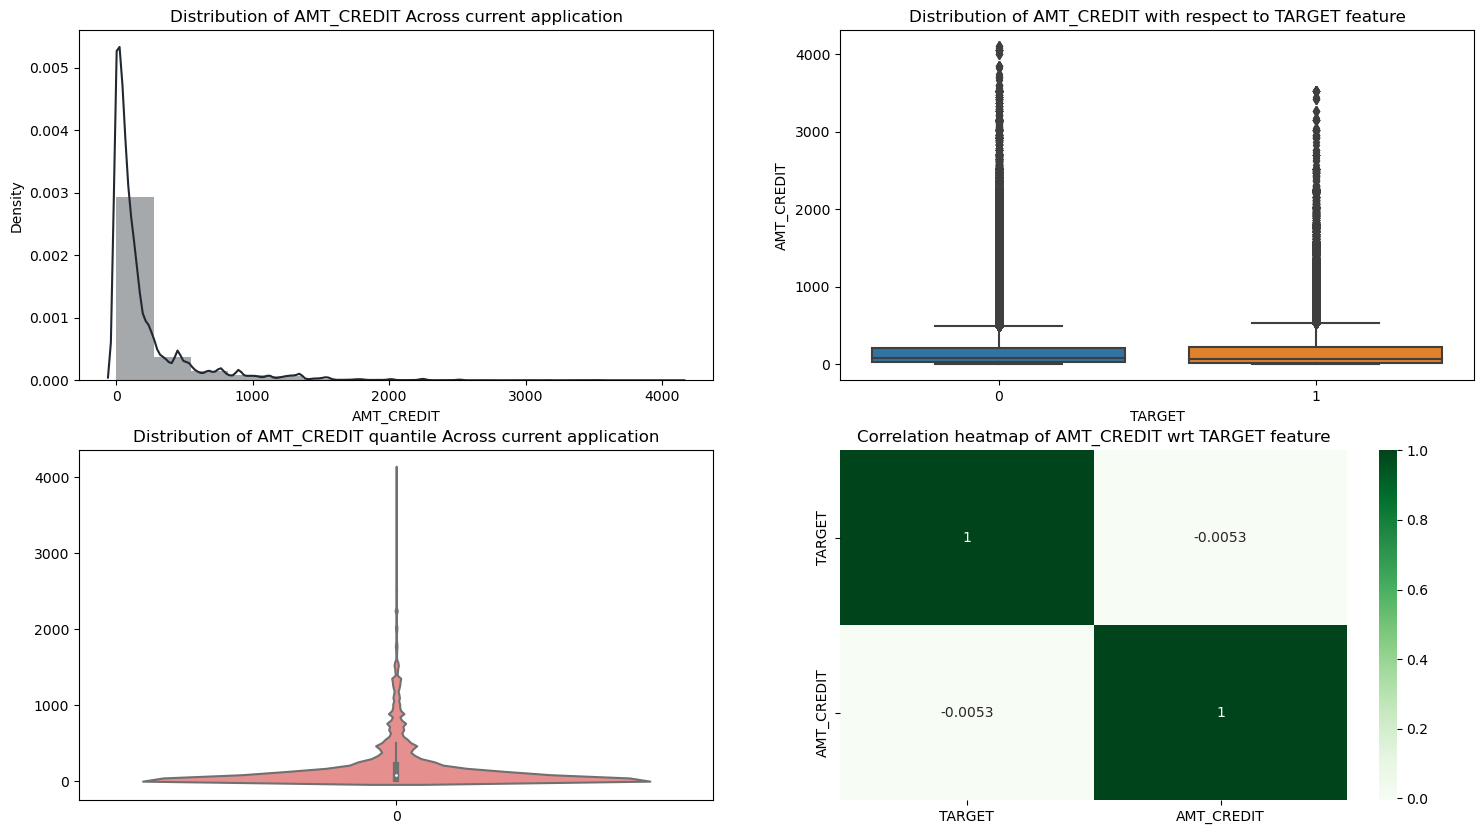

Distribution Based on HOUR_APPR_PROCESS_START
Description :  Approximately at what day hour did the client apply for the previous application 



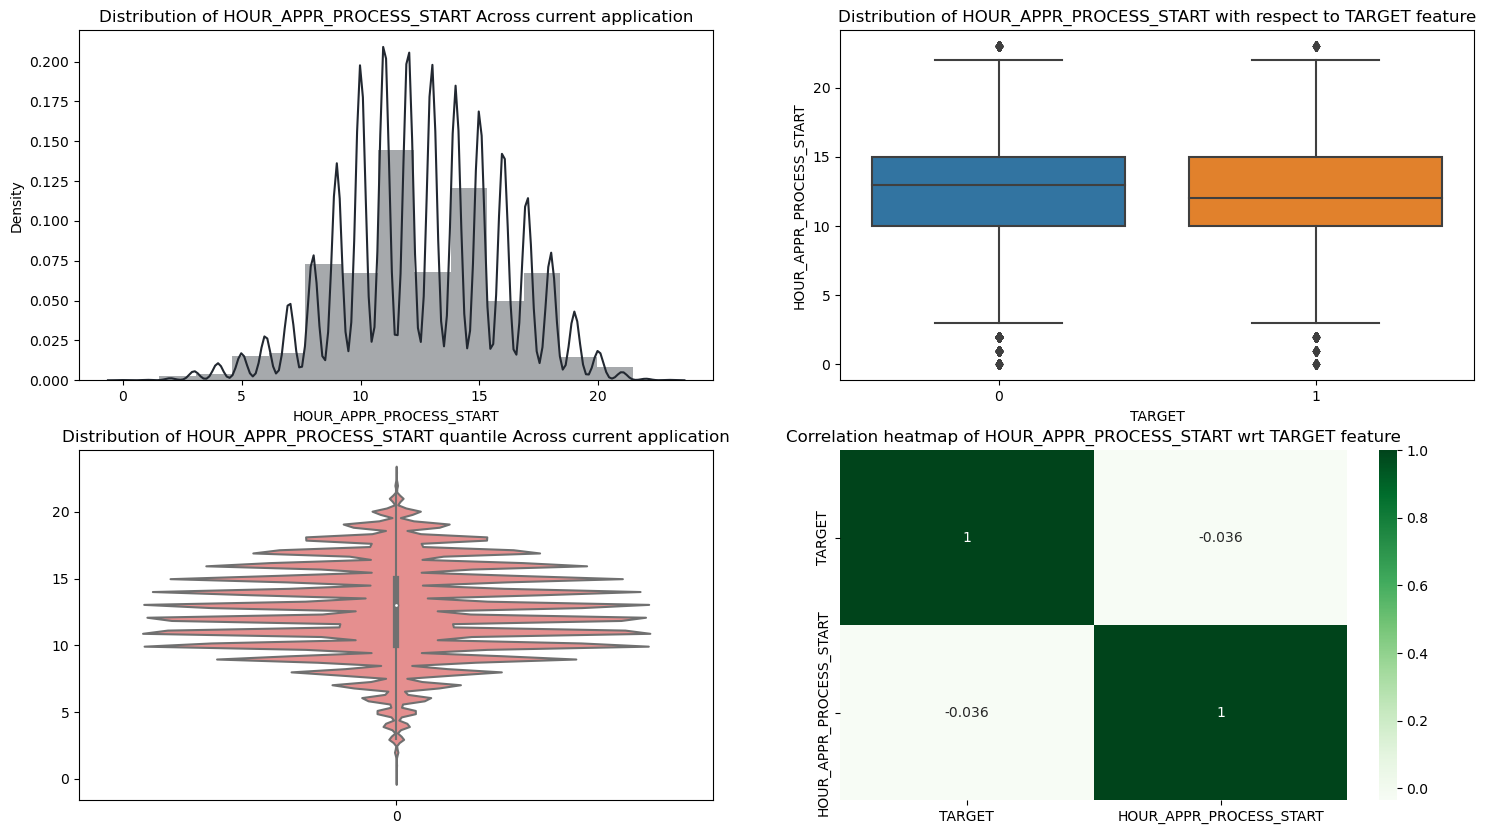

Distribution Based on NFLAG_LAST_APPL_IN_DAY
Description :  Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice 



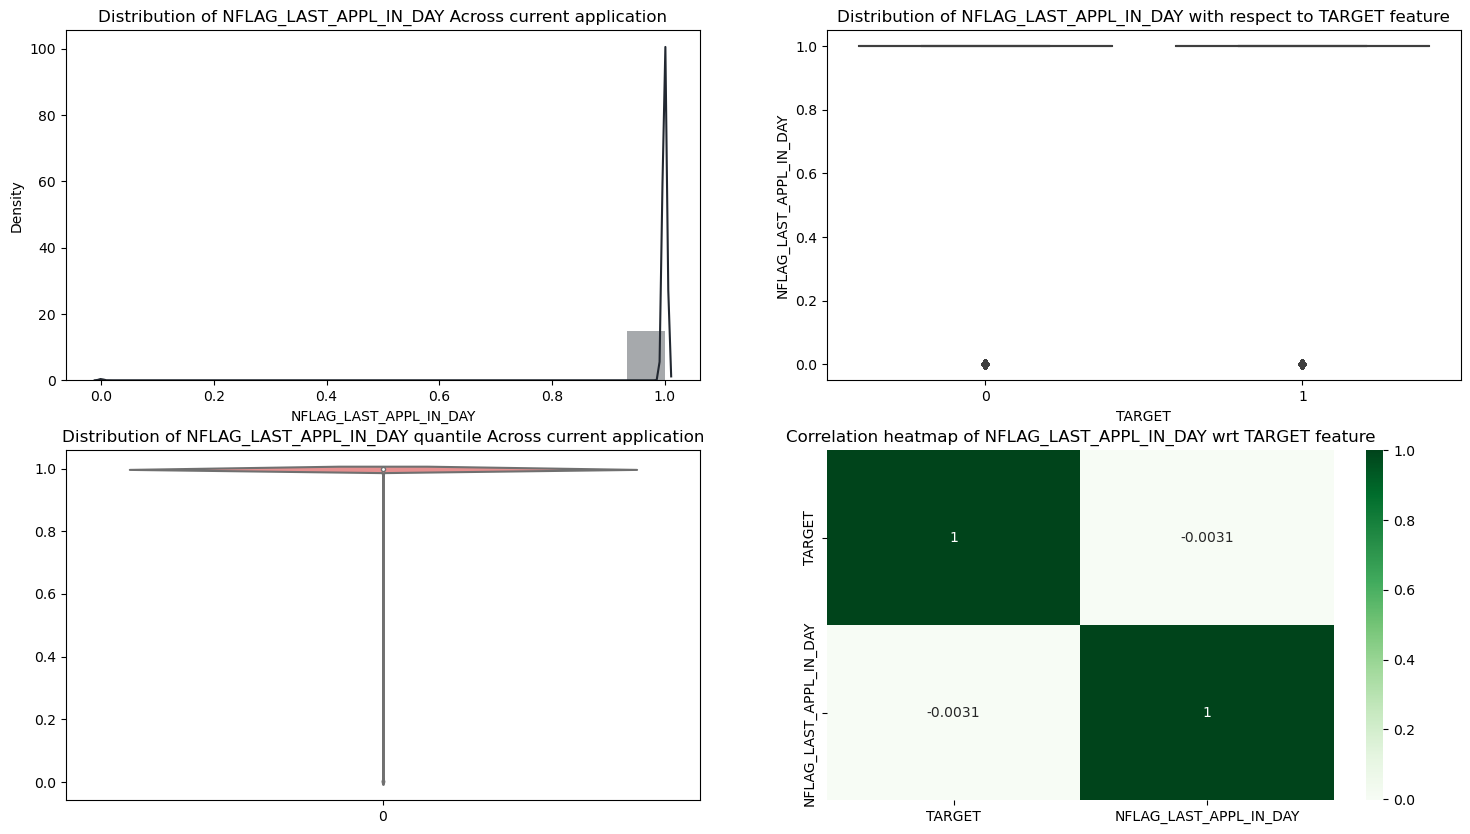

Distribution Based on DAYS_DECISION
Description :  Relative to current application when was the decision about previous application made 



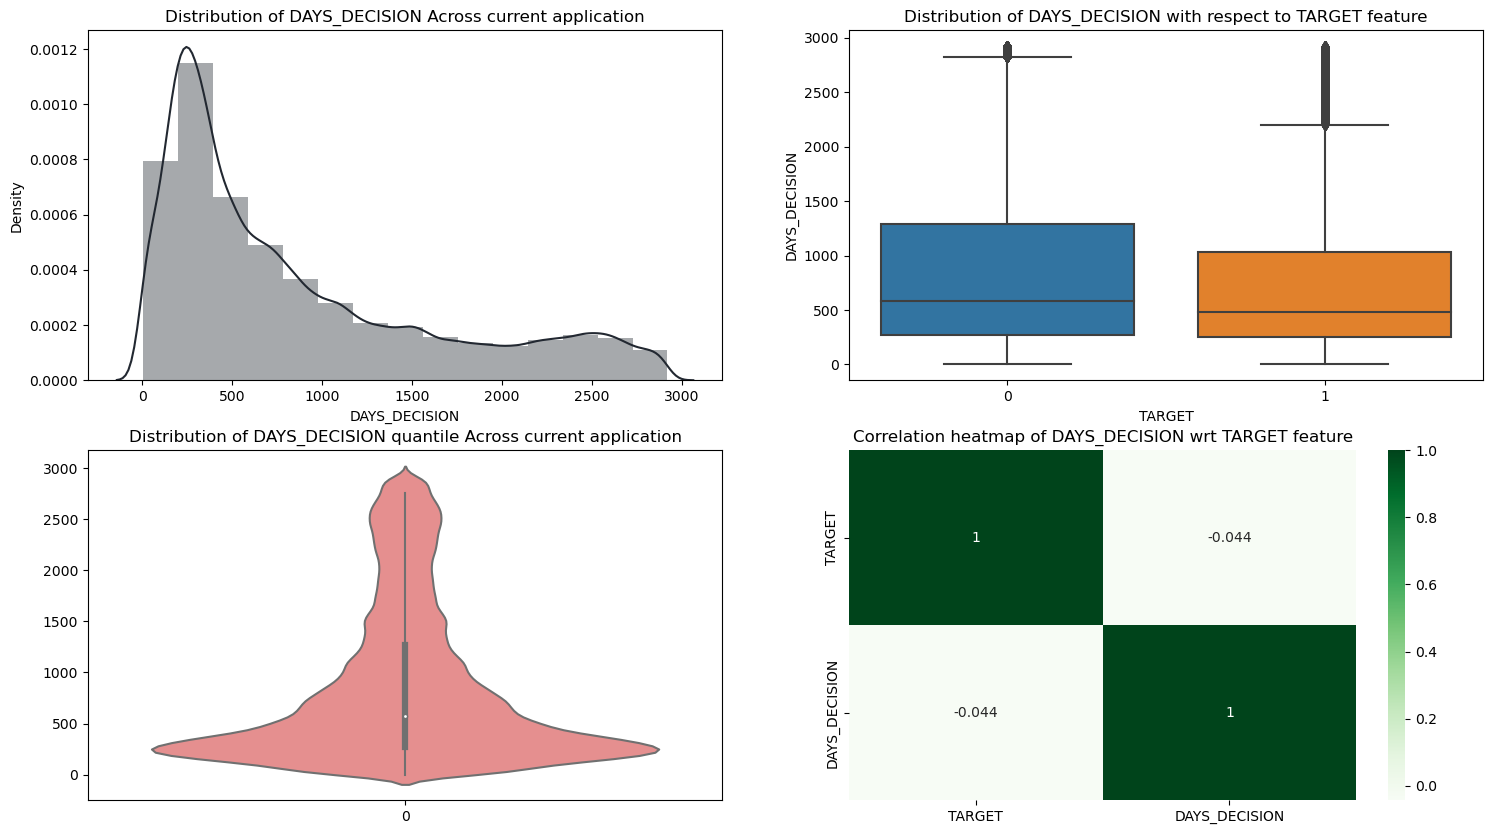

In [33]:
for col in prev_numeric_cols:
    numericDistributionGraphprev(col)

In [34]:
flag_corr= current_data[['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']].corr()

<Axes: >

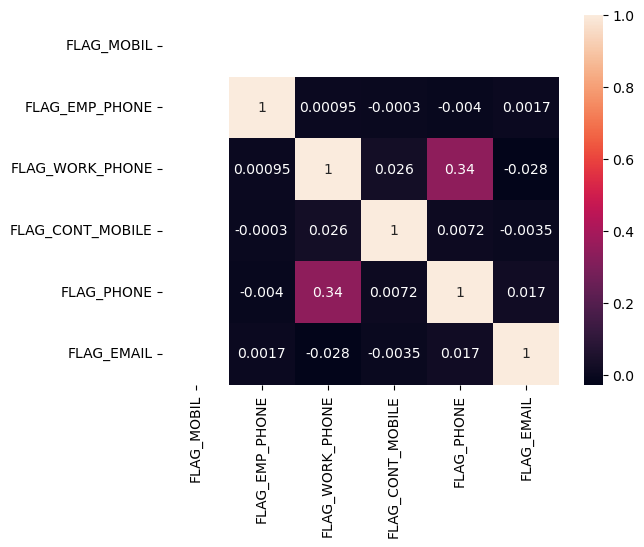

In [35]:
sns.heatmap(flag_corr, annot=True)

In [36]:
area_corr= current_data[['REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']].corr()

<Axes: >

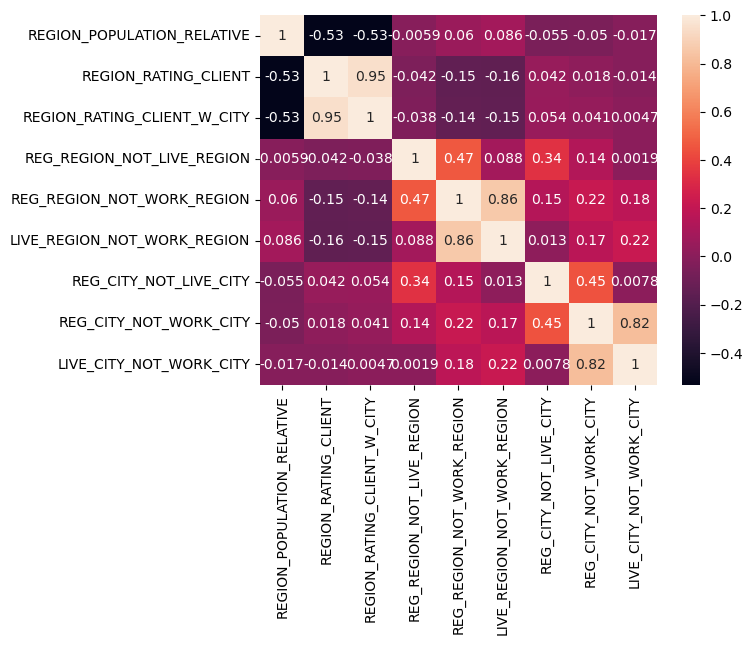

In [37]:
sns.heatmap(area_corr, annot = True)

<Axes: >

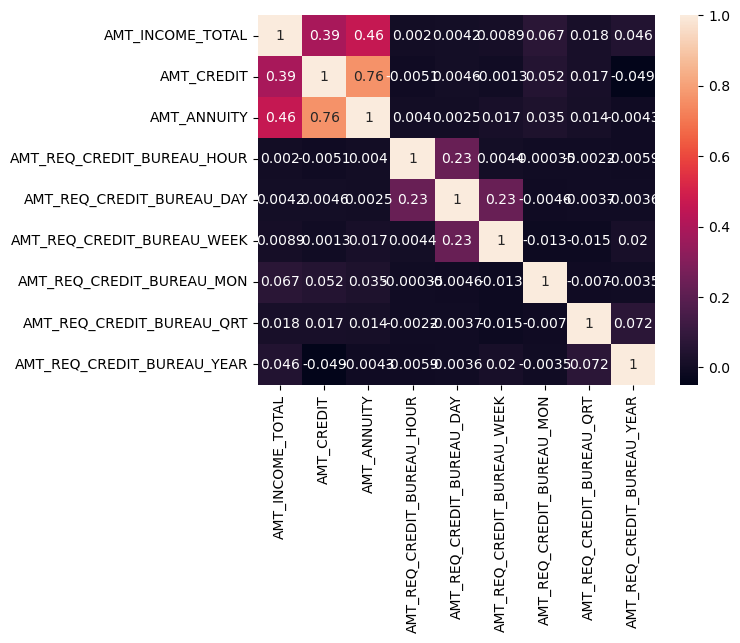

In [38]:
days_corr= current_data[['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
sns.heatmap(days_corr, annot = True)

<Axes: >

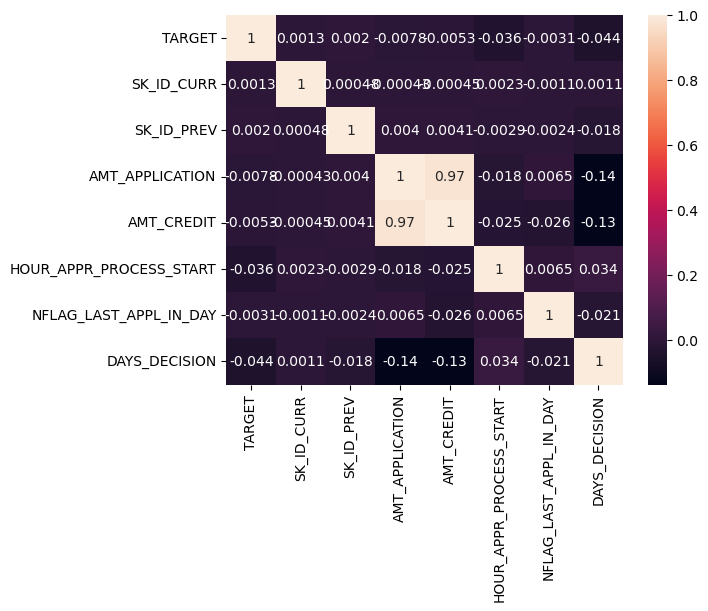

In [39]:
sns.heatmap(previous_data.corr(), annot = True)